<a href="https://colab.research.google.com/github/paulandrea0/tesis/blob/main/1Norma_CrossValidation_DAF_31marzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Importando Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import math

df_test_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_teste.csv')
df_train_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_train.csv')
df_test_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_teste.csv')
df_train_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_train.csv')
df_test_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_teste.csv')
df_train_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_train.csv')

Datos de Italia

In [ ]:
isla = pd.read_csv('/gdrive/MyDrive/Sismos/Island_LP_11mil/lp_island.csv')
etna =  pd.read_csv('/gdrive/MyDrive/Sismos/ETNA/Etna50mil/sismos_VT_etna.csv')
print(isla.shape, etna.shape)

(10999, 1600) (49999, 3000)


Concatenando df de entrenamiento y prueba

In [ ]:
df_VT = pd.concat([df_test_1, df_train_1], axis=0)
df_LP = pd.concat([df_test_2, df_train_2], axis=0)
df_TOR = pd.concat([df_test_3, df_train_3], axis=0)
print(df_VT.shape, df_LP.shape, df_TOR.shape)

(1736, 13348) (402, 3000) (67, 27408)


# **Procesando data**

Transformando todo a array Numpy y quitando los valores NaN de los array

In [ ]:
x_VT = df_VT.values
x_LP = df_LP.values
x_TOR = df_TOR.values

x_VT[np.isnan(x_VT)] = 0.0
x_LP[np.isnan(x_LP)] = 0.0
x_TOR[np.isnan(x_TOR)] = 0.0

Uniformizando duración de los sismos a 30 segundos

In [ ]:
x_VT = x_VT[:, 0:3000]
x_LP = x_LP[:, 0:3000]
x_TOR = x_TOR[:, 0:3000]
print(x_VT.shape, x_LP.shape, x_TOR.shape)

(1736, 3000) (402, 3000) (67, 3000)


Normalización

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
VT_s = min_max_scaler.fit_transform(x_VT)
print('Mínimo y máximo originales: {:.1f}, {:.1f}' .format(np.min(x_VT), np.max(x_VT)))
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}' .format(np.min(VT_s), np.max(VT_s)))

# Señales LP
LP_s = min_max_scaler.fit_transform(x_LP)
print('Mínimo y máximo originales: {:.1f}, {:.1f}' .format(np.min(x_LP), np.max(x_LP)))
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}' .format(np.min(LP_s), np.max(LP_s)))

# Señales Tor
TOR_s = min_max_scaler.fit_transform(x_TOR)
print('Mínimo y máximo originales: {:.1f}, {:.1f}' .format(np.min(x_TOR), np.max(x_TOR)))
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}' .format(np.min(TOR_s), np.max(TOR_s)))

Mínimo y máximo originales: -3875391.0, 3888217.0
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -160921.0, 141698.0
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -149434.0, 17077.0
Mínimo y máximo normalizado: 0.0, 1.0


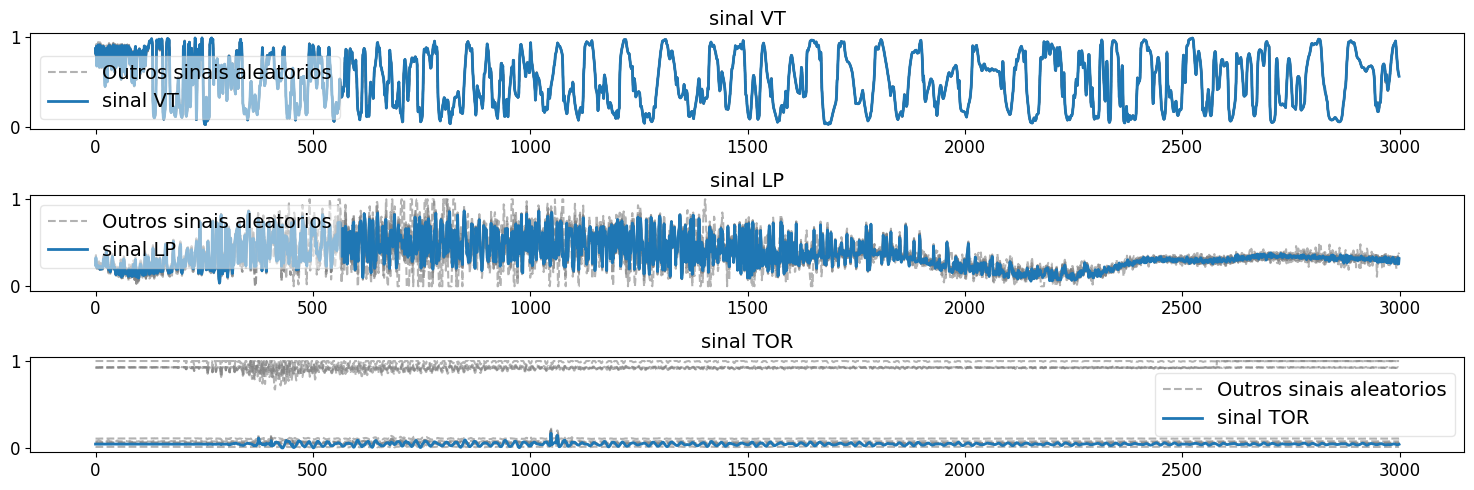

In [ ]:
# Graficando
# Definiendo las clases:
signals_class = [VT_s, LP_s, TOR_s]
# Crear una figura de 3x4 subplots
max_signals_per_class = 10
class_names = ['sinal VT', 'sinal LP', 'sinal TOR']

fig, axs = plt.subplots(3, 1, figsize=(15, 5))

# Iterar sobre las clases y los subplots
for class_idx, signal_class in enumerate(signals_class):
  ax = axs[class_idx]   # Obtener el subplot actual

  # Limitar el número de señales a dibujar por clase
  signal_class = signal_class[:max_signals_per_class]

  # Iterar sobre las señales de la clase y ajustar las propiedades de línea
  for i , signal in enumerate(signal_class):
    # Las señales aleatorias
    ax.plot(signal, linestyle='--', alpha=0.6, label=None, color="grey")

  # primera señal con línea sólida y grosor 2
  ax.plot(signal, linestyle='--', alpha=0.6, label="Outros sinais aleatorios", color="grey")
  ax.plot(signal_class[0], lw=2, label=(class_names[class_idx]), color="tab:blue")

  # Añadir leyenda y etiquetas
  ax.legend(fontsize='14', fancybox=True, framealpha=0.5)
  ax.tick_params(axis='both', labelsize=12)
  ax.set_title(class_names[class_idx], fontsize=14)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Guardar el gráfico en formato PDF con resolución de 300 DPI
plt.savefig("grafico.pdf", dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

Filtrando señales

In [ ]:
from scipy.signal import butter, filtfilt

# Frecuencia de corte
fc = 2
fs = 100
t = np.linspace(0, 3, 3000)
# Orden del filtro
order = 5

# Coeficientes del filtro Butterworth
b, a = butter(order, fc / (fs/2), btype='highpass')

# Filtrando la señal VT
VT_filt = filtfilt(b, a, VT_s)
VT_freq = np.fft.fft(VT_filt)

# Filtrando la señal LP
LP_filt = filtfilt(b, a, LP_s)
LP_freq = np.fft.fft(LP_filt)

# Filtrando la señal TOR
TOR_filt = filtfilt(b, a, TOR_s)
TOR_freq = np.fft.fft(TOR_filt)

Graficando las señales filtradas

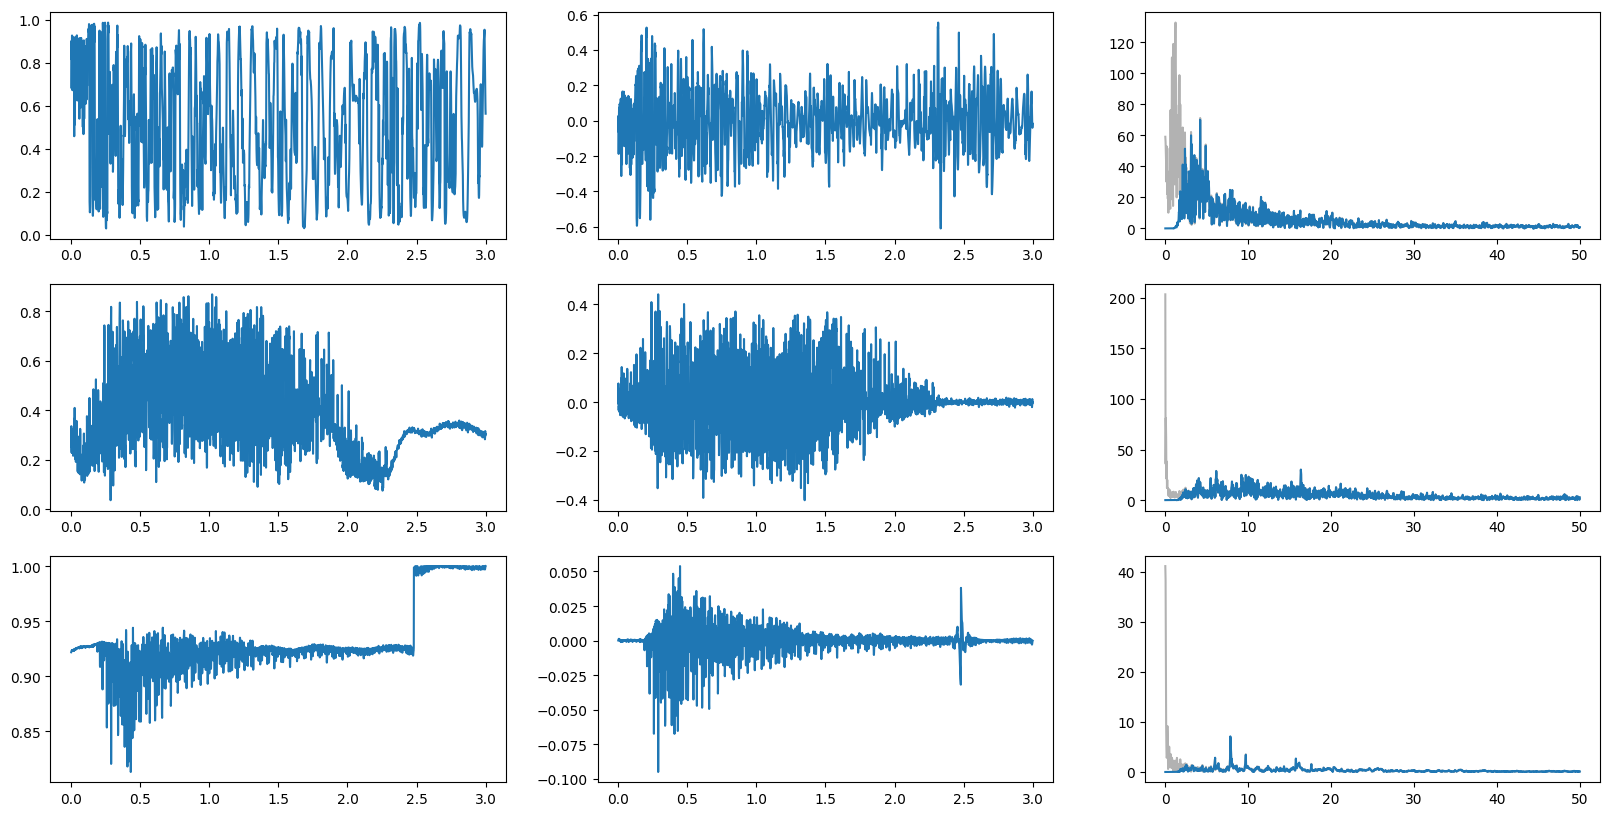

In [ ]:
import matplotlib.pyplot as plt

freq = np.fft.fftfreq((3000), 1/fs)
pos_mask = np.where(freq > 0)
freq_pos = freq[pos_mask]
sinal_aleatoria = np.random.randint(TOR_filt.shape[0])


# Define las clases y señales
classes = ["VT", "LP", "TOR"]
signals = [VT_s, LP_s, TOR_s]
filtered_signals = [VT_filt, LP_filt, TOR_filt]
spectra = [VT_freq, LP_freq, TOR_freq]

# Configura la figura
plt.figure(figsize=(20, 10))

for i, signal_class in enumerate(classes):
    plt.subplot(3, 3, i * 3 + 1)
    plt.plot(t, signals[i][sinal_aleatoria])

    plt.subplot(3, 3, i * 3 + 2)
    plt.plot(t, filtered_signals[i][sinal_aleatoria])

    plt.subplot(3, 3, i * 3 + 3)
    Y = np.fft.fft(signals[i][sinal_aleatoria])
    Y = Y[pos_mask]
    plt.plot(freq_pos, np.abs(Y), "k", alpha=0.3)
    X = spectra[i][sinal_aleatoria][pos_mask]
    plt.plot(freq_pos, np.abs(X))

plt.show()

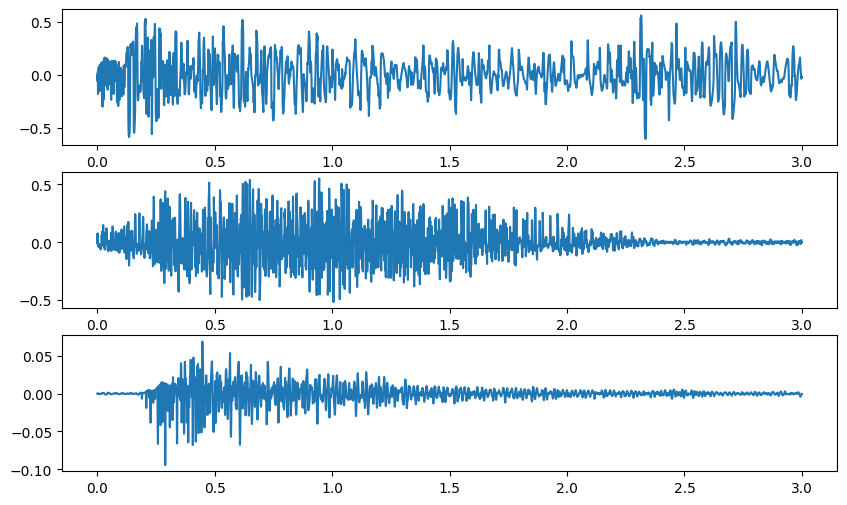

In [ ]:
# Graficando
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(t, VT_filt[60])
plt.subplot(312)
plt.plot(t, LP_filt[18])
plt.subplot(313)
plt.plot(t, TOR_filt[38])

Función para retirar *offset*

In [ ]:
def mean_norma(signal):
    mean = np.mean(signal)
    return signal - mean

Retirando offset

In [ ]:
VT = mean_norma(VT_filt)  # Señales VT
LP = mean_norma(LP_filt)  # Señales LP
TOR = mean_norma(TOR_filt)  # Señales Tor

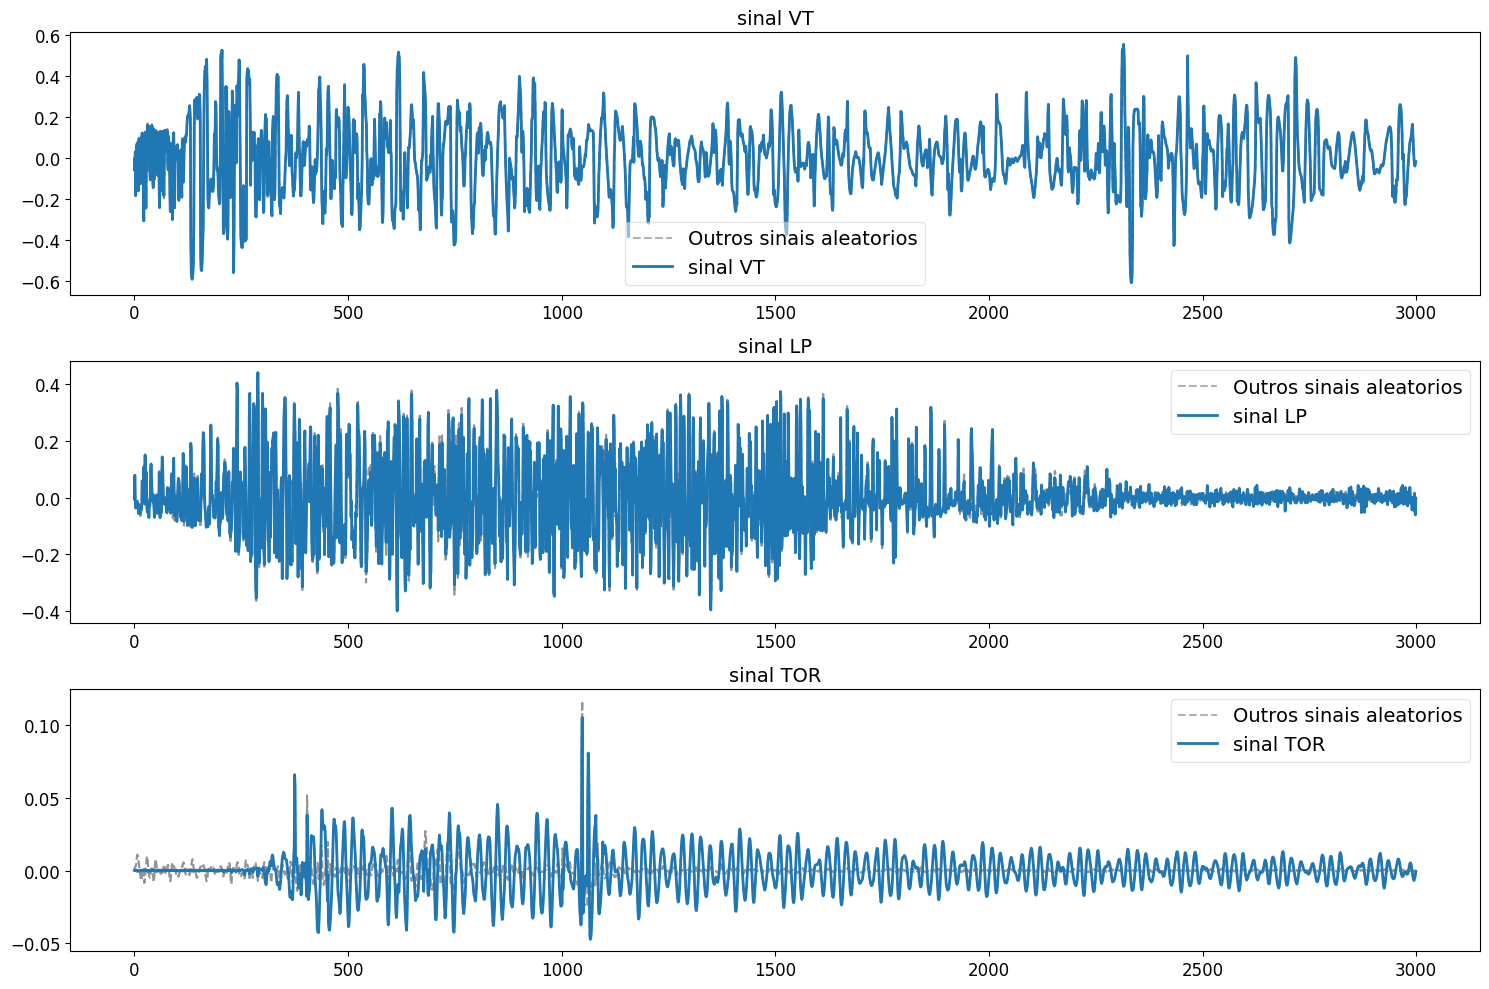

In [ ]:
# Graficando
# Definiendo las clases:
signals_class = [VT_filt, LP_filt, TOR_filt]
# Crear una figura de 3x4 subplots
max_signals_per_class = 2
class_names = ['sinal VT', 'sinal LP', 'sinal TOR']

fig, axs = plt.subplots(3, 1, figsize=(15, 10))

# Iterar sobre las clases y los subplots
for class_idx, signal_class in enumerate(signals_class):
  ax = axs[class_idx]   # Obtener el subplot actual

  # Limitar el número de señales a dibujar por clase
  signal_class = signal_class[:max_signals_per_class]

  # Iterar sobre las señales de la clase y ajustar las propiedades de línea
  for i , signal in enumerate(signal_class):
    # Las señales aleatorias
    ax.plot(signal, linestyle='--', alpha=0.6, label=None, color="grey")

  # primera señal con línea sólida y grosor 2
  ax.plot(signal, linestyle='--', alpha=0.6, label="Outros sinais aleatorios", color="grey")
  ax.plot(signal_class[0], lw=2, label=(class_names[class_idx]), color="tab:blue")

  # Añadir leyenda y etiquetas
  ax.legend(fontsize='14', fancybox=True, framealpha=0.5)
  ax.tick_params(axis='both', labelsize=12)
  ax.set_title(class_names[class_idx], fontsize=14)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Guardar el gráfico en formato PDF con resolución de 300 DPI
plt.savefig("grafico.pdf", dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

1. Subdividimos cada clase en conjuntos de *train*, *test* y *val* para que las muestras por clase queden estratificadas. La división será: 60%, 20%, 20% respectivamente.
2. Adicionamos una columna de etiqueta para identificar cada clase.
3. Concatenamos los subconjuntos *train*, *test* y *val* y aplicamos *shuffle* en cada uno,
4. Separamos los vectores etiqueta para cada subconjunto.

In [ ]:
############################################### CLASE VT
total_filas = VT_s.shape[0]
filas_entrenamiento = int(0.6 * total_filas)
filas_prueba = int(0.2 * total_filas)
train_1 = VT_s[:filas_entrenamiento]
test_1 = VT_s[filas_entrenamiento:filas_entrenamiento + filas_prueba]
val_1 = VT_s[filas_entrenamiento + filas_prueba:]
# Crear el vector de etiquetas
y_train_1 = np.zeros(train_1.shape[0])
y_test_1 = np.zeros(test_1.shape[0])
y_val_1 = np.zeros(val_1.shape[0])
# Adicionando el vector de etiquetas a la primera columna de los subconjuntos
y_train_1 = np.expand_dims(y_train_1, axis=1)
y_test_1 = np.expand_dims(y_test_1, axis=1)
y_val_1 = np.expand_dims(y_val_1, axis=1)
train_1 = np.concatenate((y_train_1, train_1), axis=1)
test_1 = np.concatenate((y_test_1, test_1), axis=1)
val_1 = np.concatenate((y_val_1, val_1), axis=1)

################################################# CLASE lP
total_filas = LP_s.shape[0]
filas_entrenamiento = int(0.6 * total_filas)
filas_prueba = int(0.2 * total_filas)
train_2 = LP_s[:filas_entrenamiento]
test_2 = LP_s[filas_entrenamiento:filas_entrenamiento + filas_prueba]
val_2 = LP_s[filas_entrenamiento + filas_prueba:]
# Crear el vector de etiquetas
y_train_2 = np.ones(train_2.shape[0])
y_test_2 = np.ones(test_2.shape[0])
y_val_2 = np.ones(val_2.shape[0])
# Adicionando el vector de etiquetas a la primera columna de los subconjuntos
y_train_2 = np.expand_dims(y_train_2, axis=1)
y_test_2 = np.expand_dims(y_test_2, axis=1)
y_val_2 = np.expand_dims(y_val_2, axis=1)
train_2 = np.concatenate((y_train_2, train_2), axis=1)
test_2 = np.concatenate((y_test_2, test_2), axis=1)
val_2 = np.concatenate((y_val_2, val_2), axis=1)

################################################ CLASE TOR
total_filas = TOR_s.shape[0]
filas_entrenamiento = int(0.6 * total_filas)
filas_prueba = int(0.2 * total_filas)
train_3 = TOR_s[:filas_entrenamiento]
test_3 = TOR_s[filas_entrenamiento:filas_entrenamiento + filas_prueba]
val_3 = TOR_s[filas_entrenamiento + filas_prueba:]
# Crear el vector de etiquetas
y_train_3 = 2 * np.ones(train_3.shape[0])
y_test_3 = 2 * np.ones(test_3.shape[0])
y_val_3 = 2 * np.ones(val_3.shape[0])
# Adicionando el vector de etiquetas a la primera columna de los subconjuntos
y_train_3 = np.expand_dims(y_train_3, axis=1)
y_test_3 = np.expand_dims(y_test_3, axis=1)
y_val_3 = np.expand_dims(y_val_3, axis=1)
train_3 = np.concatenate((y_train_3, train_3), axis=1)
test_3 = np.concatenate((y_test_3, test_3), axis=1)
val_3 = np.concatenate((y_val_3, val_3), axis=1)

# CONCATENENDO LOS SUBCONJUNTO train, test & val
X_train = np.concatenate((train_1, train_2, train_3), axis=0)
X_test = np.concatenate((test_1, test_2, test_3), axis=0)
X_val = np.concatenate((val_1, val_2, val_3), axis=0)
print(X_train.shape, X_test.shape, X_val.shape)

#  APLICANDO SHUFFLE EN LOS 3 SUBCONJUNTOS
np.random.shuffle(X_train)
np.random.shuffle(X_test)
np.random.shuffle(X_val)
train_counts = np.unique(X_train[:,0], return_counts=True)
test_counts = np.unique(X_test[:,0], return_counts=True)
val_counts = np.unique(X_val[:,0], return_counts=True)
print("Distribución de las clases en X_train:", train_counts)
print("Distribución de las clases en X_test:", test_counts)
print("Distribución de las clases en X_val:", val_counts)

# SEPARANDO VECTOR ETIQUETAS EN CADA SUBCONJUNTO
y_train = X_train[:, 0]
y_test =X_test[:, 0]
y_val = X_val[:, 0]
print(y_train.shape, y_test.shape, y_val.shape)

X_train = X_train[:, 1:]
X_test = X_test[:, 1:]
X_val = X_val[:, 1:]
print(X_train.shape, X_test.shape, X_val.shape)


train_y = np.unique(y_train[:], return_counts=True)
test_y = np.unique(y_test[:], return_counts=True)
val_y = np.unique(y_val[:], return_counts=True)
print("Distribución en las etiquetas es:", train_y)
print("Distribución en las etiquetas es:", test_y)
print("Distribución en las etiquetas es:", val_y)

(1322, 3001) (440, 3001) (443, 3001)
Distribución de las clases en X_train: (array([0., 1., 2.]), array([1041,  241,   40]))
Distribución de las clases en X_test: (array([0., 1., 2.]), array([347,  80,  13]))
Distribución de las clases en X_val: (array([0., 1., 2.]), array([348,  81,  14]))
(1322,) (440,) (443,)
(1322, 3000) (440, 3000) (443, 3000)
Distribución en las etiquetas es: (array([0., 1., 2.]), array([1041,  241,   40]))
Distribución en las etiquetas es: (array([0., 1., 2.]), array([347,  80,  13]))
Distribución en las etiquetas es: (array([0., 1., 2.]), array([348,  81,  14]))


Ìndices aleatorios que me ayudaran a graficar las señales durante el proceso de representación compacta por el *Autoencoder*.

In [ ]:
num_classes = 3
num_indices_por_clase = 5
# Crea un diccionario para almacenar los índices aleatorios en TRAIN
rand_train = {}
# Genera índices aleatorios para cada clase
for clase in range(num_classes):
    indices_clase = np.where(y_train == clase)[0]  # Encuentra los índices de elementos en la clase actual
    rand_train[clase] = np.random.choice(indices_clase, num_indices_por_clase, replace=False)
print(rand_train)

# Crea un diccionario para almacenar los índices aleatorios en TEST
rand_test = {}
# Genera índices aleatorios para cada clase
for clase in range(num_classes):
    indices_clase = np.where(y_test == clase)[0]  # Encuentra los índices de elementos en la clase actual
    rand_test[clase] = np.random.choice(indices_clase, num_indices_por_clase, replace=False)
print(rand_test)

# Crea un diccionario para almacenar los índices aleatorios en VAL
rand_val = {}
# Genera índices aleatorios para cada clase
for clase in range(num_classes):
    indices_clase = np.where(y_val == clase)[0]  # Encuentra los índices de elementos en la clase actual
    rand_val[clase] = np.random.choice(indices_clase, num_indices_por_clase, replace=False)
print(rand_val)

{0: array([ 563,  675,  453, 1143,  421]), 1: array([777, 340, 466, 461, 888]), 2: array([ 361,  636,   37, 1134,  309])}
{0: array([ 59, 179, 360, 276, 286]), 1: array([191,  42, 115,  94, 274]), 2: array([ 33, 138, 102, 394,  21])}
{0: array([408,  62, 218, 319, 237]), 1: array([336, 420,  28, 198,   2]), 2: array([189, 166, 119, 177, 397])}


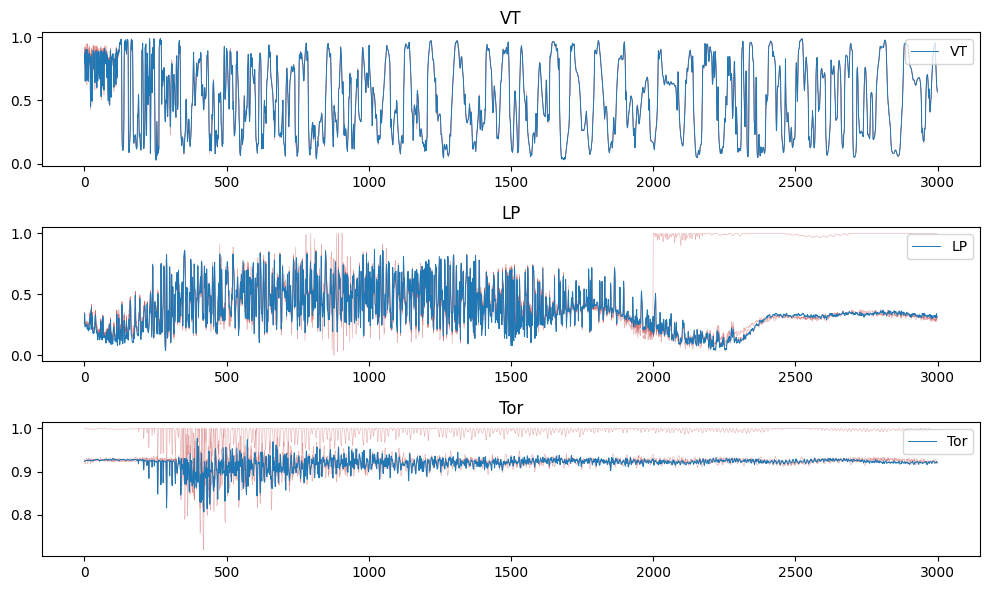

In [ ]:
# Crear una figura con subplots
fig, axs = plt.subplots(len(rand_val), 1, figsize=(10, 6))
signal_name = ['VT', 'LP', 'Tor']
# Iterar sobre las clases y sus índices
for i, (class_name, indices) in enumerate(rand_val.items()):
    ax = axs[i]
    signals = X_val[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual
    for j, signal in enumerate(signals):
        if j == len(signals) - 1:
            # Última señal
            ax.plot(signal, label=(signal_name[i]), color='tab:blue', lw=0.7, alpha=1)
        else:
            # Señales anteriores
            ax.plot(signal, label=None, color='indianred', linestyle='-', lw=0.4, alpha=0.5)

    ax.set_title(signal_name[i])
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

# **D A F**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print('Versión de TensorFlow: ' + tf.__version__)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.regularizers import l2  # Regularización
from tensorflow.keras.layers import Dropout  # Capa de dropout
from tensorflow.keras.callbacks import EarlyStopping  # Callback para detener el entrenamiento temprano

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Versión de TensorFlow: 2.13.0


**Autoencoder I *sigmoide***

In [ ]:
np.random.seed(23)

dim_entrada = X_train.shape[1]
entrada_sig = Input(shape=(dim_entrada,))
print(X_train.shape[1])

# Encoder
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.0001))(entrada_sig)
x = Dropout(0.25)(x)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.25)(x)
encoded_sig = Dense(800, activation='relu', name='bottleneck_layer')(x)

# Decoder
x = Dense(1000, activation='relu')(encoded_sig)
x = Dropout(0.25)(x)
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.25)(x)
decoded_sig = Dense(3000, activation='sigmoid')(x)

# autoencoder = entrada + decoder (que contiene el encoder)
autoencoder1_sig = Model(inputs=entrada_sig, outputs=decoded_sig)

autoencoder1_sig.summary()

3000
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense (Dense)               (None, 2000)              6002000   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 bottleneck_layer (Dense)    (None, 800)               800800    
                                                                 
 dense_2 (Dense)             (None, 1000)              8

**Autoencoder I *tanh***

In [ ]:
np.random.seed(23)

dim_entrada = X_train.shape[1]
entrada_tan = Input(shape=(dim_entrada,))
print(X_train.shape[1])

# Encoder
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.0001))(entrada_tan)
x = Dropout(0.25)(x)
x = Dense(1000, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.15)(x)
encoded_tan = Dense(800, activation='relu', name='bottleneck_layer')(x)

# Decoder
x = Dense(1000, activation='relu', kernel_regularizer=l2(0.0001))(encoded_tan)
x = Dropout(0.15)(x)
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.25)(x)
decoded_tan = Dense(3000, activation='tanh')(x)

# autoencoder = entrada + decoder (que contiene el encoder)
autoencoder1_tan = Model(inputs=entrada_tan, outputs=decoded_tan)

autoencoder1_tan.summary()

3000
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense_5 (Dense)             (None, 2000)              6002000   
                                                                 
 dropout_4 (Dropout)         (None, 2000)              0         
                                                                 
 dense_6 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 bottleneck_layer (Dense)    (None, 800)               800800    
                                                                 
 dense_7 (Dense)             (None, 1000)             

Aplicando Autoencoders I

In [ ]:
autoencoder1_tan = Model(inputs=entrada_tan, outputs=decoded_tan)
autoencoder1_tan.compile(optimizer='adam', loss='MeanSquaredError', metrics=['accuracy'])
historia = autoencoder1_tan.fit(X_train, X_train,
                           epochs=15,
                           batch_size=128,
                           validation_data=(X_test, X_test),
                           shuffle=True)

Epoch 1/15
11/11 [==============================] - 8s 56ms/step - loss: 0.6515 - accuracy: 0.0000e+00 - val_loss: 0.4616 - val_accuracy: 0.0000e+00
Epoch 2/15
11/11 [==============================] - 0s 23ms/step - loss: 0.3820 - accuracy: 0.0015 - val_loss: 0.3087 - val_accuracy: 0.0045
Epoch 3/15
11/11 [==============================] - 0s 21ms/step - loss: 0.2590 - accuracy: 0.0000e+00 - val_loss: 0.2126 - val_accuracy: 0.0000e+00
Epoch 4/15
11/11 [==============================] - 0s 22ms/step - loss: 0.1808 - accuracy: 0.0000e+00 - val_loss: 0.1454 - val_accuracy: 0.0000e+00
Epoch 5/15
11/11 [==============================] - 0s 15ms/step - loss: 0.1318 - accuracy: 0.0023 - val_loss: 0.1111 - val_accuracy: 0.0409
Epoch 6/15
11/11 [==============================] - 0s 15ms/step - loss: 0.1027 - accuracy: 0.0053 - val_loss: 0.0888 - val_accuracy: 0.0409
Epoch 7/15
11/11 [==============================] - 0s 13ms/step - loss: 0.0832 - accuracy: 0.0219 - val_loss: 0.0741 - val_accura

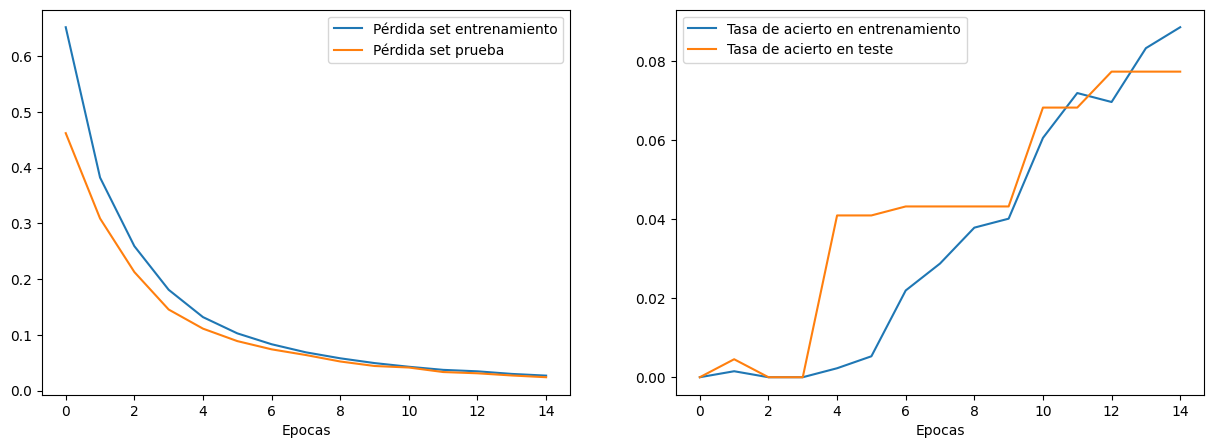

In [ ]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
autoencoder1_sig = Model(inputs=entrada_sig, outputs=decoded_sig)
autoencoder1_sig.compile(optimizer='adam', loss='MeanSquaredError', metrics=['accuracy'])
historia = autoencoder1_sig.fit(X_train, X_train,
                           epochs=15,
                           batch_size=128,
                           validation_data=(X_test, X_test),
                           shuffle=True)

Epoch 1/15
11/11 [==============================] - 3s 37ms/step - loss: 0.3374 - accuracy: 0.0098 - val_loss: 0.2243 - val_accuracy: 0.0000e+00
Epoch 2/15
11/11 [==============================] - 0s 22ms/step - loss: 0.1736 - accuracy: 0.0159 - val_loss: 0.1130 - val_accuracy: 0.0045
Epoch 3/15
11/11 [==============================] - 0s 17ms/step - loss: 0.0876 - accuracy: 0.0182 - val_loss: 0.0579 - val_accuracy: 0.0068
Epoch 4/15
11/11 [==============================] - 0s 20ms/step - loss: 0.0449 - accuracy: 0.0363 - val_loss: 0.0305 - val_accuracy: 0.0045
Epoch 5/15
11/11 [==============================] - 0s 14ms/step - loss: 0.0269 - accuracy: 0.0779 - val_loss: 0.0215 - val_accuracy: 0.1364
Epoch 6/15
11/11 [==============================] - 0s 14ms/step - loss: 0.0193 - accuracy: 0.0923 - val_loss: 0.0157 - val_accuracy: 0.1364
Epoch 7/15
11/11 [==============================] - 0s 14ms/step - loss: 0.0153 - accuracy: 0.1165 - val_loss: 0.0122 - val_accuracy: 0.1364
Epoch 8/1

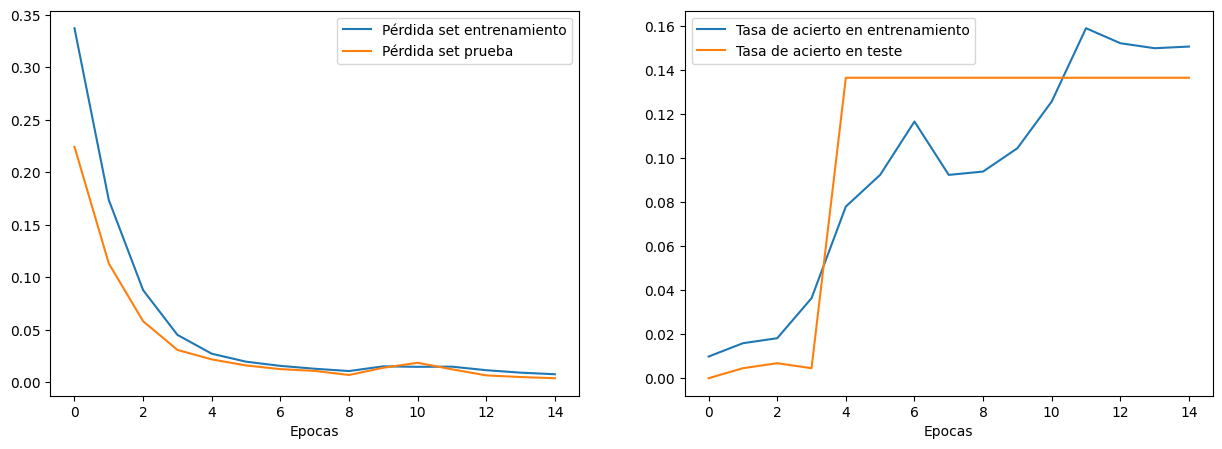

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
bottleneck = Model(entrada_sig, encoded_sig)
rep_test_1sig = bottleneck.predict(X_test)
rep_train_1sig = bottleneck.predict(X_train)
print(rep_test_1sig.shape)
print(rep_train_1sig.shape)

42/42 [==============================] - 0s 2ms/step
(440, 800)
(1322, 800)


In [ ]:
bottleneck = Model(entrada_tan, encoded_tan)
rep_test_1tan = bottleneck.predict(X_test)
rep_train_1tan = bottleneck.predict(X_train)
print(rep_test_1tan.shape)
print(rep_train_1tan.shape)

42/42 [==============================] - 0s 1ms/step
(440, 800)
(1322, 800)


In [ ]:
representacion_train = np.concatenate([rep_train_1sig,rep_train_1tan], axis=1)
representacion_test = np.concatenate([rep_test_1sig,rep_test_1tan], axis=1)
print(representacion_train.shape, representacion_test.shape)

(1322, 1600) (440, 1600)


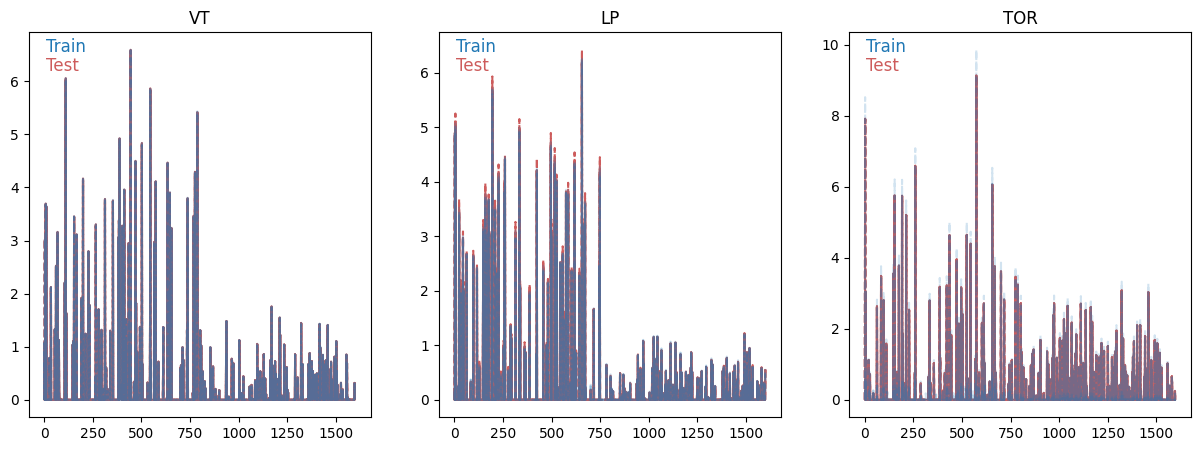

In [ ]:
import matplotlib.pyplot as plt
train_label = 'Train'
test_label = 'Test'
# Crea figuras y subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


# Definir transparencia
line_alpha = 0.2

# Índices para cada clase
class_indices_train = {
    0: rand_train[0],
    1: rand_train[1],
    2: rand_train[2],
}

class_indices_test = {
    0: rand_test[0],
    1: rand_test[1],
    2: rand_test[2],
}

# Etiquetas
class_labels = {
    0: 'VT',
    1: 'LP',
    2: 'TOR',
}

for i, ax in enumerate(axs):
    clase = i
    label = class_labels[clase]

        # Graficar señales de 'Test' en rojo
    for idx in class_indices_test[clase]:
        ax.plot(representacion_test[idx, :], linestyle='--', color='indianred', alpha=1)

    # Graficar señales de 'Train' en azul
    for idx in class_indices_train[clase]:
        ax.plot(representacion_train[idx, :], linestyle='--', color='tab:blue', alpha=line_alpha)


    ax.set_title(label)
    #ax.set_xticks([])  # Remover marcas del eje x
    ax.text(0.05, 0.95, train_label, transform=ax.transAxes, color='tab:blue', fontsize=12)
    ax.text(0.05, 0.9, test_label, transform=ax.transAxes, color='indianred', fontsize=12)

plt.show()

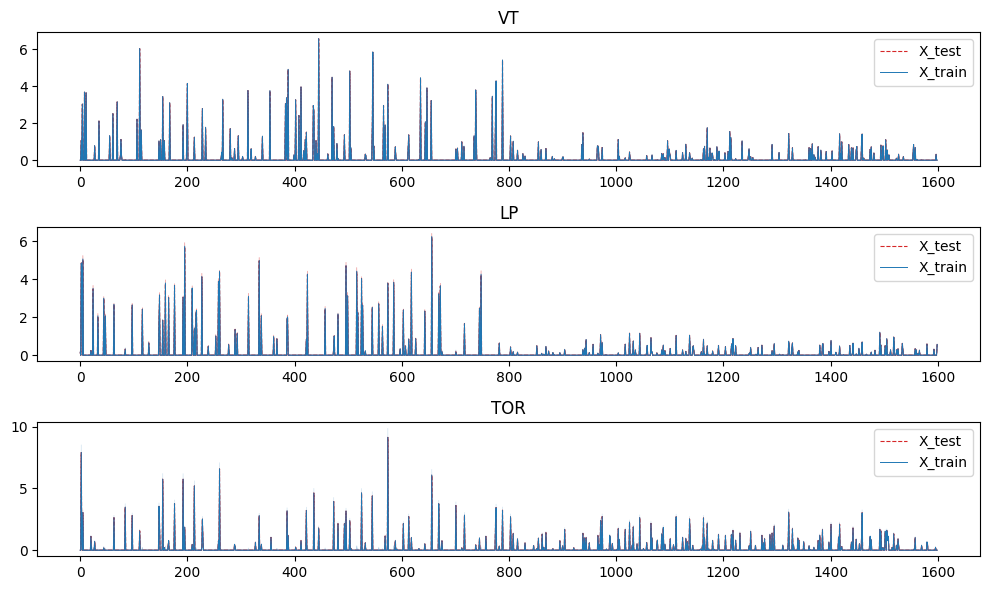

In [ ]:
# Crear una figura con subplots
fig, axs = plt.subplots(len(rand_train), 1, figsize=(10, 6))

# Configurar etiquetas para las matrices
matrix_labels = ['X_train', 'X_test']

# Definir cuántas señales finales se trazarán con línea continua
num_final_signals = 1  # Puedes ajustar este valor según tus necesidades

# Definir los títulos personalizados para cada clase o matriz
class_titles = ['VT', 'LP', 'TOR']  # Puedes ajustar estos títulos

# Iterar sobre las clases y sus índices
for i, (class_name, indices) in enumerate(rand_test.items()):
    ax = axs[i]
    signals = representacion_test[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='tab:red', lw=0.5, alpha=0.5)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[1], color='tab:red', linestyle='--', lw=0.8, alpha=1)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

for i, (class_name, indices) in enumerate(rand_train.items()):
    ax = axs[i]
    signals = representacion_train[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='tab:blue', lw=0.5, alpha=0.2)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[0], color='tab:blue', linestyle='-', lw=0.7, alpha=1)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

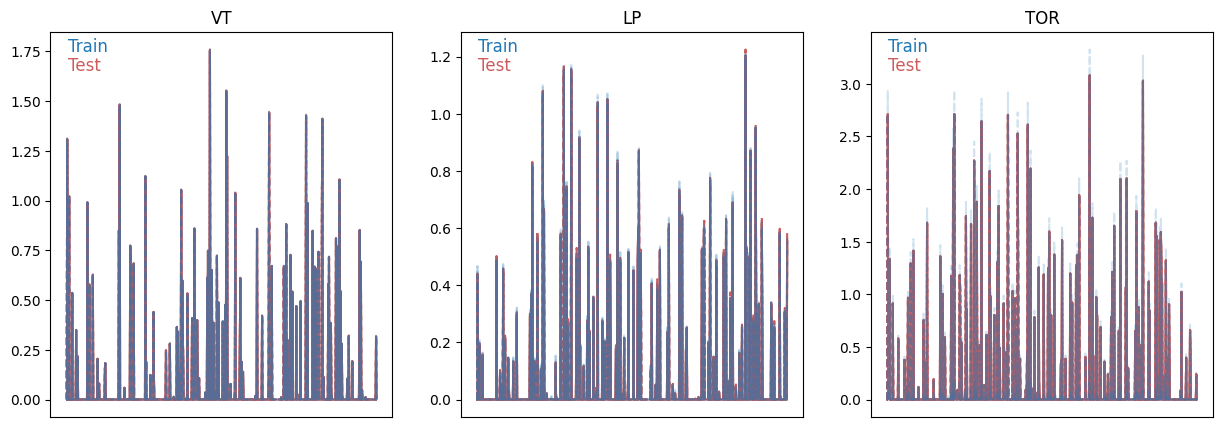

In [ ]:
import matplotlib.pyplot as plt
train_label = 'Train'
test_label = 'Test'
# Crea figuras y subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


# Índices para cada clase
class_indices_train = {
    0: rand_train[0],
    1: rand_train[1],
    2: rand_train[2],
}

class_indices_test = {
    0: rand_test[0],
    1: rand_test[1],
    2: rand_test[2],
}

# Etiquetas
class_labels = {
    0: 'VT',
    1: 'LP',
    2: 'TOR',
}

for i, ax in enumerate(axs):
    clase = i
    label = class_labels[clase]

        # Graficar señales de 'Test' en rojo
    for idx in class_indices_test[clase]:
        ax.plot(rep_test_1tan[idx, :], linestyle='--', color='indianred', alpha=1)

    # Graficar señales de 'Train' en azul
    for idx in class_indices_train[clase]:
        ax.plot(rep_train_1tan[idx, :], linestyle='--', color='tab:blue', alpha=0.2)


    ax.set_title(label)
    ax.set_xticks([])  # Remover marcas del eje x
    ax.text(0.05, 0.95, train_label, transform=ax.transAxes, color='tab:blue', fontsize=12)
    ax.text(0.05, 0.9, test_label, transform=ax.transAxes, color='indianred', fontsize=12)

plt.show()

**Autoencoder II *sigmoid***

In [ ]:
np.random.seed(23)

dim_entrada = rep_train_1sig.shape[1]
entrada_s = Input(shape=(dim_entrada,))
print(rep_train_1sig.shape[1])

# Encoder
x = Dense(400, activation='relu', kernel_regularizer=l2(0.001))(entrada_s)
x = Dropout(0.05)(x)
encoded_s = Dense(200, activation='relu', name='bottleneck_layer')(x)

# Decoder
x = Dense(400, activation='relu', kernel_regularizer=l2(0.001))(encoded_s)
x = Dropout(0.05)(x)
decoded_s = Dense(800, activation='sigmoid')(x)

# autoencod1.2 = Model(inputs=entrada, outputs=decoded)
autoencoder1_2sig= Model(inputs=entrada_s, outputs=decoded_s)

autoencoder1_2sig.summary()

800
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 800)]             0         
                                                                 
 dense_10 (Dense)            (None, 400)               320400    
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 bottleneck_layer (Dense)    (None, 200)               80200     
                                                                 
 dense_11 (Dense)            (None, 400)               80400     
                                                                 
 dropout_9 (Dropout)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 800)               

**Autoencoder II *tanh***

In [ ]:
np.random.seed(23)

dim_entrada = rep_train_1tan.shape[1]
entrada_t = Input(shape=(dim_entrada,))
print(rep_train_1tan.shape[1])

# Encoder
x = Dense(600, activation='relu', kernel_regularizer=l2(0.0001))(entrada_t)
x = Dropout(0.05)(x)
x = Dense(400, activation='relu', kernel_regularizer=l2(0.0001))(entrada_t)
#x = Dropout(0.05)(x)
encoded_t = Dense(200, activation='relu', name='bottleneck_layer')(x)

# Decoder
x = Dense(400, activation='relu', kernel_regularizer=l2(0.0001))(encoded_t)
#x = Dropout(0.05)(x)
x = Dense(600, activation='relu', kernel_regularizer=l2(0.0001))(encoded_t)
x = Dropout(0.05)(x)
decoded_t = Dense(800, activation='tanh')(x)

# autoencod1.2 = Model(inputs=entrada, outputs=decoded)
autoencoder1_2tan = Model(inputs=entrada_t, outputs=decoded_t)

autoencoder1_2tan.summary()

800
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 800)]             0         
                                                                 
 dense_14 (Dense)            (None, 400)               320400    
                                                                 
 bottleneck_layer (Dense)    (None, 200)               80200     
                                                                 
 dense_16 (Dense)            (None, 600)               120600    
                                                                 
 dropout_11 (Dropout)        (None, 600)               0         
                                                                 
 dense_17 (Dense)            (None, 800)               480800    
                                                                 
Total params: 1002000 (3.82 MB)
Trainable params: 10020

Aplicando Autoencoders II

In [ ]:
autoencoder1_2sig = Model(inputs=entrada_s, outputs=decoded_s)
autoencoder1_2sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_2sig.fit(rep_train_1sig, rep_train_1sig,
                           epochs=20,
                           batch_size=128,
                           validation_data=(rep_test_1sig, rep_test_1sig),
                           shuffle=True)

Epoch 1/20
11/11 [==============================] - 3s 23ms/step - loss: 1.1100 - accuracy: 0.1029 - val_loss: 0.7165 - val_accuracy: 0.0000e+00
Epoch 2/20
11/11 [==============================] - 0s 9ms/step - loss: 0.6262 - accuracy: 0.0045 - val_loss: 0.5181 - val_accuracy: 0.0000e+00
Epoch 3/20
11/11 [==============================] - 0s 8ms/step - loss: 0.4590 - accuracy: 0.0000e+00 - val_loss: 0.3896 - val_accuracy: 0.0000e+00
Epoch 4/20
11/11 [==============================] - 0s 9ms/step - loss: 0.3503 - accuracy: 0.0000e+00 - val_loss: 0.3050 - val_accuracy: 0.0000e+00
Epoch 5/20
11/11 [==============================] - 0s 9ms/step - loss: 0.2808 - accuracy: 0.0000e+00 - val_loss: 0.2523 - val_accuracy: 0.0000e+00
Epoch 6/20
11/11 [==============================] - 0s 8ms/step - loss: 0.2365 - accuracy: 0.0000e+00 - val_loss: 0.2173 - val_accuracy: 0.0000e+00
Epoch 7/20
11/11 [==============================] - 0s 9ms/step - loss: 0.2082 - accuracy: 0.0000e+00 - val_loss: 0.195

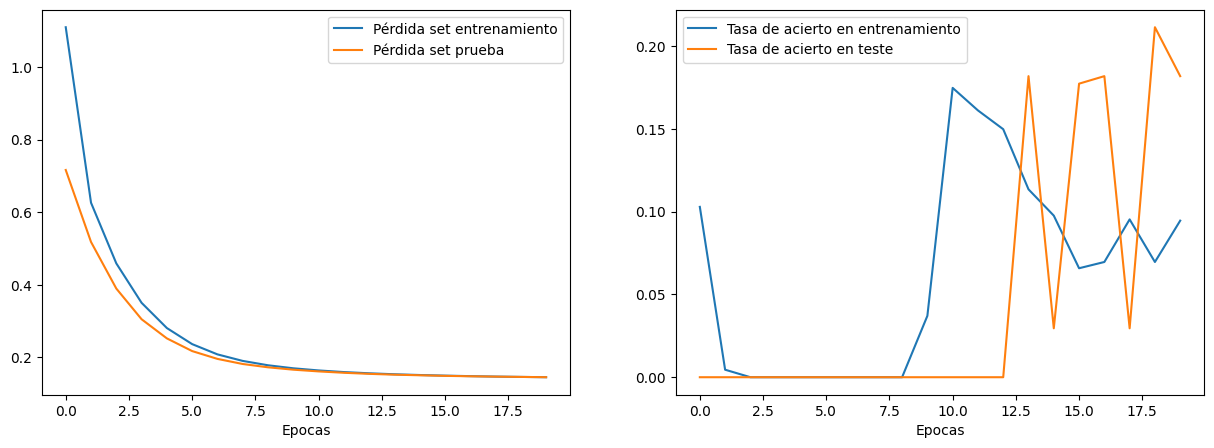

In [ ]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
autoencoder1_2tan = Model(inputs=entrada_t, outputs=decoded_t)
autoencoder1_2tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_2tan.fit(rep_train_1tan, rep_train_1tan,
                           epochs=25,
                           batch_size=128,
                           validation_data=(rep_test_1tan, rep_test_1tan),
                           shuffle=True)

Epoch 1/25
11/11 [==============================] - 2s 21ms/step - loss: 0.1538 - accuracy: 0.0000e+00 - val_loss: 0.1333 - val_accuracy: 0.0000e+00
Epoch 2/25
11/11 [==============================] - 0s 8ms/step - loss: 0.1215 - accuracy: 0.0000e+00 - val_loss: 0.1109 - val_accuracy: 0.0000e+00
Epoch 3/25
11/11 [==============================] - 0s 8ms/step - loss: 0.0960 - accuracy: 0.0000e+00 - val_loss: 0.0744 - val_accuracy: 0.0000e+00
Epoch 4/25
11/11 [==============================] - 0s 8ms/step - loss: 0.0667 - accuracy: 0.0000e+00 - val_loss: 0.0518 - val_accuracy: 0.0000e+00
Epoch 5/25
11/11 [==============================] - 0s 8ms/step - loss: 0.0508 - accuracy: 0.0000e+00 - val_loss: 0.0406 - val_accuracy: 0.0000e+00
Epoch 6/25
11/11 [==============================] - 0s 8ms/step - loss: 0.0409 - accuracy: 0.0038 - val_loss: 0.0321 - val_accuracy: 0.0000e+00
Epoch 7/25
11/11 [==============================] - 0s 9ms/step - loss: 0.0335 - accuracy: 0.0250 - val_loss: 0.026

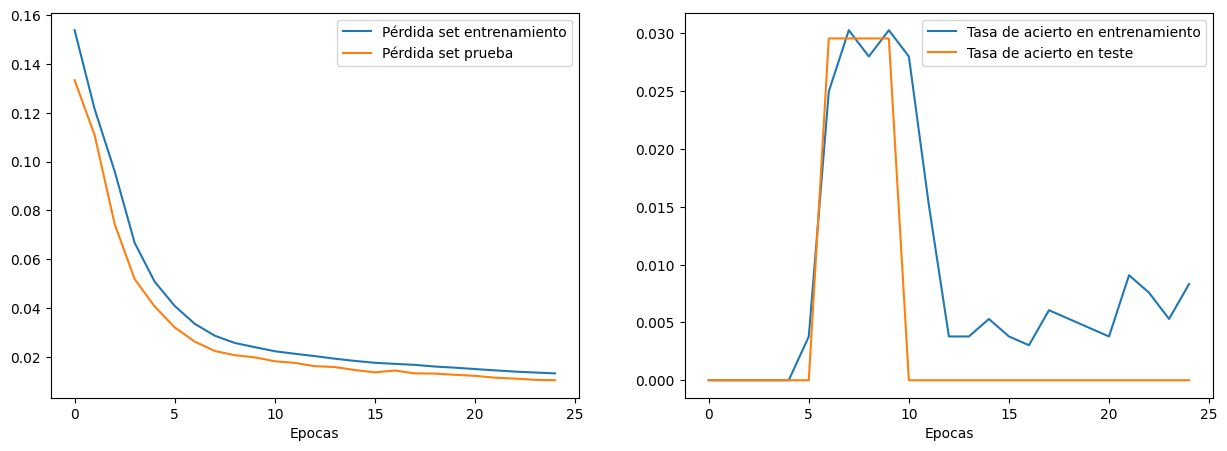

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
bottleneck = Model(entrada_s, encoded_s)
rep_test_1s = bottleneck.predict(rep_test_1sig)
rep_train_1s = bottleneck.predict(rep_train_1sig)
print(rep_test_1s.shape)
print(rep_train_1s.shape)

42/42 [==============================] - 0s 1ms/step
(440, 200)
(1322, 200)


In [ ]:
bottleneck = Model(entrada_t, encoded_t)
rep_test_1t = bottleneck.predict(rep_test_1tan) #rep_test_1tan
rep_train_1t = bottleneck.predict(rep_train_1tan) #
print(rep_test_1t.shape)
print(rep_train_1t.shape)

42/42 [==============================] - 0s 1ms/step
(440, 200)
(1322, 200)


In [ ]:
latente_train = np.concatenate([rep_train_1s,rep_train_1t], axis=1)
latente_test = np.concatenate([rep_test_1s,rep_test_1t], axis=1)
print(latente_train.shape, latente_test.shape)

(1322, 400) (440, 400)


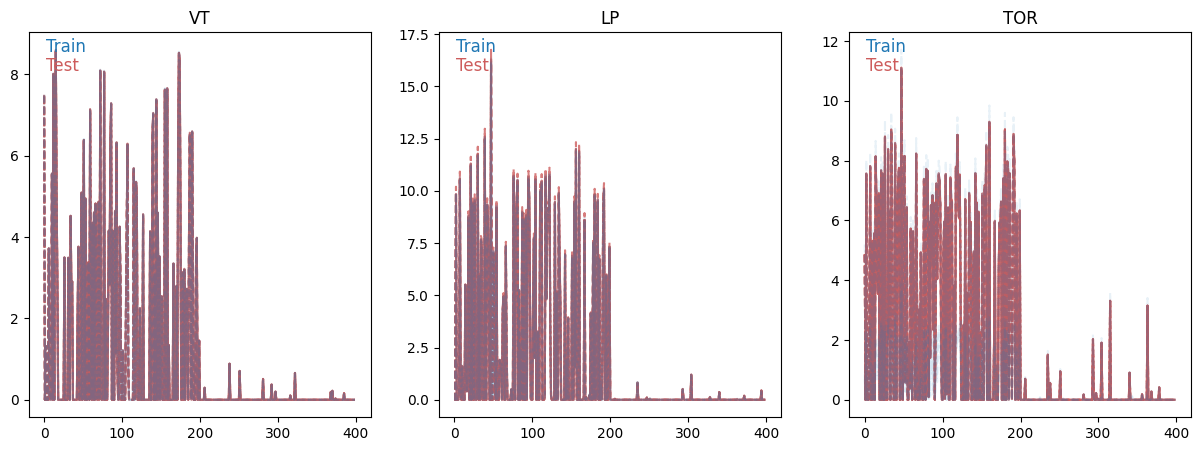

In [ ]:
train_label = 'Train'
test_label = 'Test'
# Crea figuras y subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


# Definir transparencia
line_alpha = 0.1

# Índices para cada clase
class_indices_train = {
    0: rand_train[0],
    1: rand_train[1],
    2: rand_train[2],
}

class_indices_test = {
    0: rand_test[0],
    1: rand_test[1],
    2: rand_test[2],
}

# Etiquetas
class_labels = {
    0: 'VT',
    1: 'LP',
    2: 'TOR',
}

for i, ax in enumerate(axs):
    clase = i
    label = class_labels[clase]

        # Graficar señales de 'Test' en rojo
    for idx in class_indices_test[clase]:
        ax.plot(latente_test[idx, :], linestyle='--', color='indianred', alpha=0.8)

    # Graficar señales de 'Train' en azul
    for idx in class_indices_train[clase]:
        ax.plot(latente_train[idx, :], linestyle='--', color='tab:blue', alpha=line_alpha)


    ax.set_title(label)
    #ax.set_xticks([])  # Remover marcas del eje x
    ax.text(0.05, 0.95, train_label, transform=ax.transAxes, color='tab:blue', fontsize=12)
    ax.text(0.05, 0.9, test_label, transform=ax.transAxes, color='indianred', fontsize=12)

plt.show()

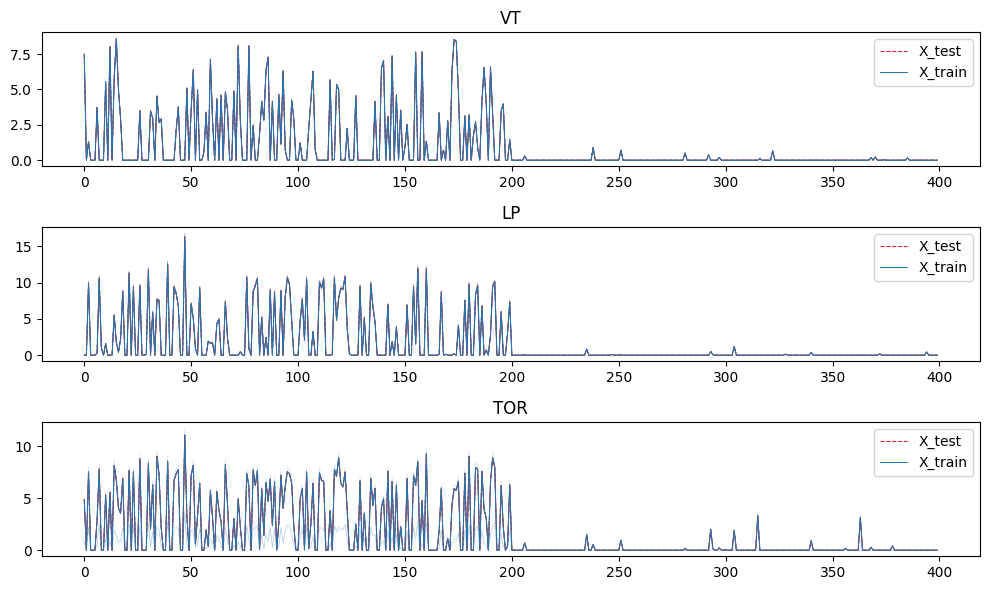

In [ ]:
# Crear una figura con subplots
fig, axs = plt.subplots(len(rand_train), 1, figsize=(10, 6))

# Configurar etiquetas para las matrices
matrix_labels = ['X_train', 'X_test']

# Definir cuántas señales finales se trazarán con línea continua
num_final_signals = 1  # Puedes ajustar este valor según tus necesidades

# Definir los títulos personalizados para cada clase o matriz
class_titles = ['VT', 'LP', 'TOR']  # Puedes ajustar estos títulos

# Iterar sobre las clases y sus índices
for i, (class_name, indices) in enumerate(rand_test.items()):
    ax = axs[i]
    signals = latente_test[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='tab:red', lw=0.5, alpha=0.5)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[1], color='tab:red', linestyle='--', lw=0.8, alpha=1)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

for i, (class_name, indices) in enumerate(rand_train.items()):
    ax = axs[i]
    signals = latente_train[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='tab:blue', lw=0.5, alpha=0.2)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[0], color='tab:blue', linestyle='-', lw=0.7, alpha=1)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

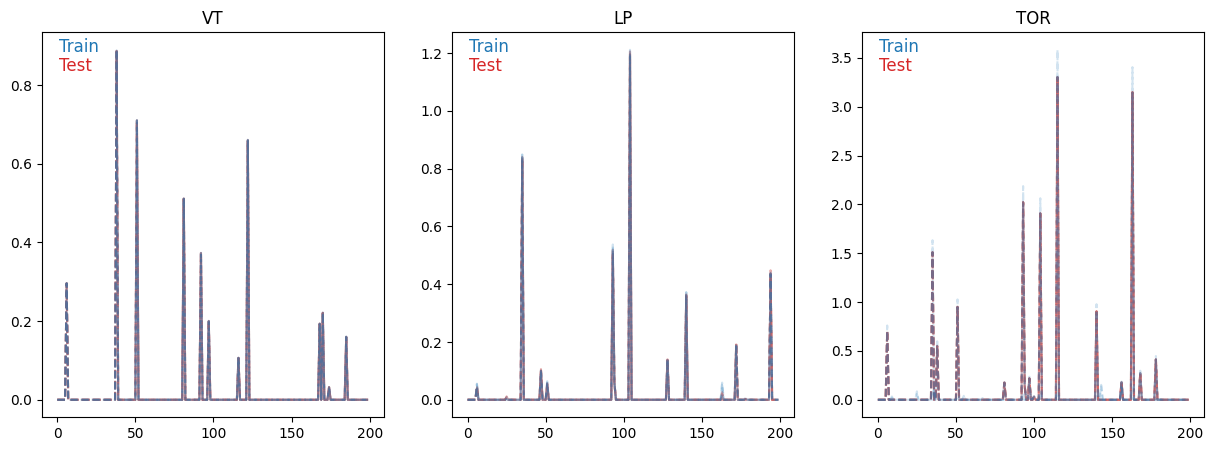

In [ ]:
train_label = 'Train'
test_label = 'Test'
# Crea figuras y subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Índices para cada clase
class_indices_train = {
    0: rand_train[0],
    1: rand_train[1],
    2: rand_train[2],
}

class_indices_test = {
    0: rand_test[0],
    1: rand_test[1],
    2: rand_test[2],
}

# Etiquetas
class_labels = {
    0: 'VT',
    1: 'LP',
    2: 'TOR',
}

for i, ax in enumerate(axs):
    clase = i
    label = class_labels[clase]

        # Graficar señales de 'Test' en rojo
    for idx in class_indices_test[clase]:
        ax.plot(rep_test_1t[idx, :], linestyle='--', color='indianred', alpha=0.5)

    # Graficar señales de 'Train' en azul
    for idx in class_indices_train[clase]:
        ax.plot(rep_train_1t[idx, :], linestyle='--', color='tab:blue', alpha=0.2)


    ax.set_title(label)
    #ax.set_xticks([])  # Remover marcas del eje x
    ax.text(0.05, 0.95, train_label, transform=ax.transAxes, color='tab:blue', fontsize=12)
    ax.text(0.05, 0.9, test_label, transform=ax.transAxes, color='tab:red', fontsize=12)

plt.show()

# Validación del modelo Autoencoder

Genramos una representación con el Autoencoder entrenado para los datos que nunca antes vió (X_val) y concatenamos para luego comparar con las salidas durante el entrenamiento.

In [ ]:
bottleneck = Model(entrada_sig, encoded_sig)
val_1sig = bottleneck.predict(X_val)
bottleneck = Model(entrada_tan, encoded_tan)
val_1tan = bottleneck.predict(X_val)

bottleneck = Model(entrada_s, encoded_s)
val_1s = bottleneck.predict(val_1sig)
bottleneck = Model(entrada_t, encoded_t)
val_1t = bottleneck.predict(val_1tan)

# Concatenamos la representación
rep_val = np.concatenate((val_1s, val_1t), axis=1)
print(rep_val.shape)

14/14 [==============================] - 0s 1ms/step
(443, 400)


Concatenamos las representaciones generadas en *train* y *test* para verificar si son semejantes a las representacones con los datos de la validación.

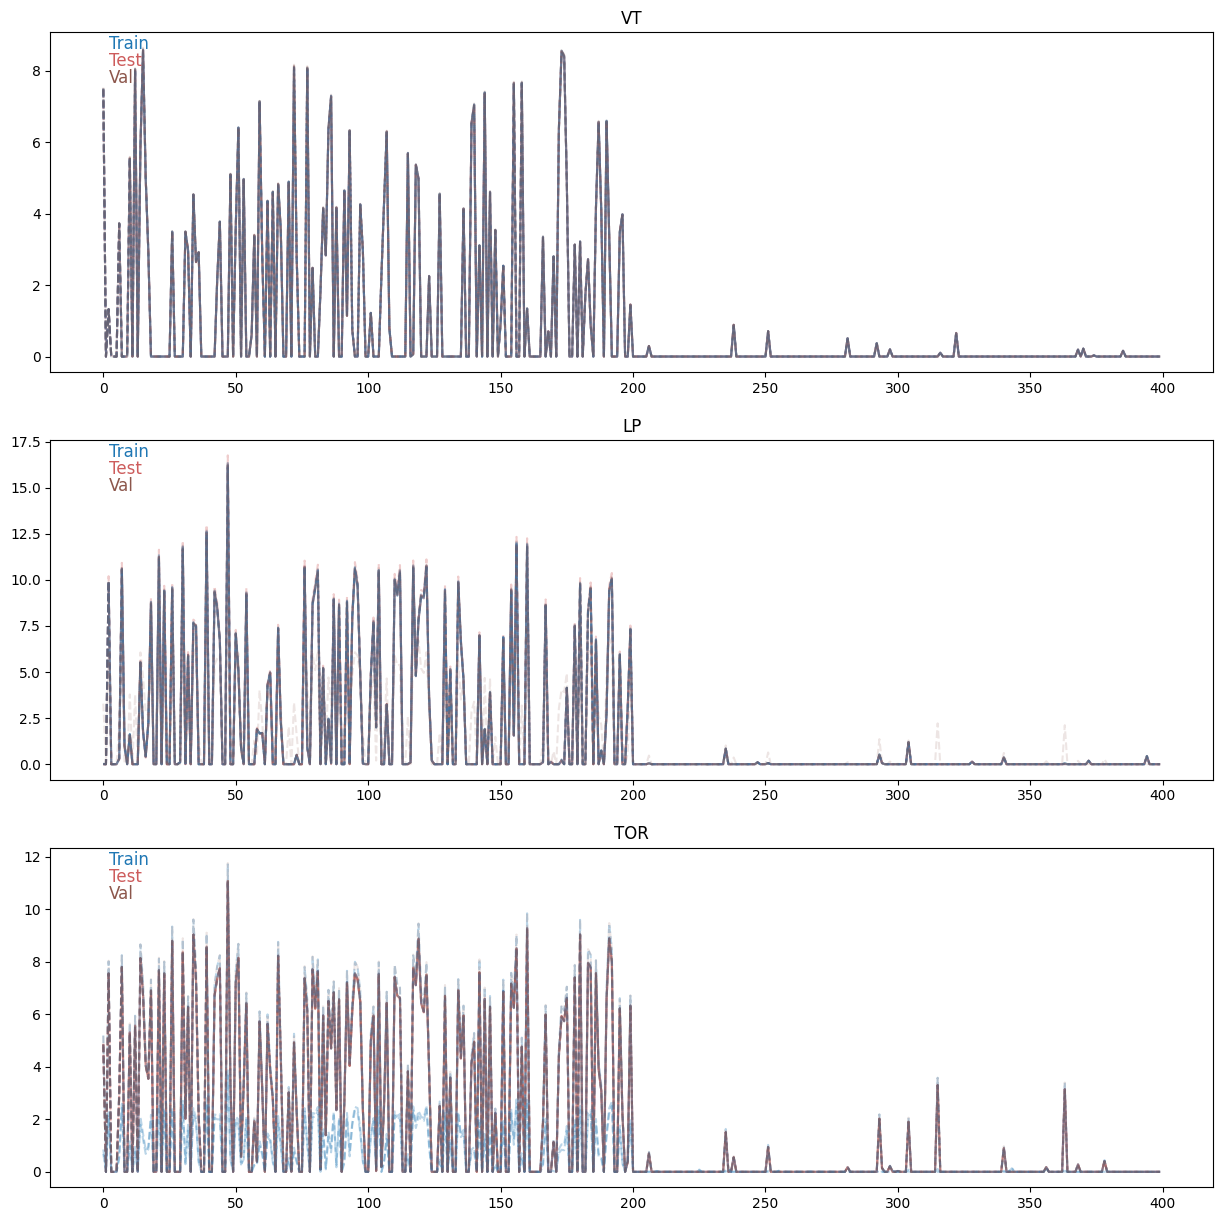

In [ ]:
train_label = 'Train'
test_label = 'Test'
val_label = 'Val'
# Crea figuras y subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 15))


# Índices para cada clase
class_indices_train = {
    0: rand_train[0],
    1: rand_train[1],
    2: rand_train[2],
}

class_indices_test = {
    0: rand_test[0],
    1: rand_test[1],
    2: rand_test[2],
}

class_indices_val = {
    0: rand_val[0],
    1: rand_val[1],
    2: rand_val[2],
}

# Etiquetas
class_labels = {
    0: 'VT',
    1: 'LP',
    2: 'TOR',
}

for i, ax in enumerate(axs):
    clase = i
    label = class_labels[clase]

        # Graficar señales de 'Test' en rojo
    for idx in class_indices_test[clase]:
        ax.plot(latente_test[idx, :], linestyle='--', color='indianred', alpha=0.3)

    # Graficar señales de 'Train' en azul
    for idx in class_indices_train[clase]:
        ax.plot(latente_train[idx, :], linestyle='--', color='tab:blue', alpha=0.3)

    # Graficar señales de 'Val' en verde
    for idx in class_indices_val[clase]:
        ax.plot(rep_val[idx, :], linestyle='--', color='tab:brown', alpha=0.15)


    ax.set_title(label)
    #ax.set_xticks([])  # Remover marcas del eje x
    ax.text(0.05, 0.95, train_label, transform=ax.transAxes, color='tab:blue', fontsize=12)
    ax.text(0.05, 0.9, test_label, transform=ax.transAxes, color='indianred', fontsize=12)
    ax.text(0.05, 0.85, val_label, transform=ax.transAxes, color='tab:brown', fontsize=12)

plt.show()

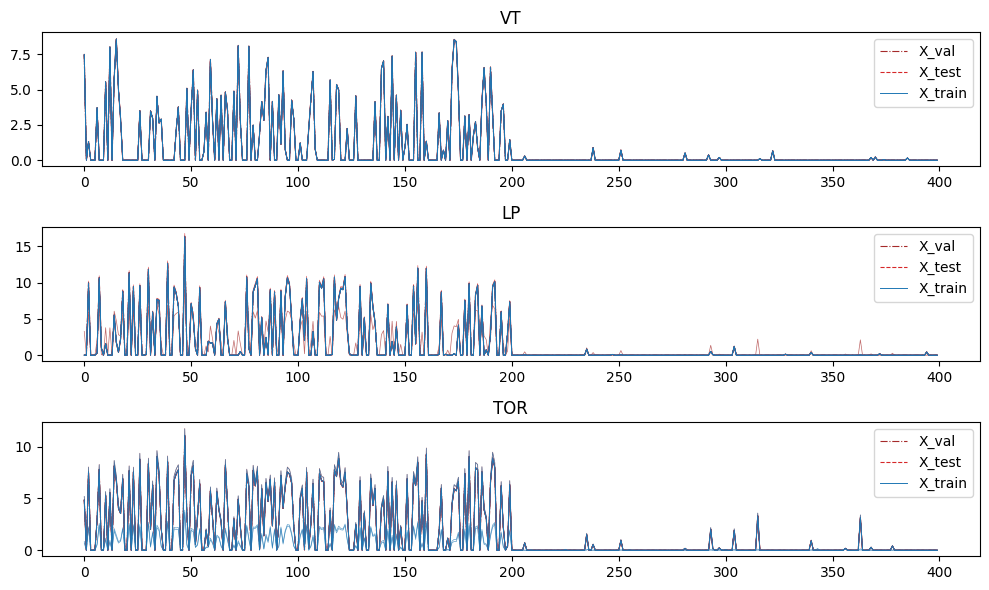

In [ ]:
# Crear una figura con subplots
fig, axs = plt.subplots(len(rand_train), 1, figsize=(10, 6))

# Configurar etiquetas para las matrices
matrix_labels = ['X_train', 'X_test', 'X_val']

# Definir cuántas señales finales se trazarán con línea continua
num_final_signals = 1  # Puedes ajustar este valor según tus necesidades

# Definir los títulos personalizados para cada clase o matriz
class_titles = ['VT', 'LP', 'TOR']  # Puedes ajustar estos títulos

# Iterar sobre las clases y sus índices
for i, (class_name, indices) in enumerate(rand_val.items()):
    ax = axs[i]
    signals = rep_val[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='brown', lw=0.5, alpha=0.7)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[2], color='brown', linestyle='-.', lw=0.8, alpha=1)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

for i, (class_name, indices) in enumerate(rand_test.items()):
    ax = axs[i]
    signals = latente_test[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='tab:red', lw=0.5, alpha=0.7)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[1], color='tab:red', linestyle='--', lw=0.8, alpha=1)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

for i, (class_name, indices) in enumerate(rand_train.items()):
    ax = axs[i]
    signals = latente_train[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='tab:blue', lw=0.5, alpha=0.7)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[0], color='tab:blue', linestyle='-', lw=0.7, alpha=1)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

# **Representaciones D A F**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Ajusta el escalador a los datos de entrenamiento
min_max_scaler.fit(latente_train)

# Aplica la transformación a todos los conjuntos de datos
latente_train = min_max_scaler.transform(latente_train)
latente_test = min_max_scaler.transform(latente_test)
rep_val = min_max_scaler.transform(rep_val)
isla = min_max_scaler.transform(isla)
etna = min_max_scaler.transform(etna)

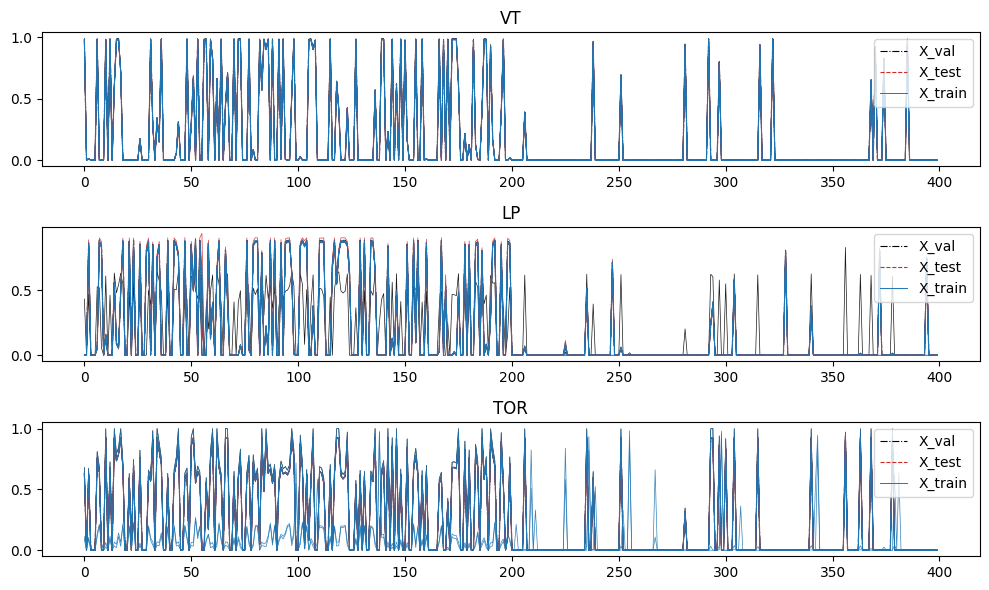

In [ ]:
# Crear una figura con subplots
fig, axs = plt.subplots(len(rand_train), 1, figsize=(10, 6))

# Configurar etiquetas para las matrices
matrix_labels = ['X_train', 'X_test', 'X_val']

# Definir cuántas señales finales se trazarán con línea continua
num_final_signals = 1  # Puedes ajustar este valor según tus necesidades

# Definir los títulos personalizados para cada clase o matriz
class_titles = ['VT', 'LP', 'TOR']  # Puedes ajustar estos títulos

# Iterar sobre las clases y sus índices
for i, (class_name, indices) in enumerate(rand_val.items()):
    ax = axs[i]
    signals = rep_val[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='k', lw=0.5, alpha=0.9)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[2], color='k', linestyle='-.', lw=0.8, alpha=1)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

for i, (class_name, indices) in enumerate(rand_test.items()):
    ax = axs[i]
    signals = latente_test[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='tab:red', lw=0.5, alpha=0.9)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[1], color='tab:red', linestyle='--', lw=0.8, alpha=1)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

for i, (class_name, indices) in enumerate(rand_train.items()):
    ax = axs[i]
    signals = latente_train[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='tab:blue', lw=0.5, alpha=0.9)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[0], color='tab:blue', linestyle='-', lw=0.7, alpha=1)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

Para la clasificación juntamos el set de entrenamiento y prueba, ya que se usará CrossValidation Stratifyed para el entrenameinto. Dejaremos un set de Validación para evaluar el rendimeinto del modelo de clasificación al final.

Una vez entrenado el autoencoder extraemos la información aprendida de la capa de menor dimensión, la cual consigue representar mejor la señal.

A continuación se presenta la representación compactada por el Autoencoder para 10 seãnales aleatorias para el set de entrenamiento y del set de validación normalizadas.

# **Classificação com MLPerceptron**

**Normalización de las representaciones**

In [ ]:
# concatenamos X_train y X_test, además de y_train con y_test
X = np.concatenate((latente_train, latente_test), axis=0)
print(X.shape)
y = np.concatenate((y_train, y_test), axis=0)
print(y.shape)


(1762, 400)
(1762,)


# Escogiendo el Modelo (by Reginaldo)

**Clasificador MLP**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización
# a decartar valores altos en la función de costo. Se puede colocar en cualq
from keras.layers import Dropout #apagar aleatoriamente algunas neuronas,
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping
from keras.activations import relu, sigmoid, tanh
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.1906 - auc: 0.9955
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0431 - auc: 0.9995
Epoch 3/25
92/92 [==============================] - 0s 3ms/step - loss: 0.0315 - auc: 0.9994
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0182 - auc: 0.9996
Epoch 5/25
92/92 [==============================] - 0s 3ms/step - loss: 0.0124 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0106 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0098 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0096 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0093 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0094 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

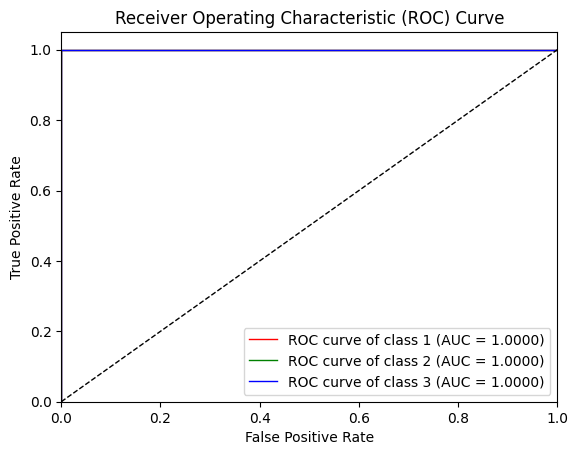

Epoch 1/25
92/92 [==============================] - 1s 4ms/step - loss: 0.3452 - auc: 0.9848
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0411 - auc: 0.9992
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0292 - auc: 0.9995
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0192 - auc: 0.9995
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0141 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0121 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0109 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0104 - auc: 0.9995
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0098 - auc: 0.9995
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0094 - auc: 0.9995
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

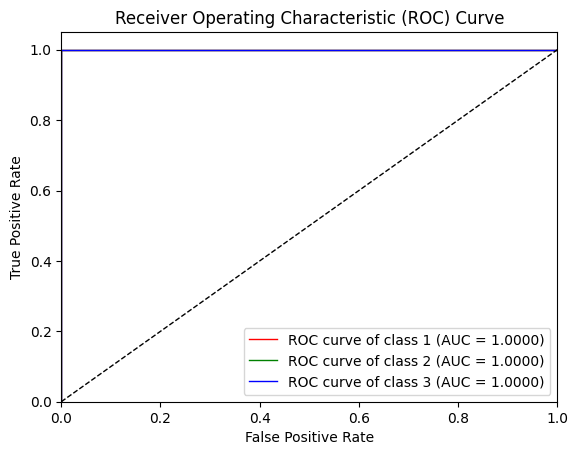

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.2241 - auc: 0.9916
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0306 - auc: 0.9996
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0201 - auc: 0.9996
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0152 - auc: 0.9994
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0119 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0111 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0105 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0104 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0099 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0099 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

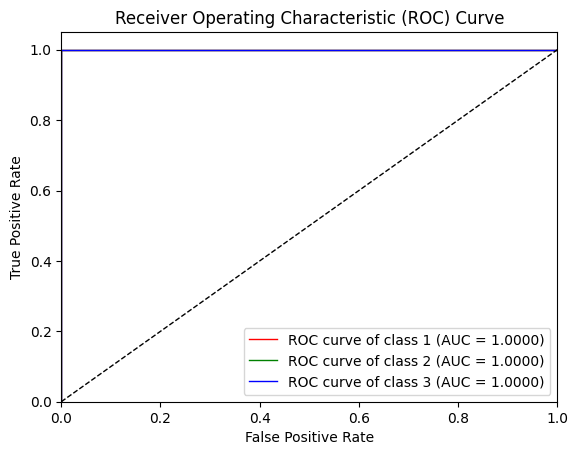

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.1964 - auc: 0.9964
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0401 - auc: 0.9991
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0308 - auc: 0.9994
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0242 - auc: 0.9994
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0181 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0155 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0141 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0133 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0123 - auc: 0.9995
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0118 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

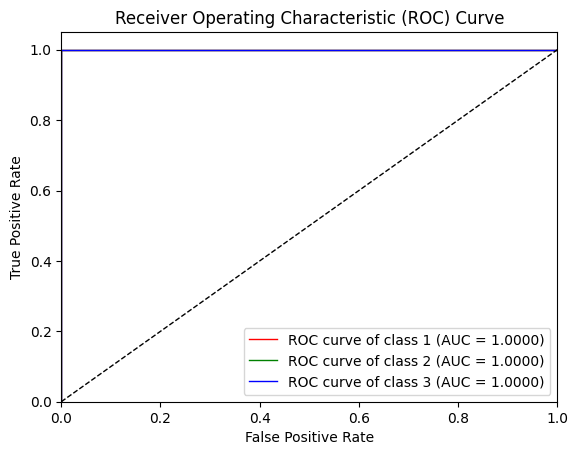

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.1058 - auc: 0.9984
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0248 - auc: 0.9995
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0143 - auc: 0.9994
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0118 - auc: 0.9994
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0111 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0105 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0103 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0102 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0097 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0098 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

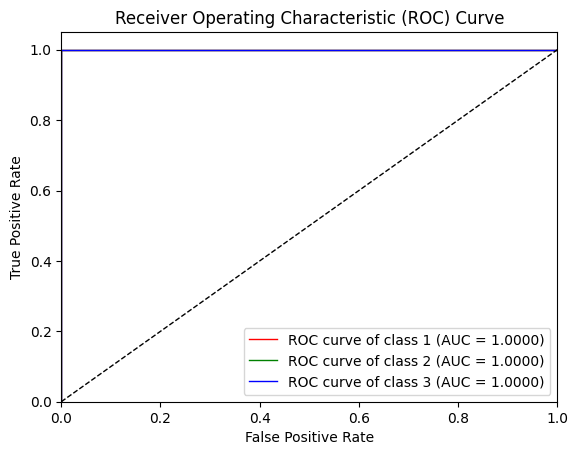

Epoch 1/25
92/92 [==============================] - 1s 4ms/step - loss: 0.4506 - auc: 0.9667
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0607 - auc: 0.9995
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0219 - auc: 1.0000
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0106 - auc: 1.0000
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0062 - auc: 1.0000
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0041 - auc: 1.0000
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0029 - auc: 1.0000
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0021 - auc: 1.0000
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0019 - auc: 1.0000
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0015 - auc: 1.0000
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

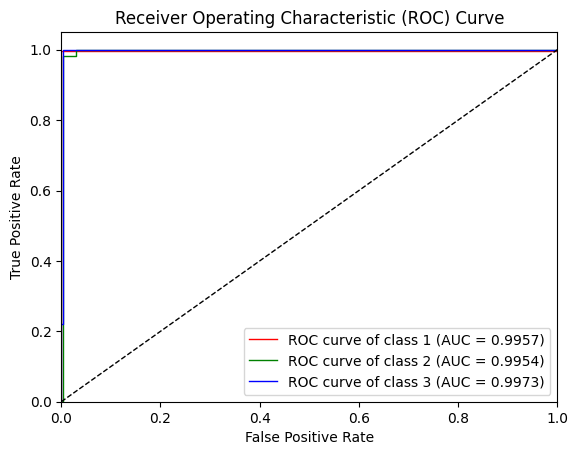

#########################################
Units: 20 Activation Function: relu AUC Média: 0.9993496653746675
#########################################
Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.8523 - auc: 0.8652
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.4266 - auc: 0.9962
Epoch 3/25
92/92 [==============================] - 1s 5ms/step - loss: 0.2778 - auc: 0.9977
Epoch 4/25
92/92 [==============================] - 1s 6ms/step - loss: 0.2002 - auc: 0.9990
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1537 - auc: 0.9990
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1227 - auc: 0.9990
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1009 - auc: 0.9990
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0846 - auc: 0.9997
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0722 - auc: 0.9998
Epoch 10/25
9

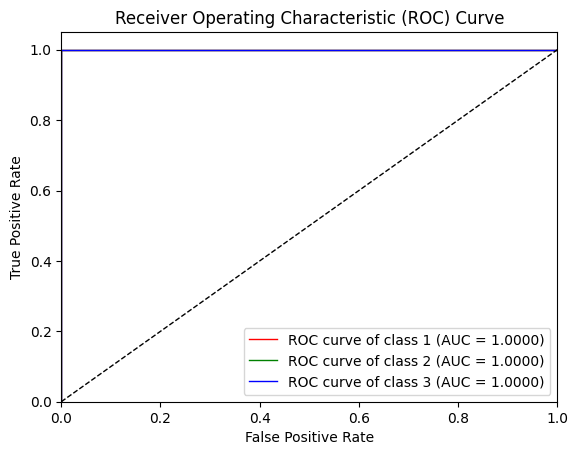

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.4811 - auc: 0.9648
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.3193 - auc: 0.9761
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2229 - auc: 0.9953
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1615 - auc: 0.9965
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1221 - auc: 0.9990
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0944 - auc: 0.9991
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0743 - auc: 0.9997
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0603 - auc: 0.9998
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0504 - auc: 0.9998
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0430 - auc: 0.9998
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

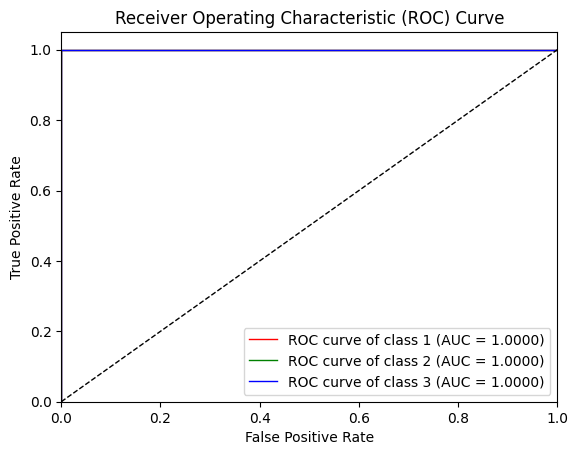

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.6935 - auc: 0.9319
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.3969 - auc: 0.9774
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2896 - auc: 0.9945
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2080 - auc: 0.9963
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1581 - auc: 0.9990
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1256 - auc: 0.9990
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1026 - auc: 0.9992
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0853 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0719 - auc: 0.9998
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0614 - auc: 0.9998
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

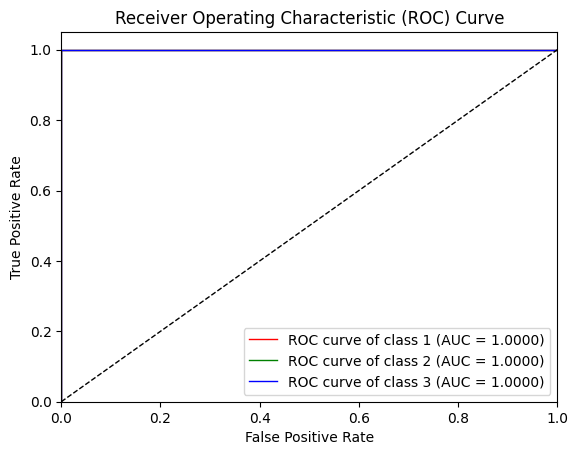

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.5680 - auc: 0.9547
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2810 - auc: 0.9950
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1882 - auc: 0.9962
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1425 - auc: 0.9987
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1146 - auc: 0.9990
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0946 - auc: 0.9989
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0794 - auc: 0.9992
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0674 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0579 - auc: 0.9998
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0503 - auc: 0.9998
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

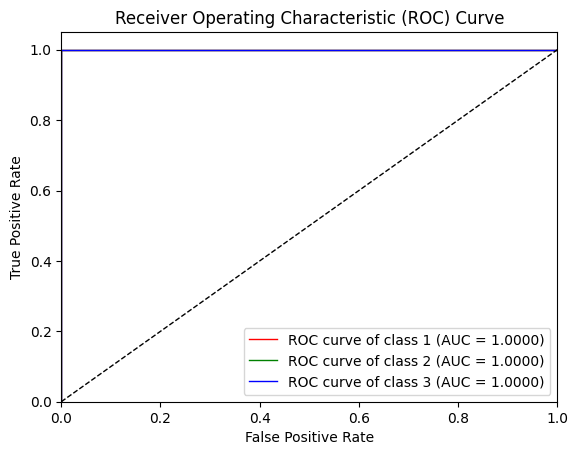

Epoch 1/25
92/92 [==============================] - 1s 4ms/step - loss: 1.0134 - auc: 0.7115
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.5789 - auc: 0.9737
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.4171 - auc: 0.9900
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.3178 - auc: 0.9957
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2475 - auc: 0.9962
Epoch 6/25
92/92 [==============================] - 1s 5ms/step - loss: 0.1946 - auc: 0.9984
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1545 - auc: 0.9991
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1247 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1022 - auc: 0.9998
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0849 - auc: 0.9999
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

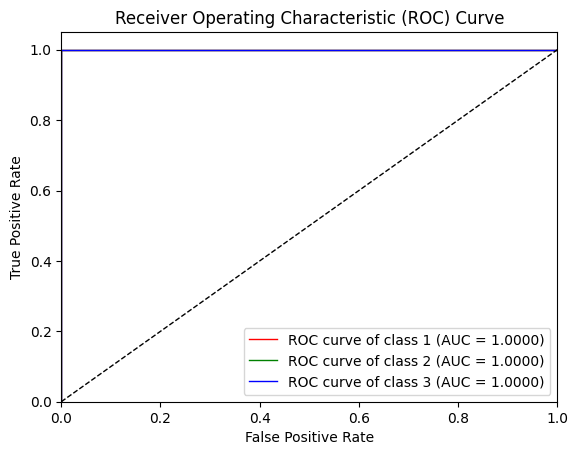

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.7038 - auc: 0.8962
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.3589 - auc: 0.9846
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2403 - auc: 0.9938
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1739 - auc: 0.9964
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1347 - auc: 0.9991
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1098 - auc: 0.9991
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0923 - auc: 0.9991
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0795 - auc: 0.9991
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0695 - auc: 0.9992
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0614 - auc: 0.9996
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

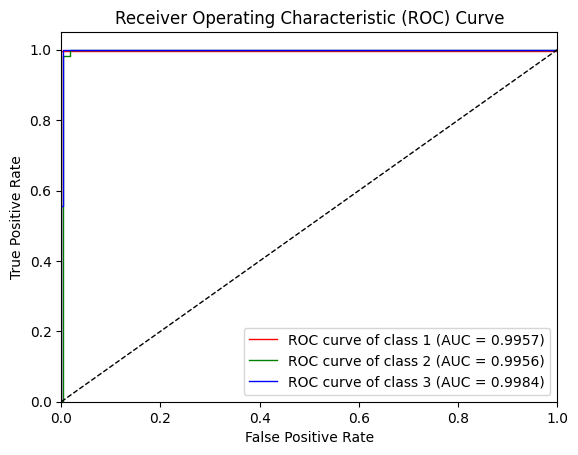

#########################################
Units: 20 Activation Function: sigmoid AUC Média: 0.999427974151156
#########################################
Epoch 1/25
92/92 [==============================] - 2s 6ms/step - loss: 0.1189 - auc: 0.9981
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0520 - auc: 0.9993
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0339 - auc: 0.9994
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0245 - auc: 0.9995
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0196 - auc: 0.9996
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0165 - auc: 0.9996
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0144 - auc: 0.9996
Epoch 8/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0134 - auc: 0.9995
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0125 - auc: 0.9996
Epoch 10/25

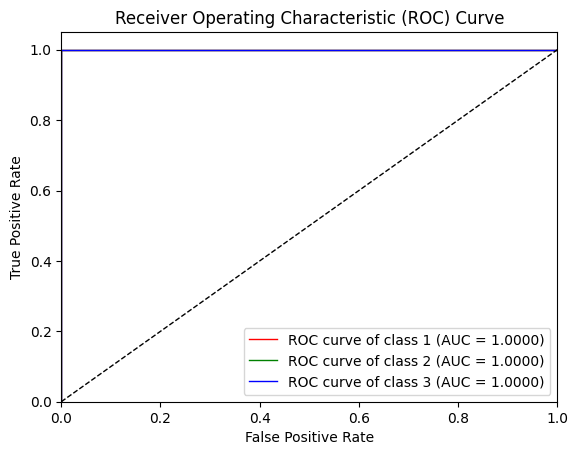

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.2054 - auc: 0.9967
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0625 - auc: 0.9998
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0328 - auc: 0.9998
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0224 - auc: 0.9998
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0177 - auc: 0.9998
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0150 - auc: 0.9998
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0134 - auc: 0.9998
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0123 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0115 - auc: 0.9996
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0109 - auc: 0.9996
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

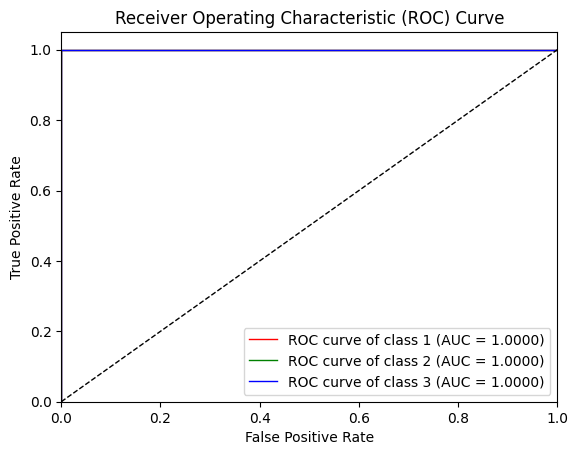

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.2589 - auc: 0.9951
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0766 - auc: 0.9999
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0409 - auc: 0.9999
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0279 - auc: 0.9999
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0216 - auc: 0.9998
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0180 - auc: 0.9999
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0158 - auc: 0.9999
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0142 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0130 - auc: 0.9999
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0120 - auc: 0.9999
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

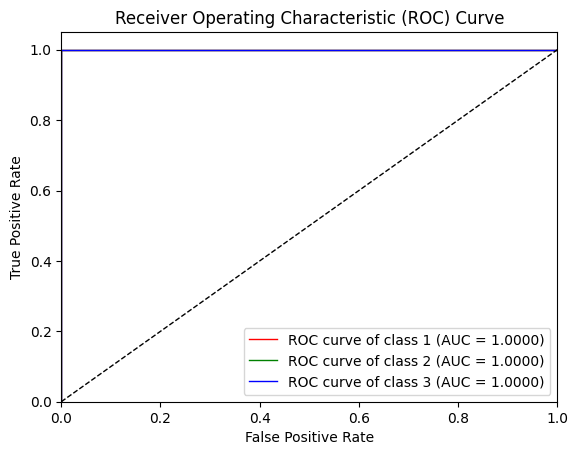

Epoch 1/25
92/92 [==============================] - 2s 6ms/step - loss: 0.1639 - auc: 0.9955
Epoch 2/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0533 - auc: 0.9998
Epoch 3/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0319 - auc: 0.9999
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0222 - auc: 0.9998
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0177 - auc: 0.9999
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0153 - auc: 0.9998
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0134 - auc: 0.9999
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0125 - auc: 0.9995
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0117 - auc: 0.9999
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0109 - auc: 0.9995
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

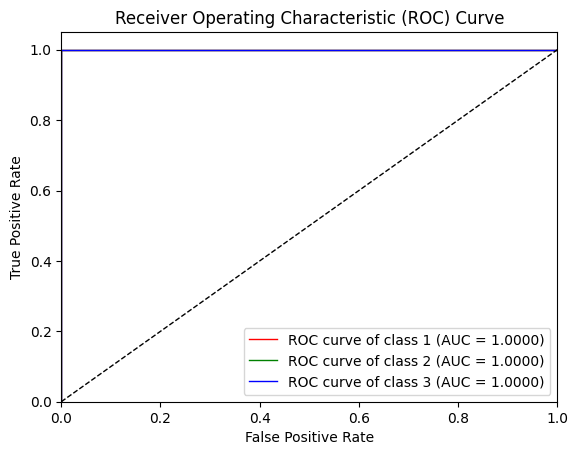

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.1691 - auc: 0.9962
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0521 - auc: 0.9998
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0319 - auc: 0.9998
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0225 - auc: 0.9998
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0175 - auc: 0.9999
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0149 - auc: 0.9998
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0133 - auc: 0.9998
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0121 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0115 - auc: 0.9996
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0109 - auc: 0.9996
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

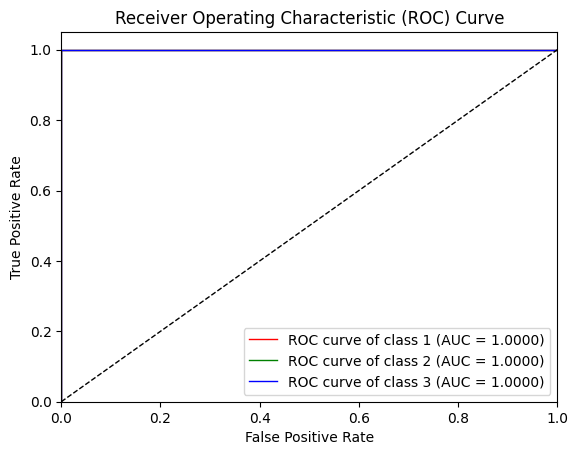

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.1575 - auc: 0.9985
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0437 - auc: 1.0000
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0227 - auc: 1.0000
Epoch 4/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0142 - auc: 1.0000
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0099 - auc: 1.0000
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0074 - auc: 1.0000
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0058 - auc: 1.0000
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0046 - auc: 1.0000
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0039 - auc: 1.0000
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0032 - auc: 1.0000
Epoch 11/25
92/92 [==============================] - 1s 7ms/step - lo

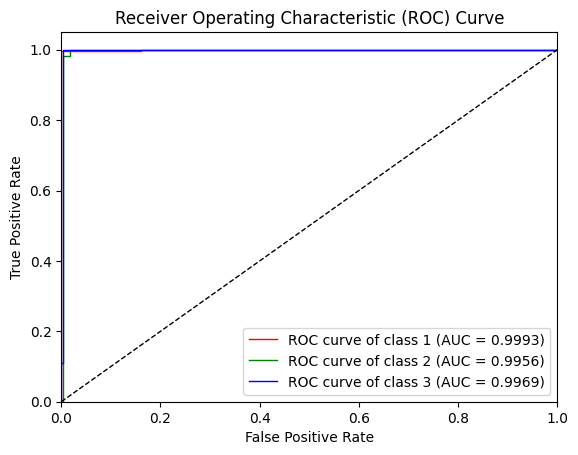

#########################################
Units: 20 Activation Function: tanh AUC Média: 0.9995427426287898
#########################################
Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.4018 - auc: 0.9734
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0463 - auc: 0.9993
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0285 - auc: 0.9995
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0179 - auc: 0.9996
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0130 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0114 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0103 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0099 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0097 - auc: 0.9995
Epoch 10/25
9

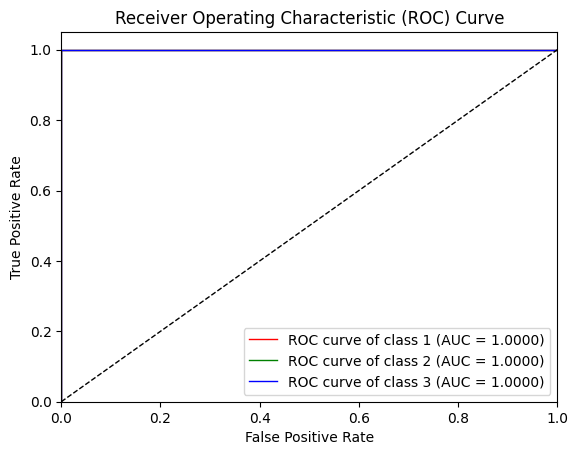

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.5003 - auc: 0.9772
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0591 - auc: 0.9987
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0484 - auc: 0.9990
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0433 - auc: 0.9993
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0383 - auc: 0.9995
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0335 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0288 - auc: 0.9995
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0252 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0227 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0209 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

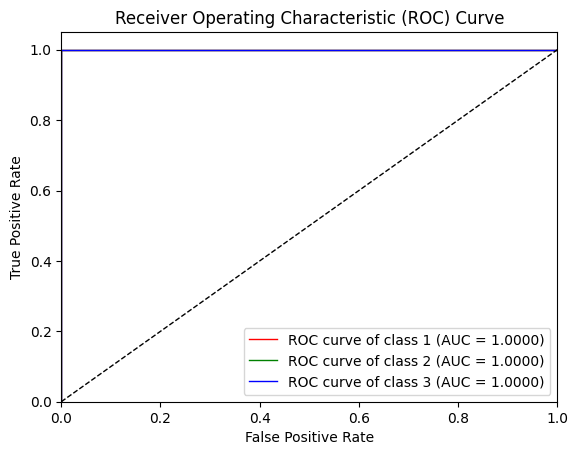

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.2613 - auc: 0.9904
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0498 - auc: 0.9990
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0300 - auc: 0.9995
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0178 - auc: 0.9995
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0134 - auc: 0.9995
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0115 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0108 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0099 - auc: 0.9996
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0103 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0096 - auc: 0.9995
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

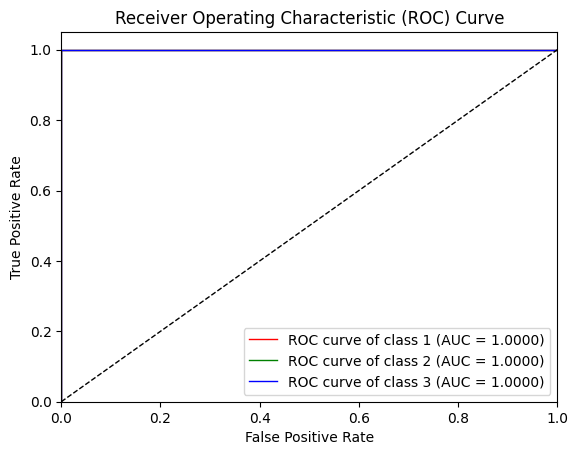

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.2058 - auc: 0.9945
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0408 - auc: 0.9993
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0254 - auc: 0.9995
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0171 - auc: 0.9994
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0135 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0120 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0110 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0104 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0103 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0098 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

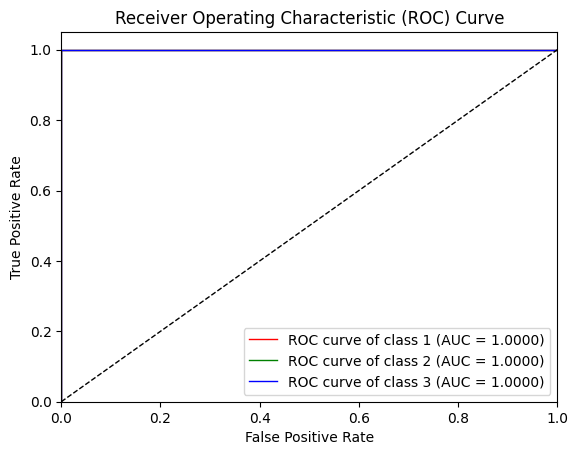

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.2017 - auc: 0.9937
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0451 - auc: 0.9993
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0367 - auc: 0.9994
Epoch 4/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0302 - auc: 0.9995
Epoch 5/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0241 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0192 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0158 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0136 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0119 - auc: 0.9995
Epoch 10/25
92/92 [==============================] - 1s 7ms/step - loss: 0.0113 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 1s 6ms/step - lo

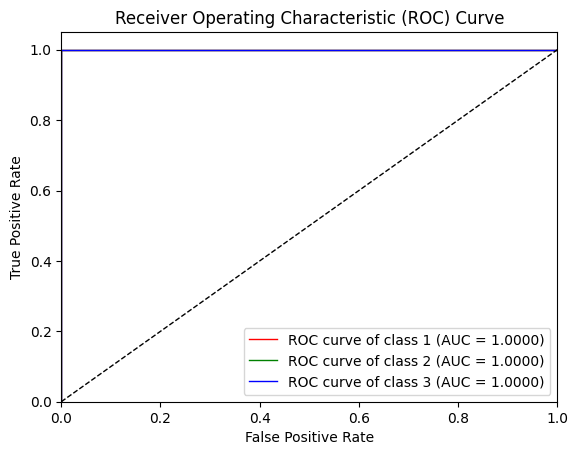

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.2237 - auc: 0.9967
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0326 - auc: 0.9999
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0164 - auc: 1.0000
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0092 - auc: 1.0000
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0055 - auc: 1.0000
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0037 - auc: 1.0000
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0026 - auc: 1.0000
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0021 - auc: 1.0000
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0015 - auc: 1.0000
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0013 - auc: 1.0000
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

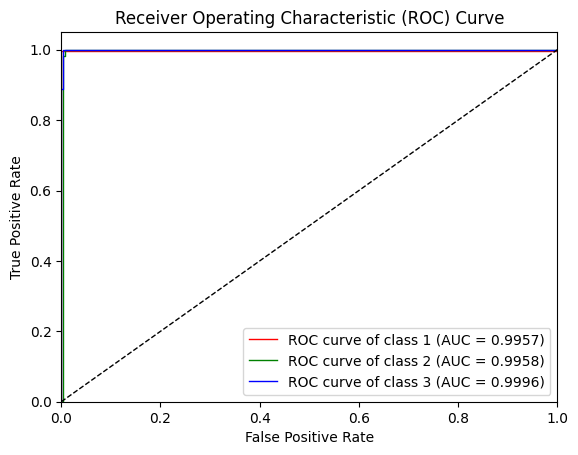

#########################################
Units: 18 Activation Function: relu AUC Média: 0.9995019153525222
#########################################
Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.6654 - auc: 0.9667
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.3560 - auc: 0.9921
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2349 - auc: 0.9960
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1814 - auc: 0.9963
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1518 - auc: 0.9963
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1313 - auc: 0.9969
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1151 - auc: 0.9990
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1012 - auc: 0.9989
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0890 - auc: 0.9990
Epoch 10/25
9

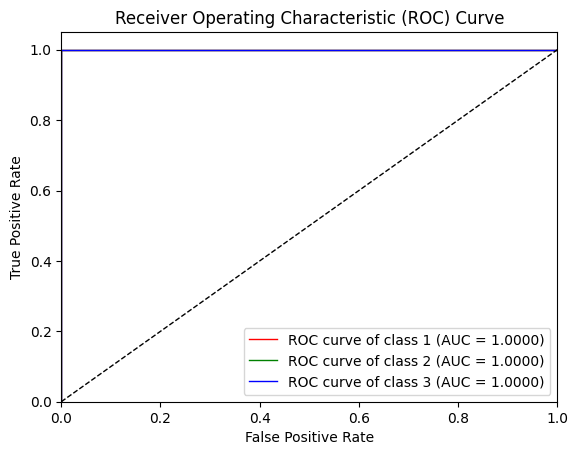

Epoch 1/25
92/92 [==============================] - 2s 6ms/step - loss: 0.8471 - auc: 0.8696
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.4442 - auc: 0.9841
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2979 - auc: 0.9962
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2265 - auc: 0.9963
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1827 - auc: 0.9966
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1531 - auc: 0.9990
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1317 - auc: 0.9990
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1154 - auc: 0.9990
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1025 - auc: 0.9989
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0920 - auc: 0.9989
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

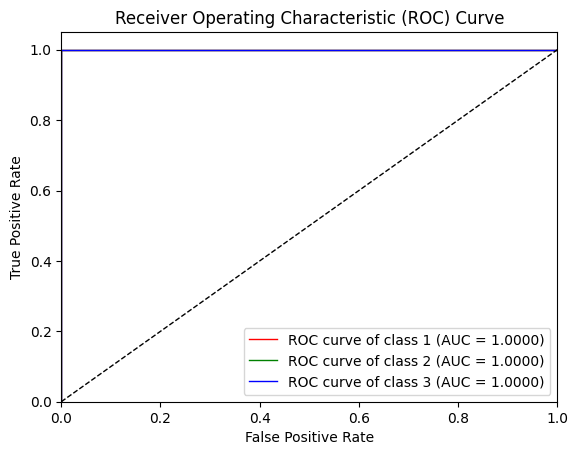

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.6608 - auc: 0.9344
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.4475 - auc: 0.9748
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.3384 - auc: 0.9767
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2567 - auc: 0.9957
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1974 - auc: 0.9988
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1557 - auc: 0.9995
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1265 - auc: 0.9995
Epoch 8/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1055 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0892 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0761 - auc: 0.9995
Epoch 11/25
92/92 [==============================] - 1s 6ms/step - lo

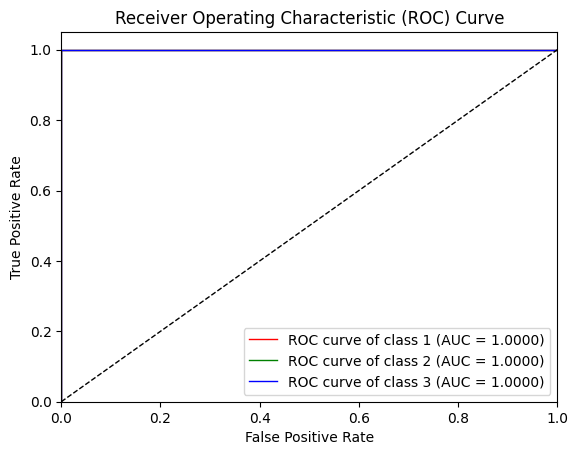

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.9987 - auc: 0.6871
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.5515 - auc: 0.9592
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.3738 - auc: 0.9947
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2708 - auc: 0.9977
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2017 - auc: 0.9990
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1588 - auc: 0.9990
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1309 - auc: 0.9989
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1114 - auc: 0.9990
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0972 - auc: 0.9990
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0860 - auc: 0.9991
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

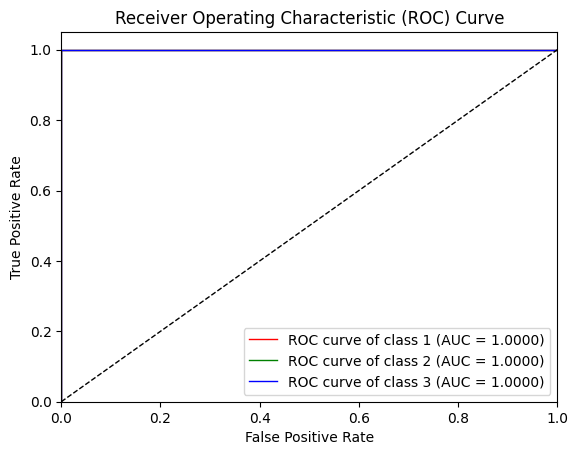

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.5159 - auc: 0.9693
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2738 - auc: 0.9953
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1937 - auc: 0.9961
Epoch 4/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1530 - auc: 0.9966
Epoch 5/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1265 - auc: 0.9989
Epoch 6/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1067 - auc: 0.9990
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0913 - auc: 0.9990
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0792 - auc: 0.9992
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0696 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0618 - auc: 0.9998
Epoch 11/25
92/92 [==============================] - 1s 6ms/step - lo

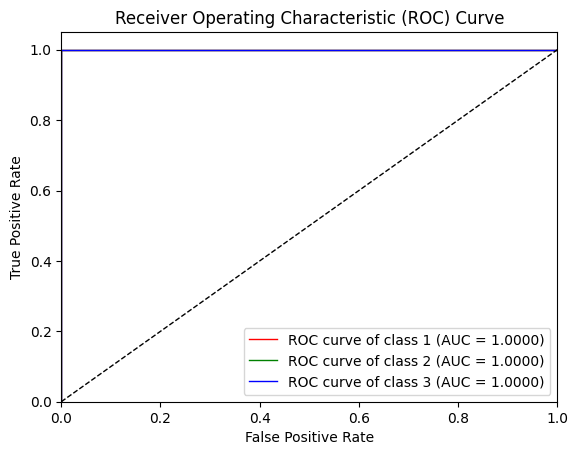

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.4910 - auc: 0.9638
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.3435 - auc: 0.9723
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2533 - auc: 0.9940
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1866 - auc: 0.9963
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1390 - auc: 0.9985
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1055 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0823 - auc: 0.9997
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0652 - auc: 1.0000
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0527 - auc: 1.0000
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0433 - auc: 1.0000
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

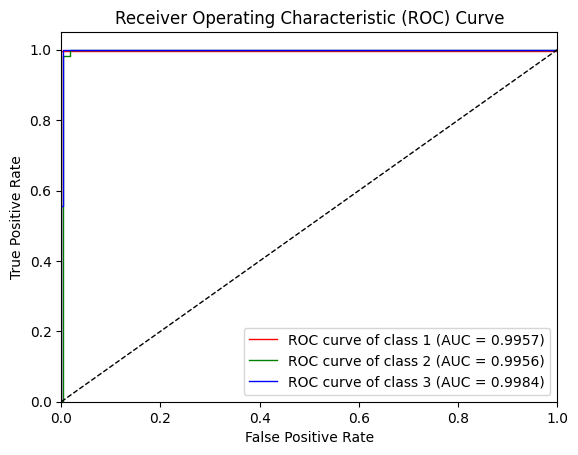

#########################################
Units: 18 Activation Function: sigmoid AUC Média: 0.999427974151156
#########################################
Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.2409 - auc: 0.9977
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0809 - auc: 0.9998
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0447 - auc: 0.9999
Epoch 4/25
92/92 [==============================] - 1s 11ms/step - loss: 0.0309 - auc: 0.9999
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0239 - auc: 0.9999
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0198 - auc: 0.9999
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0169 - auc: 0.9999
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0151 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0137 - auc: 0.9999
Epoch 10/2

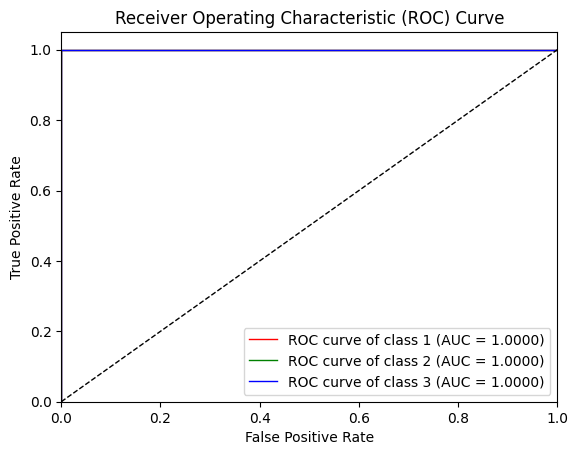

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.1584 - auc: 0.9973
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0473 - auc: 0.9998
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0273 - auc: 0.9998
Epoch 4/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0195 - auc: 0.9998
Epoch 5/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0157 - auc: 0.9998
Epoch 6/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0136 - auc: 0.9998
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0123 - auc: 0.9998
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0114 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0107 - auc: 0.9999
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0102 - auc: 0.9999
Epoch 11/25
92/92 [==============================] - 1s 6ms/step - lo

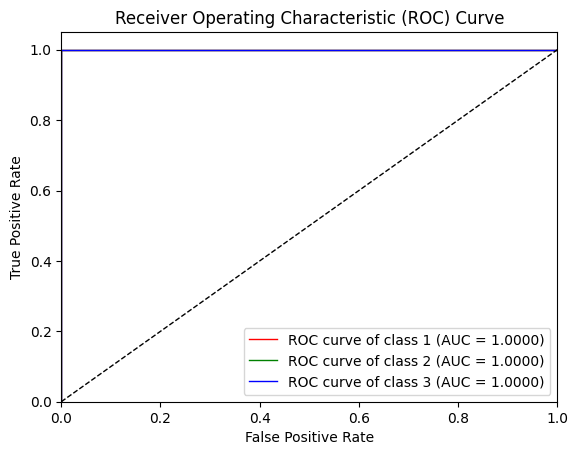

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.1959 - auc: 0.9963
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0552 - auc: 0.9999
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0333 - auc: 0.9998
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0242 - auc: 0.9998
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0194 - auc: 0.9999
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0165 - auc: 0.9999
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0146 - auc: 0.9999
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0132 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0123 - auc: 0.9999
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0119 - auc: 0.9999
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

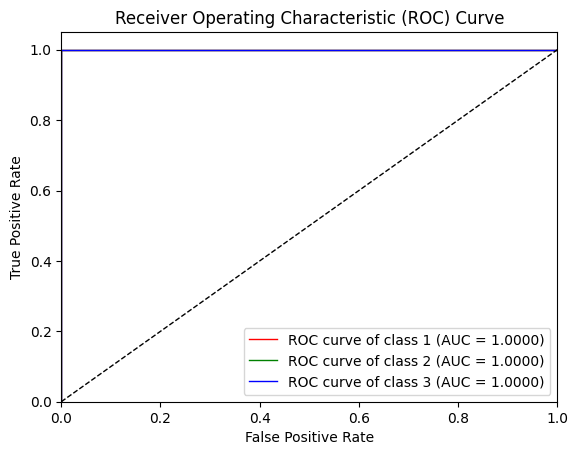

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.1883 - auc: 0.9959
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0554 - auc: 0.9998
Epoch 3/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0332 - auc: 0.9998
Epoch 4/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0238 - auc: 0.9998
Epoch 5/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0190 - auc: 0.9999
Epoch 6/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0163 - auc: 0.9998
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0143 - auc: 0.9998
Epoch 8/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0132 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0122 - auc: 0.9995
Epoch 10/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0117 - auc: 0.9995
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

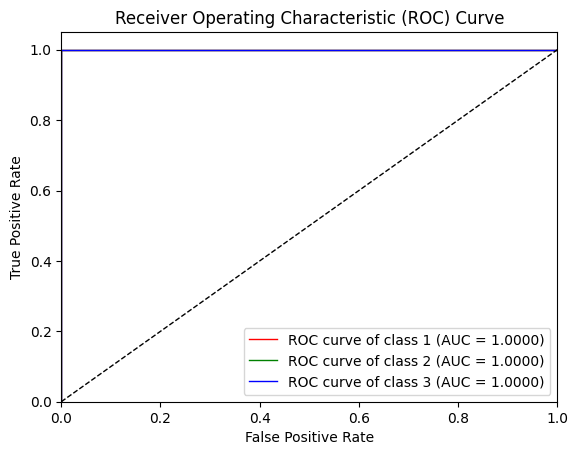

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.2415 - auc: 0.9966
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0687 - auc: 0.9997
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0393 - auc: 0.9997
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0276 - auc: 0.9996
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0218 - auc: 0.9997
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0186 - auc: 0.9995
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0166 - auc: 0.9996
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0147 - auc: 0.9996
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0136 - auc: 0.9996
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0130 - auc: 0.9996
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

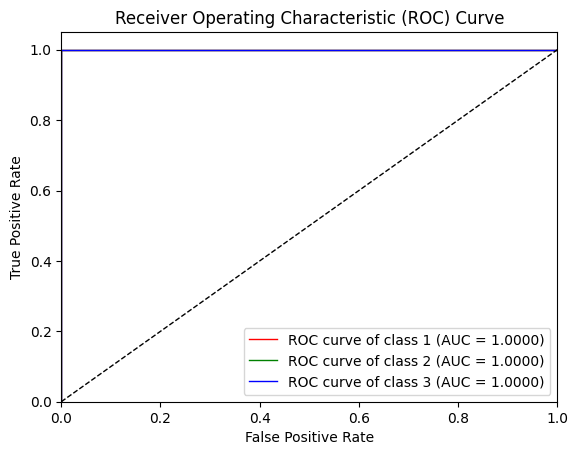

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.2060 - auc: 0.9959
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0619 - auc: 1.0000
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0379 - auc: 1.0000
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0259 - auc: 1.0000
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0192 - auc: 1.0000
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0144 - auc: 1.0000
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0115 - auc: 1.0000
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0092 - auc: 1.0000
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0076 - auc: 1.0000
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0062 - auc: 1.0000
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

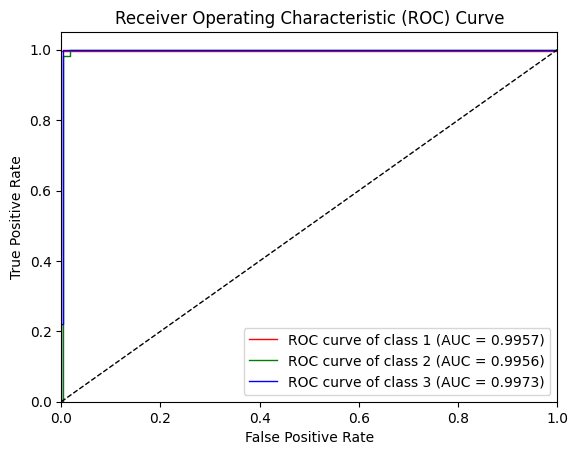

#########################################
Units: 18 Activation Function: tanh AUC Média: 0.9993627681000344
#########################################
Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.1909 - auc: 0.9936
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0419 - auc: 0.9994
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0308 - auc: 0.9995
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0216 - auc: 0.9994
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0154 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0127 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0116 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0108 - auc: 0.9995
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0108 - auc: 0.9994
Epoch 10/25
9

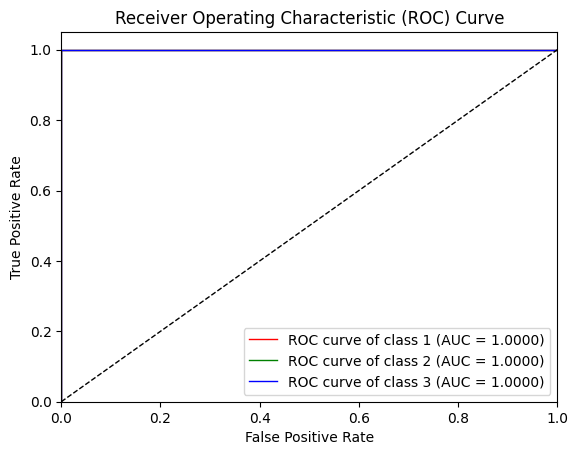

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.3164 - auc: 0.9839
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2158 - auc: 0.9995
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1941 - auc: 0.9997
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1724 - auc: 0.9998
Epoch 5/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1528 - auc: 0.9997
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1369 - auc: 0.9997
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1229 - auc: 0.9997
Epoch 8/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1115 - auc: 0.9997
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1016 - auc: 0.9997
Epoch 10/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0926 - auc: 0.9997
Epoch 11/25
92/92 [==============================] - 1s 6ms/step - lo

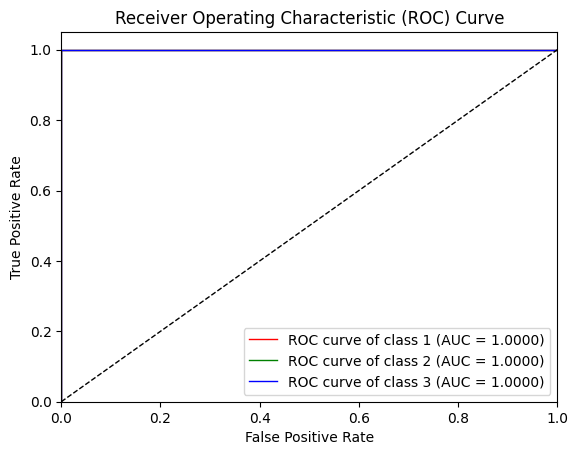

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.3141 - auc: 0.9850
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0409 - auc: 0.9992
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0254 - auc: 0.9995
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0185 - auc: 0.9994
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0148 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0132 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0117 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0112 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0108 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0104 - auc: 0.9995
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

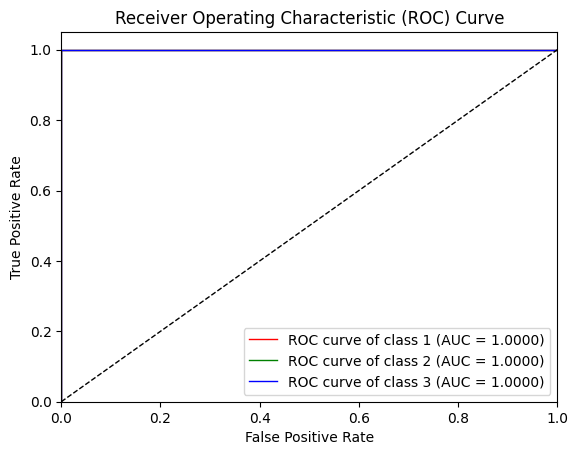

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.2390 - auc: 0.9955
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0330 - auc: 0.9998
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0256 - auc: 0.9994
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0205 - auc: 0.9994
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0169 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0149 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0135 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0126 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0121 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0114 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

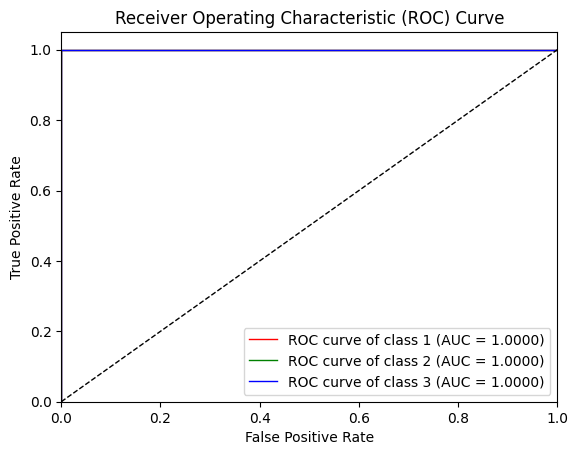

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.3602 - auc: 0.9713
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0804 - auc: 0.9978
Epoch 3/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0337 - auc: 0.9995
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0271 - auc: 0.9996
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0214 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0168 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0135 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0126 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0112 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0102 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

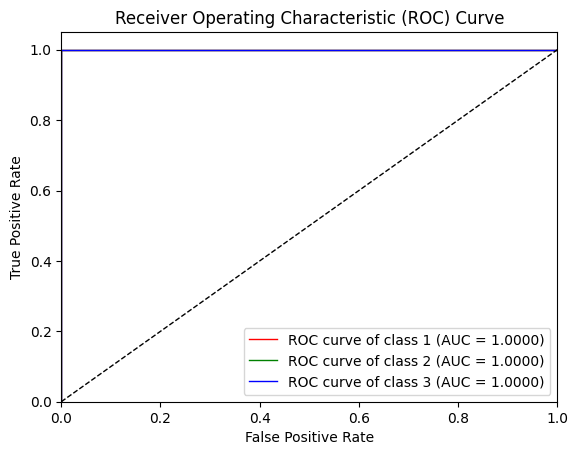

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.3306 - auc: 0.9876
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0488 - auc: 0.9995
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0405 - auc: 0.9995
Epoch 4/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0344 - auc: 0.9996
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0275 - auc: 0.9998
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0197 - auc: 1.0000
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0127 - auc: 1.0000
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0078 - auc: 1.0000
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0048 - auc: 1.0000
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0031 - auc: 1.0000
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

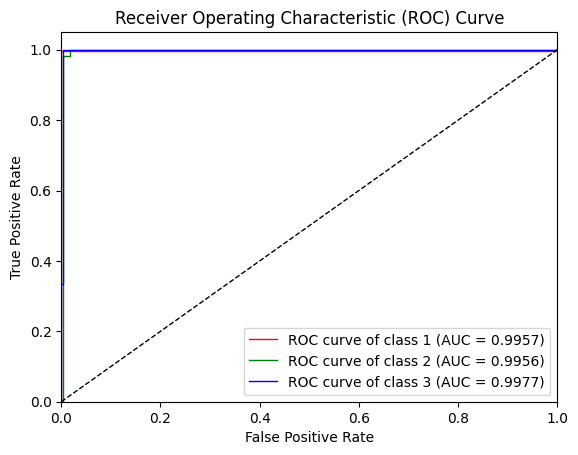

#########################################
Units: 16 Activation Function: relu AUC Média: 0.9993845034504084
#########################################
Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 1.2418 - auc: 0.4647
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.6619 - auc: 0.9983
Epoch 3/25
92/92 [==============================] - 1s 6ms/step - loss: 0.4565 - auc: 0.9990
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.3396 - auc: 0.9991
Epoch 5/25
92/92 [==============================] - 1s 6ms/step - loss: 0.2632 - auc: 0.9993
Epoch 6/25
92/92 [==============================] - 1s 6ms/step - loss: 0.2122 - auc: 0.9993
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1763 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1498 - auc: 0.9993
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1292 - auc: 0.9994
Epoch 10/25
9

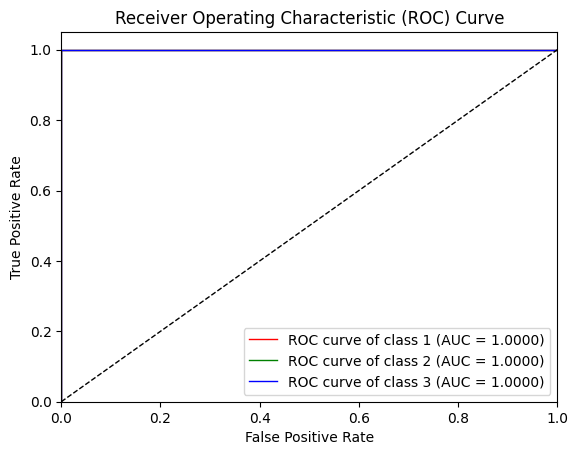

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.4507 - auc: 0.9700
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2990 - auc: 0.9762
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2192 - auc: 0.9937
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1695 - auc: 0.9962
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1388 - auc: 0.9970
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1175 - auc: 0.9990
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1009 - auc: 0.9991
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0878 - auc: 0.9991
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0779 - auc: 0.9993
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0701 - auc: 0.9993
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

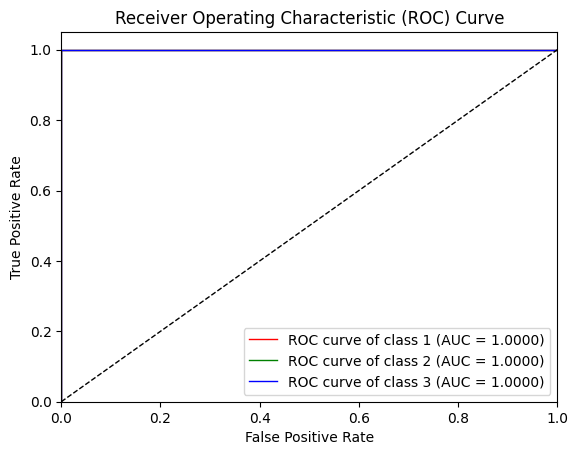

Epoch 1/25
92/92 [==============================] - 2s 6ms/step - loss: 0.6577 - auc: 0.9450
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.4644 - auc: 0.9671
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.3378 - auc: 0.9812
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2452 - auc: 0.9954
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1910 - auc: 0.9961
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1588 - auc: 0.9963
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1377 - auc: 0.9967
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1221 - auc: 0.9989
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1095 - auc: 0.9990
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0992 - auc: 0.9989
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

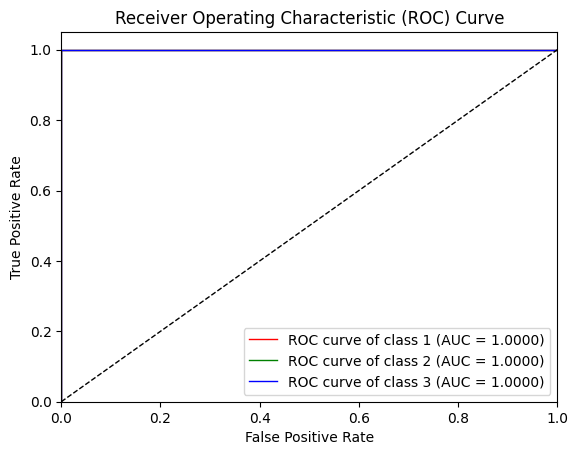

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.6967 - auc: 0.9696
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.4084 - auc: 0.9908
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2825 - auc: 0.9960
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2129 - auc: 0.9962
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1709 - auc: 0.9962
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1434 - auc: 0.9984
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1239 - auc: 0.9989
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1089 - auc: 0.9990
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0968 - auc: 0.9990
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0868 - auc: 0.9989
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

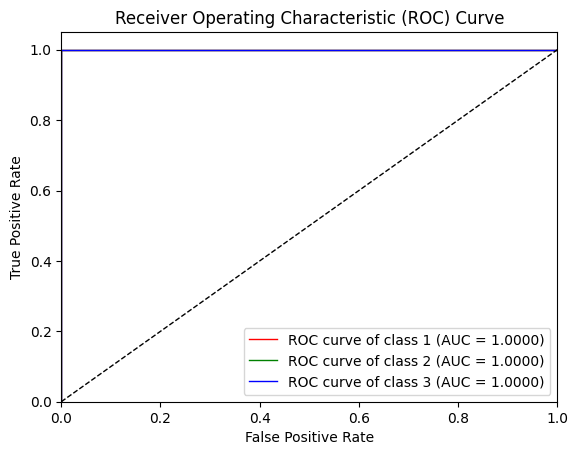

Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.7726 - auc: 0.9219
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.4205 - auc: 0.9782
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2865 - auc: 0.9921
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2208 - auc: 0.9961
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1804 - auc: 0.9962
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1522 - auc: 0.9962
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1314 - auc: 0.9988
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1151 - auc: 0.9989
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1021 - auc: 0.9990
Epoch 10/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0914 - auc: 0.9989
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

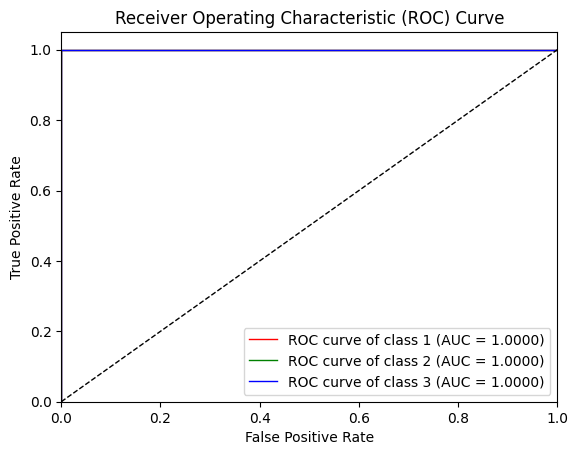

Epoch 1/25
92/92 [==============================] - 2s 6ms/step - loss: 0.7374 - auc: 0.9435
Epoch 2/25
92/92 [==============================] - 1s 6ms/step - loss: 0.3764 - auc: 0.9969
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2615 - auc: 0.9975
Epoch 4/25
92/92 [==============================] - 1s 6ms/step - loss: 0.2026 - auc: 0.9990
Epoch 5/25
92/92 [==============================] - 1s 5ms/step - loss: 0.1663 - auc: 0.9991
Epoch 6/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1404 - auc: 0.9991
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1208 - auc: 0.9992
Epoch 8/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1059 - auc: 0.9993
Epoch 9/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0943 - auc: 0.9995
Epoch 10/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0850 - auc: 0.9995
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

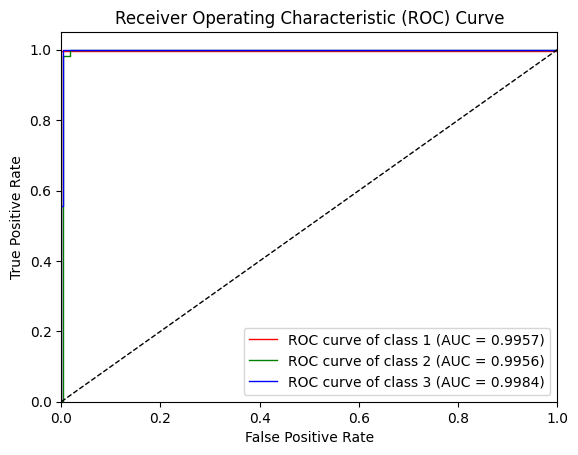

#########################################
Units: 16 Activation Function: sigmoid AUC Média: 0.999427974151156
#########################################
Epoch 1/25
92/92 [==============================] - 2s 4ms/step - loss: 0.2717 - auc: 0.9978
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1000 - auc: 1.0000
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0594 - auc: 0.9999
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0411 - auc: 0.9999
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0311 - auc: 0.9999
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0252 - auc: 0.9999
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0212 - auc: 0.9999
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0183 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0164 - auc: 0.9999
Epoch 10/25

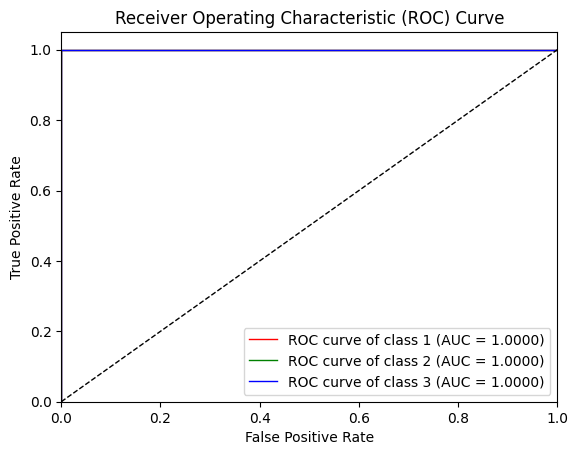

Epoch 1/25
92/92 [==============================] - 2s 6ms/step - loss: 0.2068 - auc: 0.9979
Epoch 2/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0618 - auc: 0.9998
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0386 - auc: 0.9999
Epoch 4/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0284 - auc: 0.9999
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0228 - auc: 0.9999
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0193 - auc: 0.9999
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0169 - auc: 0.9999
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0151 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0138 - auc: 0.9999
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0128 - auc: 0.9999
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

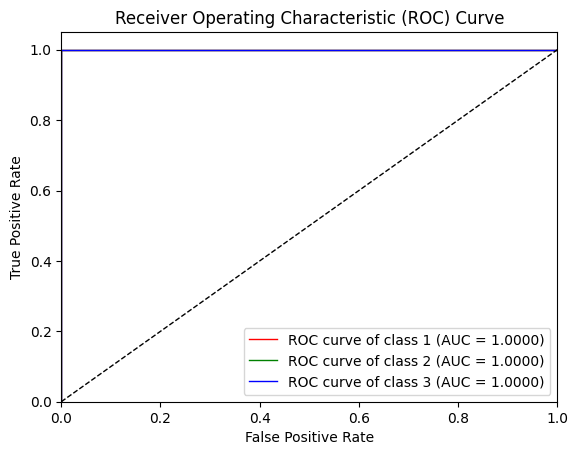

Epoch 1/25
92/92 [==============================] - 2s 6ms/step - loss: 0.2401 - auc: 0.9988
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0901 - auc: 0.9998
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0558 - auc: 0.9998
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0400 - auc: 0.9997
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0314 - auc: 0.9995
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0258 - auc: 0.9997
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0222 - auc: 0.9995
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0194 - auc: 0.9996
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0178 - auc: 0.9996
Epoch 10/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0163 - auc: 0.9996
Epoch 11/25
92/92 [==============================] - 1s 5ms/step - lo

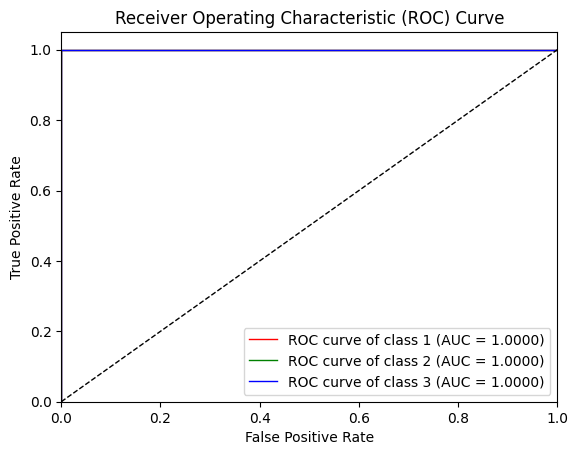

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.1810 - auc: 0.9961
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0594 - auc: 0.9993
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0392 - auc: 0.9993
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0297 - auc: 0.9994
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0242 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0207 - auc: 0.9995
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0183 - auc: 0.9995
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0168 - auc: 0.9995
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0154 - auc: 0.9996
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0143 - auc: 0.9996
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

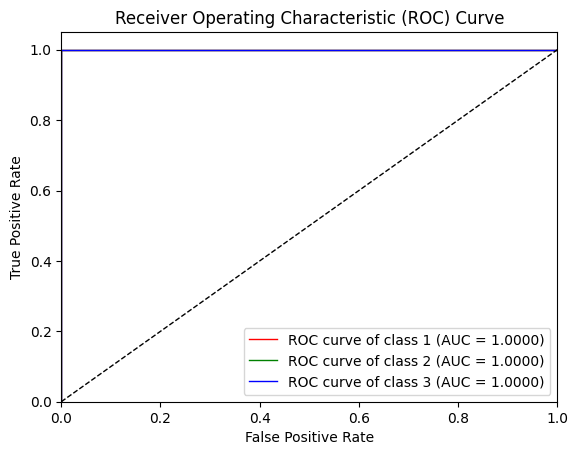

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.0955 - auc: 0.9988
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0322 - auc: 0.9996
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0207 - auc: 0.9995
Epoch 4/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0161 - auc: 0.9996
Epoch 5/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0138 - auc: 0.9996
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0125 - auc: 0.9996
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0115 - auc: 0.9996
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0111 - auc: 0.9996
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0107 - auc: 0.9996
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0104 - auc: 0.9996
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

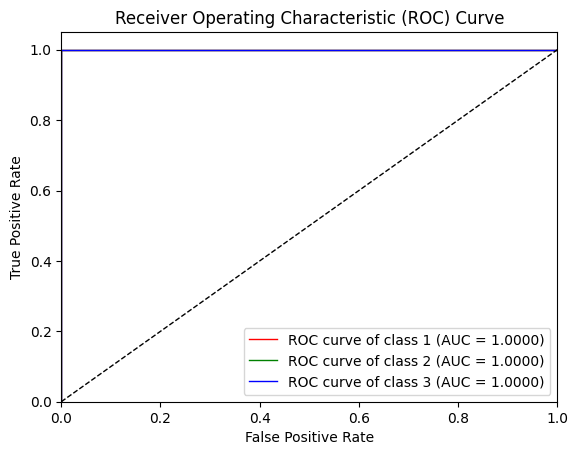

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.1567 - auc: 0.9975
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0480 - auc: 1.0000
Epoch 3/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0284 - auc: 1.0000
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0191 - auc: 1.0000
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0141 - auc: 1.0000
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0108 - auc: 1.0000
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0087 - auc: 1.0000
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0071 - auc: 1.0000
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0059 - auc: 1.0000
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0050 - auc: 1.0000
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

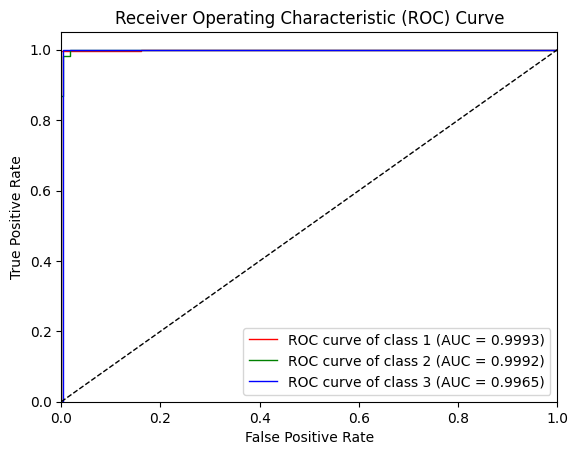

#########################################
Units: 16 Activation Function: tanh AUC Média: 0.9997219157340415
#########################################
Epoch 1/25
92/92 [==============================] - 3s 6ms/step - loss: 0.8620 - auc: 0.8059
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2976 - auc: 0.9935
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0517 - auc: 0.9988
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0376 - auc: 0.9993
Epoch 5/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0295 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0233 - auc: 0.9996
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0190 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0158 - auc: 0.9995
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0138 - auc: 0.9995
Epoch 10/25
9

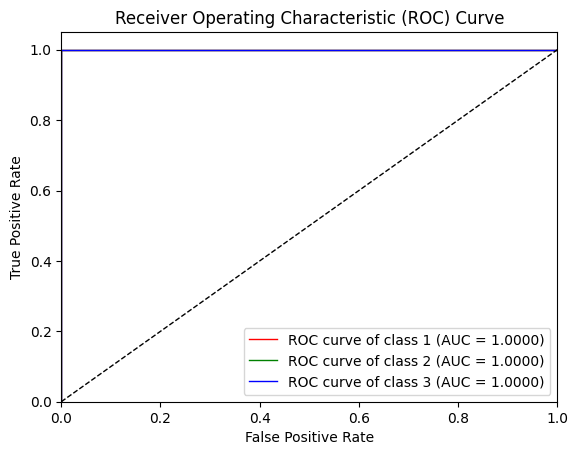

Epoch 1/25
92/92 [==============================] - 2s 6ms/step - loss: 0.3155 - auc: 0.9837
Epoch 2/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0813 - auc: 0.9991
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0439 - auc: 0.9991
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0374 - auc: 0.9991
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0340 - auc: 0.9991
Epoch 6/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0312 - auc: 0.9993
Epoch 7/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0282 - auc: 0.9995
Epoch 8/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0252 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0221 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0192 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

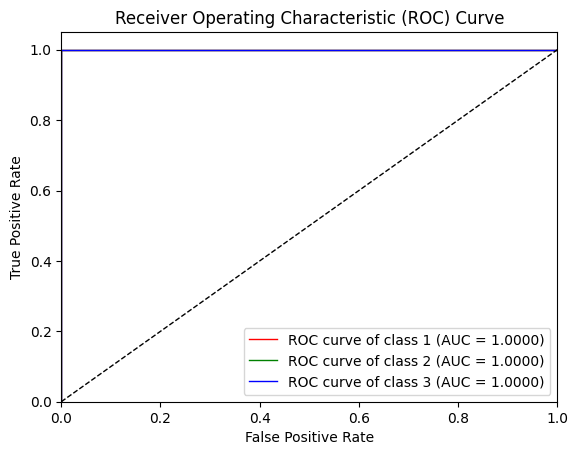

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.4836 - auc: 0.9808
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0825 - auc: 0.9988
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0504 - auc: 0.9987
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0400 - auc: 0.9992
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0324 - auc: 0.9995
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0259 - auc: 0.9995
Epoch 7/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0203 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0161 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0135 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0120 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

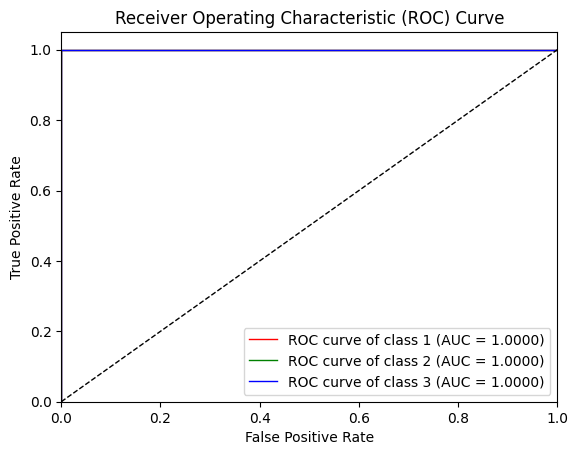

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.1401 - auc: 0.9972
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0416 - auc: 0.9992
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0354 - auc: 0.9993
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0315 - auc: 0.9994
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0274 - auc: 0.9994
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0232 - auc: 0.9994
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0183 - auc: 0.9994
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0155 - auc: 0.9994
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0134 - auc: 0.9994
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0124 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

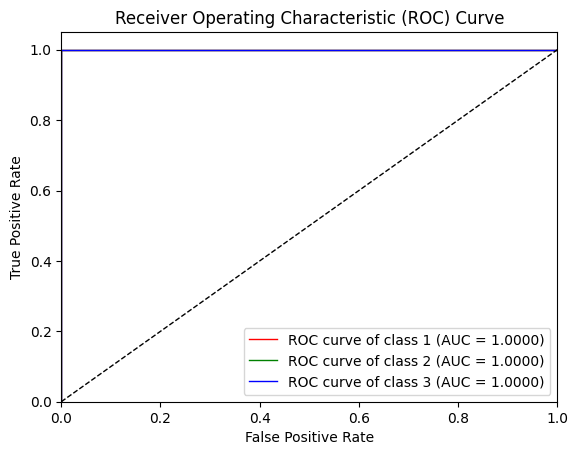

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.8912 - auc: 0.9079
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.7189 - auc: 0.9974
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.5836 - auc: 0.9979
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.4545 - auc: 0.9982
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.3422 - auc: 0.9982
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2536 - auc: 0.9982
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1883 - auc: 0.9982
Epoch 8/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1423 - auc: 0.9982
Epoch 9/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1096 - auc: 0.9982
Epoch 10/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0869 - auc: 0.9982
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

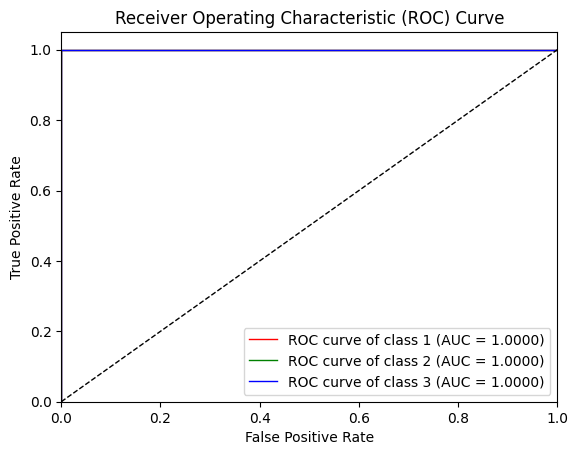

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.1056 - auc: 0.9993
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0239 - auc: 1.0000
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0131 - auc: 1.0000
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0067 - auc: 1.0000
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0040 - auc: 1.0000
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0025 - auc: 1.0000
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0018 - auc: 1.0000
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0014 - auc: 1.0000
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0010 - auc: 1.0000
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 7.6451e-04 - auc: 1.0000
Epoch 11/25
92/92 [==============================] - 0s 5ms/step 

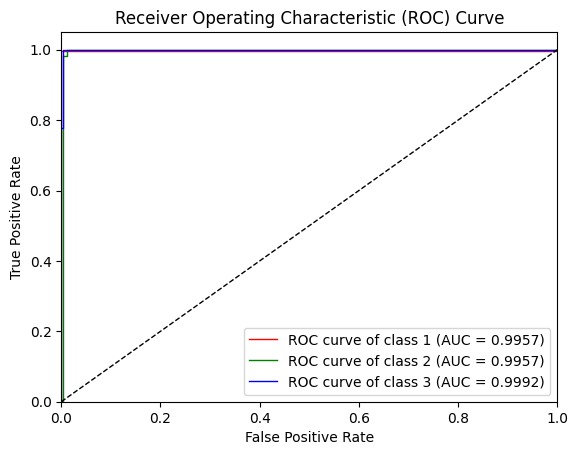

#########################################
Units: 14 Activation Function: relu AUC Média: 0.999475812427026
#########################################
Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.5345 - auc: 0.9679
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.3208 - auc: 0.9905
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2311 - auc: 0.9956
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1793 - auc: 0.9963
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1485 - auc: 0.9971
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1286 - auc: 0.9990
Epoch 7/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1144 - auc: 0.9990
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1035 - auc: 0.9990
Epoch 9/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0946 - auc: 0.9990
Epoch 10/25
92

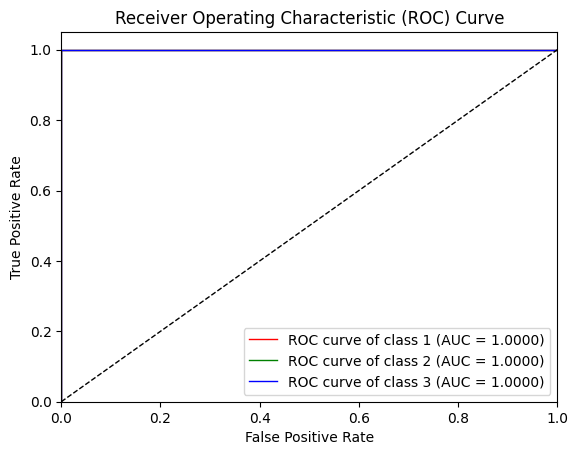

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.5893 - auc: 0.9351
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.3978 - auc: 0.9735
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.3132 - auc: 0.9753
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.2439 - auc: 0.9948
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1874 - auc: 0.9965
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1481 - auc: 0.9990
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1227 - auc: 0.9990
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1049 - auc: 0.9991
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0909 - auc: 0.9992
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0796 - auc: 0.9994
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

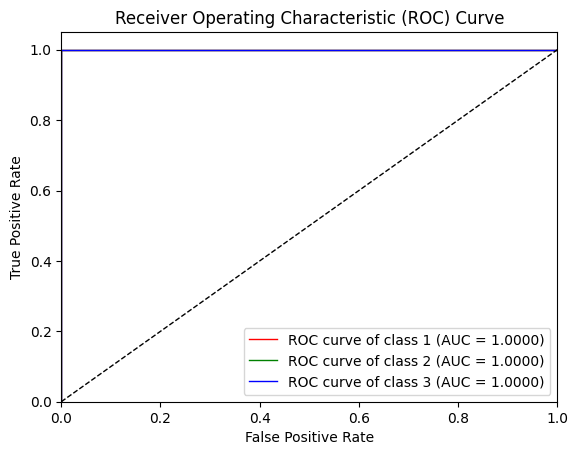

Epoch 1/25
92/92 [==============================] - 3s 6ms/step - loss: 0.6197 - auc: 0.9587
Epoch 2/25
92/92 [==============================] - 1s 5ms/step - loss: 0.3813 - auc: 0.9854
Epoch 3/25
92/92 [==============================] - 1s 5ms/step - loss: 0.2700 - auc: 0.9933
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2065 - auc: 0.9943
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1698 - auc: 0.9966
Epoch 6/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1472 - auc: 0.9988
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1320 - auc: 0.9989
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1207 - auc: 0.9990
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1117 - auc: 0.9990
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1043 - auc: 0.9991
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

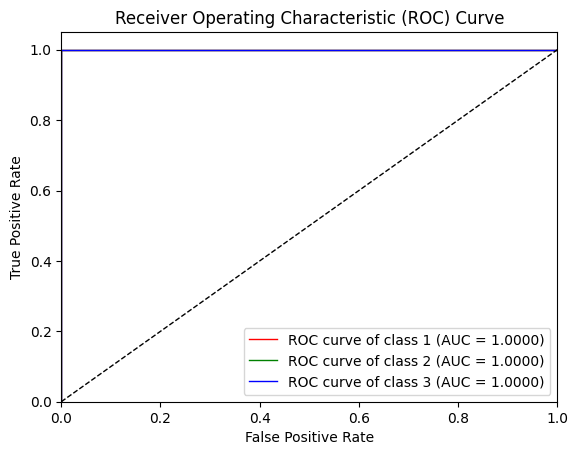

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.5811 - auc: 0.9683
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.3311 - auc: 0.9939
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2327 - auc: 0.9960
Epoch 4/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1808 - auc: 0.9972
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1506 - auc: 0.9989
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1312 - auc: 0.9989
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1179 - auc: 0.9989
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1079 - auc: 0.9989
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.1000 - auc: 0.9989
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0933 - auc: 0.9990
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

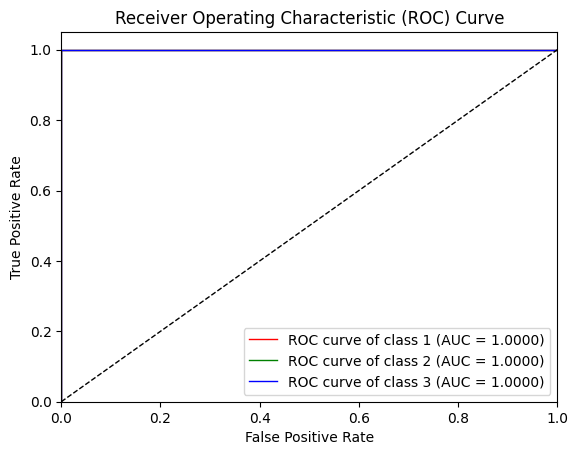

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.6288 - auc: 0.9540
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.3582 - auc: 0.9829
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2543 - auc: 0.9950
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1945 - auc: 0.9962
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1565 - auc: 0.9973
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1308 - auc: 0.9989
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1123 - auc: 0.9990
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0984 - auc: 0.9990
Epoch 9/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0874 - auc: 0.9990
Epoch 10/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0784 - auc: 0.9989
Epoch 11/25
92/92 [==============================] - 0s 4ms/step - lo

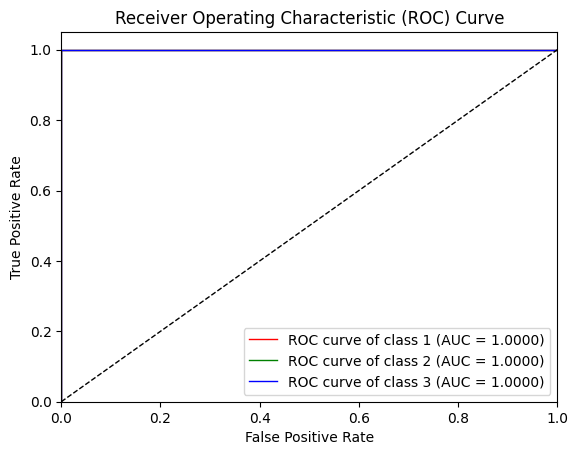

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.6342 - auc: 0.9130
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.4326 - auc: 0.9757
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.3419 - auc: 0.9759
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2742 - auc: 0.9888
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.2182 - auc: 0.9961
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1756 - auc: 0.9963
Epoch 7/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1445 - auc: 0.9970
Epoch 8/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1219 - auc: 0.9990
Epoch 9/25
92/92 [==============================] - 1s 6ms/step - loss: 0.1043 - auc: 0.9991
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0904 - auc: 0.9991
Epoch 11/25
92/92 [==============================] - 1s 6ms/step - lo

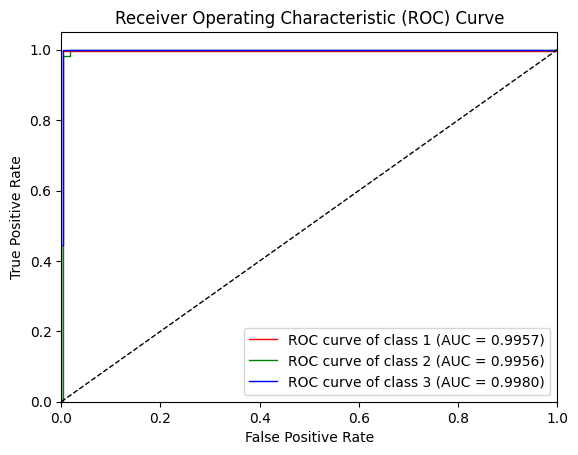

#########################################
Units: 14 Activation Function: sigmoid AUC Média: 0.9994062388007822
#########################################
Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.3261 - auc: 0.9936
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0955 - auc: 0.9994
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0539 - auc: 0.9997
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0377 - auc: 0.9999
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0291 - auc: 0.9999
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0241 - auc: 0.9999
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0209 - auc: 0.9999
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0184 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0165 - auc: 0.9998
Epoch 10/2

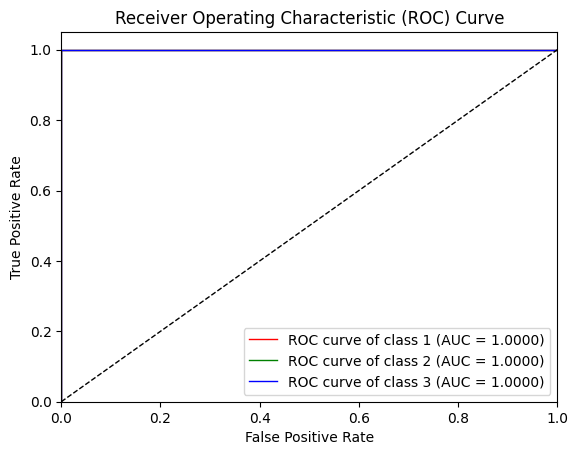

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.1819 - auc: 0.9976
Epoch 2/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0720 - auc: 0.9994
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0463 - auc: 0.9996
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0329 - auc: 0.9998
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0253 - auc: 0.9999
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0207 - auc: 0.9998
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0177 - auc: 0.9998
Epoch 8/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0156 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0141 - auc: 0.9999
Epoch 10/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0131 - auc: 0.9999
Epoch 11/25
92/92 [==============================] - 1s 6ms/step - lo

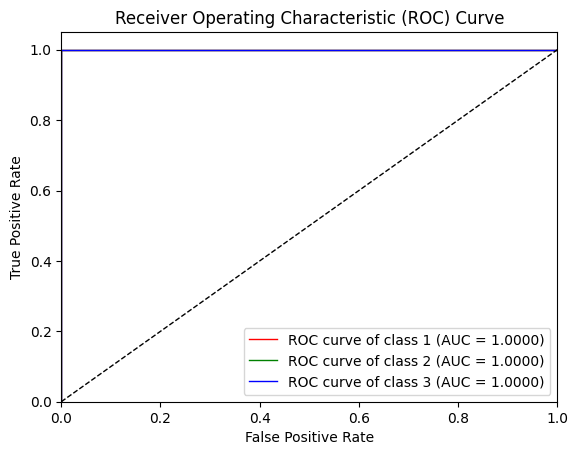

Epoch 1/25
92/92 [==============================] - 2s 6ms/step - loss: 0.3296 - auc: 0.9799
Epoch 2/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0842 - auc: 0.9996
Epoch 3/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0551 - auc: 0.9999
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0399 - auc: 0.9998
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0311 - auc: 0.9998
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0256 - auc: 0.9998
Epoch 7/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0218 - auc: 0.9999
Epoch 8/25
92/92 [==============================] - 1s 5ms/step - loss: 0.0192 - auc: 0.9998
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0172 - auc: 0.9998
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0157 - auc: 0.9998
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

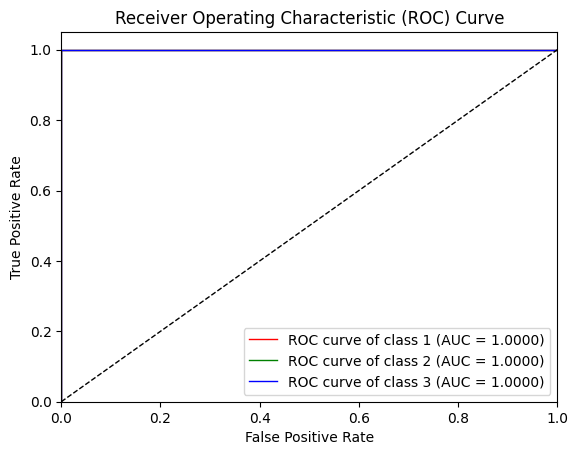

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.4281 - auc: 0.9885
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.1542 - auc: 1.0000
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0883 - auc: 0.9998
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0606 - auc: 0.9998
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0456 - auc: 0.9998
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0363 - auc: 0.9998
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0302 - auc: 0.9998
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0259 - auc: 0.9999
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0227 - auc: 0.9998
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0204 - auc: 0.9999
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

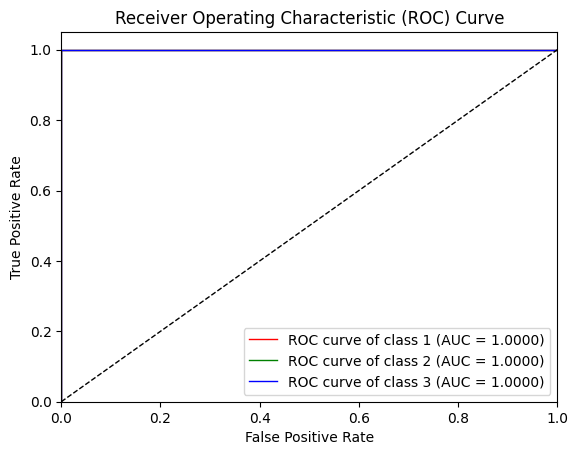

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.2283 - auc: 0.9979
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0903 - auc: 0.9998
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0577 - auc: 0.9998
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0416 - auc: 0.9999
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0317 - auc: 0.9996
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0255 - auc: 0.9998
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0214 - auc: 0.9998
Epoch 8/25
92/92 [==============================] - 0s 4ms/step - loss: 0.0186 - auc: 0.9998
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0165 - auc: 0.9998
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0149 - auc: 0.9998
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

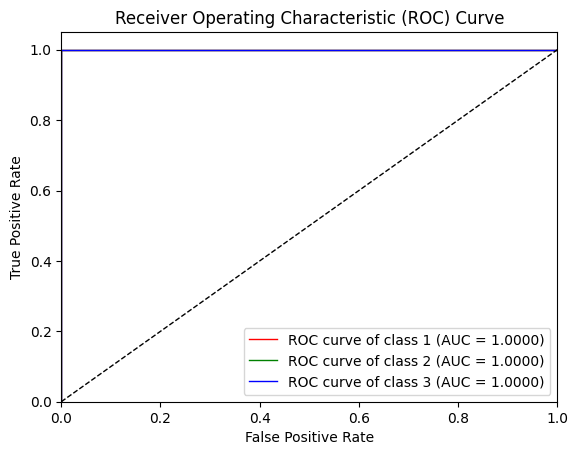

Epoch 1/25
92/92 [==============================] - 2s 5ms/step - loss: 0.2076 - auc: 0.9985
Epoch 2/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0723 - auc: 1.0000
Epoch 3/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0419 - auc: 1.0000
Epoch 4/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0274 - auc: 1.0000
Epoch 5/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0197 - auc: 1.0000
Epoch 6/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0149 - auc: 1.0000
Epoch 7/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0118 - auc: 1.0000
Epoch 8/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0094 - auc: 1.0000
Epoch 9/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0080 - auc: 1.0000
Epoch 10/25
92/92 [==============================] - 0s 5ms/step - loss: 0.0067 - auc: 1.0000
Epoch 11/25
92/92 [==============================] - 0s 5ms/step - lo

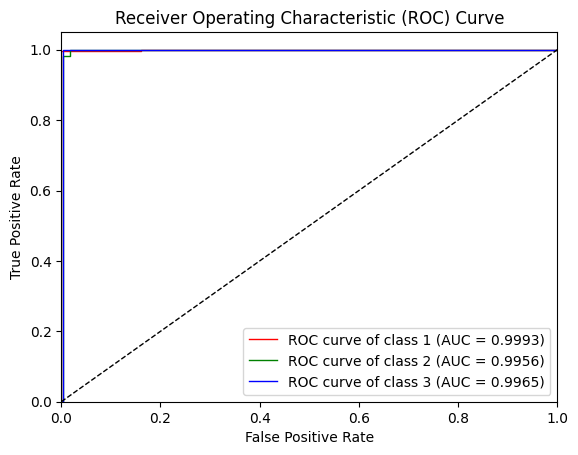

#########################################
Units: 14 Activation Function: tanh AUC Média: 0.9995210072784161
#########################################


In [ ]:
dados = X
rotulos = y
# Definir o número de folds para a validação cruzada
k = 6

lw = 1

# inicializar a lista para armazenar os tempos de treinamento
training_times = []

Probabilidades = []
Agrega_Resultado = []

# Criar o objeto para realizar a validação cruzada k-fold estratificado
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

#Parametros de Busca
activation_funcs = [relu, sigmoid, tanh]
units_list = [20, 18, 16, 14]

# Loop para treinar e avaliar o modelo em cada fold
for units in units_list:
    for activation_func in activation_funcs:
        for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):

            # Separar os dados em treino e teste para o fold atual
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # converte rótulos para formato one-hot encoding
            y_train = to_categorical(y_train, num_classes=3)
            y_test = to_categorical(y_test, num_classes=3)

            model = []
            del model

            #Construção do modelo
            model = Sequential()
            model.add(Dense(units=units, input_dim=400, activation=activation_func))
            model.add(Dense(units=units/2, activation=activation_func))
            model.add(Dense(units=3, activation='softmax'))

            # Compilar o modelo
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['AUC'])

            # armazenar o tempo de início do treinamento
            start_time = time.time()

            # Treinar o modelo com os dados de treino do fold atual
            model.fit(X_train, y_train, batch_size=16, epochs=25)

            # armazenar o tempo de fim do treinamento
            end_time = time.time()

            # calcular o tempo de treinamento em segundos
            training_time = end_time - start_time

            # armazenar o tempo de treinamento na lista
            training_times.append(training_time)

            y_proba = model.predict(X_test)

            Probabilidades.append(y_proba)

            # Converter previsões em classes
            y_pred_classes = np.argmax(y_proba, axis=1)

            # Converter rótulos de teste em classes
            y_true = np.argmax(y_test, axis=1)
            y_true_treino = np.argmax(y_train, axis=1)
            cm = confusion_matrix(y_true, y_pred_classes)

            print(f"Fold {fold_idx + 1}: {len(X_train)} Amostras de Treino ({len(np.where(y_true_treino == 0)[0])} Arritimia (1), {len(np.where(y_true_treino == 1)[0])} Arritimia (2), {len(np.where(y_true_treino == 2)[0])} Arritimia (3) e {len(np.where(y_true_treino == 3)[0])} Arritimia (4))")
            print(f"Fold {fold_idx + 1}: {len(X_test)} Amostras de Teste ({len(np.where(y_true == 0)[0])} Arritimia (1), {len(np.where(y_true == 1)[0])} Arritimia (2), {len(np.where(y_true == 2)[0])} Arritimia (3) e {len(np.where(y_true == 3)[0])} Arritimia (4))")

            # Exibir informações sobre os dados de treino e teste do fold atual
            print(f"Fold {fold_idx + 1}: Tempo Treinamento = {training_time:.4f}")
            print("______________")
            print(f"Fold {fold_idx + 1} - Matriz de Confusão")
            print(cm)
            print("______________")

            n_classes = y_test.shape[1]
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            AUC_M = []
            for i in range(n_classes):
              fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_proba[:, i])

              roc_auc[i] = auc(fpr[i], tpr[i])
              print(f"Fold {fold_idx + 1}: AUC classe {i+1} = {roc_auc[i]:.4f}")
              AUC_M.append(roc_auc[i])

            mean_auc = np.mean(AUC_M)
            print(f"Fold {fold_idx + 1}: AUC Média = {mean_auc:.4f}")
            print("______________")

            Agrega_Resultado.append(mean_auc)

            # plotar as curvas ROC
            plt.figure()
            colors = ['red', 'green', 'blue', 'orange']
            for i, color in zip(range(n_classes), colors):
              plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                      label='ROC curve of class {0} (AUC = {1:0.4f})'
                    ''.format(i+1, roc_auc[i]))
            plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

        Res_Fold_Médio = np.mean(Agrega_Resultado)
        Agrega_Resultado = []
        # Resultado
        print('#########################################')
        print('Units:', units, 'Activation Function:', activation_func.__name__, 'AUC Média:', Res_Fold_Médio)
        print('#########################################')


        # Redireciona a saída de impressão para a saída padrão novamente

# E N T R E N A M I E N T O

In [ ]:
#np.random.seed(23)

dim_entrada = X_train.shape[1]
entrada = Input(shape=(dim_entrada,))
print(X_train.shape[1])

x = Dense(20, activation='relu')(entrada)
#x = Dense(20, activation='relu', kernel_regularizer=l2(0.005))(entrada)
# x = Dropout(0.25)(x)
# x = Dense(100, activation='relu')(x)
# x = Dropout(0.5)(x)
saida = Dense(3, activation='softmax')(x)

clasificador = Model(inputs=entrada, outputs=saida)
clasificador.summary()

400
Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 400)]             0         
                                                                 
 dense_20 (Dense)            (None, 20)                8020      
                                                                 
 dense_21 (Dense)            (None, 3)                 63        
                                                                 
Total params: 8083 (31.57 KB)
Trainable params: 8083 (31.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Implementando Validación Cruzada Estratificada y Clasificación

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

Definimos la configuracipon de Validacipon Cruzada estratificada y luego el modelo de clasificación:

A continuación se vuelve a concatenar los set de train y test para aplicar la Validación Cruzada Estratificada

Creando un vector y con la información de las etiquetas de la forma one-hot

**Aplicando la curva ROC:**

StratifiedShuffleSplit(n_splits=6, random_state=True, test_size=None,
            train_size=None)
TRAIN: [ 805  833  969 ... 1660 1132  896] TEST: [1137 1221 1553  830   93 1677  336 1217 1625  193  184  743  423  203
  585  623  156  210  590 1054  348  706  615  754  688 1696  888  931
  789 1267 1078 1697  924  591 1600  353 1271  951 1177  964  886 1574
 1314  406  970  227  178 1757  340 1682  317  631 1004 1311 1514  642
 1545 1119  475  918  898  234  678 1348  401  647  611  161  788  644
  814  331 1566   18  840 1639 1127 1719 1548  305 1587 1099  874  795
  949   23  175 1236 1724  339  777  108 1667  792 1411  415 1658 1215
 1334  416 1162  991  506 1693  260  513  354  783  187  947  543 1359
  101  769 1393  116  316  216 1652  242 1392  775 1410  733  714 1145
  577 1744 1570  128 1464  504 1626  708 1659  454  664 1384  553 1473
  160 1076 1404 1331  635  402 1482 1656 1396 1638  295 1146 1700 1242
 1422  766 1635 1465 1106  397  259 1154  727 1009 1628 1182 1494 1320


TRAIN: [1079 1188 1114 ... 1415  403 1463] TEST: [1364 1453 1264   30  334  913  782 1054  292  858  289 1220 1504 1369
  328 1616 1471  170 1344  281  867  154 1057 1346    8  247 1305 1331
 1588  733  732 1160 1001  624  701   97 1103 1206  290  822 1662   42
 1173  163 1431 1711  538  715 1460  532  462  507  758 1189 1715  601
  993  482  517 1242 1438 1398 1383 1113  432  445  908 1033 1111  793
  213  173  230  915 1316   87  381   86 1097 1354  494  669  606 1470
 1284  411  580 1262  875  115 1758  584 1632   68  314 1481  783 1357
  764  502  625  318  466  772  480  527 1603  829  377  965  763  923
  547  322  964 1549  869 1752 1407  268  735 1686 1512  577  713 1612
  844  128  998 1575 1680  716  944 1410  180  455  983  572 1307 1147
 1691  199  613 1035 1714 1759   41 1745  476   25 1451  903  107 1200
  890 1518  616 1649  891  904 1269 1030  976 1060 1110  686  161 1016
 1397  343 1517  428   65 1399 1434  936 1396]
Epoch 1/25
106/106 [==============================] 

TRAIN: [1405 1454  110 ...  899  198  389] TEST: [ 108  510  879  539   48  595 1265  695 1339 1761  421  581  684 1223
 1485  885  955  578 1326 1463  522  884 1243 1245 1656 1386 1180 1324
  769 1447  912  624 1473 1039  810 1149  824  405 1126 1588 1420 1686
  390  211 1527 1706 1347   66  630  202  403  838  105 1421  272  368
 1486  861  553 1544 1688 1001  863  254 1562  704  229 1404  732  192
 1528  615 1501  255  835 1287 1517  517  431 1498  237  736  289    5
  246 1490  114  148 1348  309 1015 1707  990 1284  162 1068  699 1262
 1589  538 1424  195 1070 1641 1552 1468  177 1530  827 1367 1537 1670
   28   73 1289 1354  353  164  450 1192  898 1423  887  569  166  978
 1586  151  490  762  811  752 1658 1372 1616 1561  829 1704  805  888
 1094 1679 1134 1230  640  354 1680  493  842  996 1406 1316 1228 1753
   25  352 1382 1026 1148 1065 1038 1100  129  111  334  563 1662    2
  157  543  149  780 1440   81  216 1555 1518]
Epoch 1/25
106/106 [==============================] 

TRAIN: [1073  356  825 ...  579  655 1437] TEST: [ 395   80  294  896 1125  404    1  272  724  813 1020 1560   69  598
  283 1014  361 1618 1751 1592 1571  695  676  675  244 1590 1287 1429
 1405 1289 1619  635 1065  198  561   77  257  819  959 1507  483 1085
  310  610   81 1057 1145 1404  881 1373  609   21  264 1154 1102  529
  687  506   74 1669  518 1089  580  141  156 1529  637  426  754 1761
  697 1136 1346  728  249 1026 1378  991 1351 1757 1481  236 1583 1742
  954  829  101  382 1377 1308 1202 1252   89 1359  770  613 1426  703
  340  909  648  522 1574  196   29 1411  190  307 1513  708  476 1288
  751  722  796 1617 1420  421 1449  906 1178  260  662  667 1726  712
  411  569 1749  174 1651  545  900 1532 1110 1407  524  498 1543 1353
  842 1461 1186  521 1277 1261 1043 1533 1381  456 1247 1233 1322  853
  450 1297 1478  701  157 1084  309 1185 1347 1655  379  885 1091 1682
  775 1127  214  891   32 1111 1554  599   16]
Epoch 1/25
106/106 [==============================] 

TRAIN: [ 885  269 1114 ...  221 1047   96] TEST: [1616  848 1171 1566  783 1704  260  414  446 1549  782 1473  879 1139
 1681 1395  158 1712  707 1613  597 1686  865 1663  526  501   35  340
 1750 1368  318 1542  228  513  532 1282  864  858 1607 1563 1036 1013
  220  279 1208 1196  683 1675 1272 1370 1552  232  344  277  374  266
  706  731 1012  627  675 1095  906  115 1508   70 1423  103 1710 1145
 1689 1415   23 1680 1422 1453  465   21 1003  672  977 1348  324  437
 1237   73 1382  659 1126  139 1520  112  186  984  826  237 1291  800
  666 1333 1052  311  548   13  382  354 1540  468 1631  472 1157 1480
  789  493  452  224  669 1010 1351  485 1004 1172  214  320 1205  180
  696  859 1472 1289  411  223 1492   45  618  825 1548 1664  651 1074
  910  716  808   72  661 1048 1662  546  487  950  698  624 1344  538
 1323   63 1608 1343 1211  297  381  978  568 1586  303  674  565  820
 1076  241  751  689  504 1101  519  418  246]
Epoch 1/25
106/106 [==============================] 

TRAIN: [1116 1339  960 ... 1753  647 1692] TEST: [ 332  508 1343 1440 1501 1101  704  846 1039  939  722 1468 1086  130
 1183 1035 1102 1323  391  563  875  767  366  611 1457 1154  435  546
  974  894  536 1378 1515 1584 1299  668  463  353  497  121  967   53
 1211  619  768 1723 1628  172 1232 1592 1649  154  537 1712 1683  496
  562  445 1751  298 1525  534 1164  334  982 1087  462  798  998  714
  311  386 1334  991  956 1166 1635 1451 1530 1222 1044  574 1443  433
 1296 1212 1545 1542  300 1286 1344  296  417  244  865 1612  304 1069
  104 1253  510  257  776 1245  479  242  935  254 1670 1073 1128  923
  424  530 1565  397  699  835 1472  892  213  842   82 1601  917  609
  986  578  740  441  499  377  568  992  407 1143  827  448  457  837
  271  983 1557  438   32 1002  708 1229 1256 1532  351  548 1567 1389
 1447  525 1696 1127  658 1492 1519  239  755  335 1018  442   97  523
 1061  829 1599 1060  245 1261  589  210 1120]
Epoch 1/25
106/106 [==============================] 

train -  [1248  289   48]   |   test -  [140  32   5]
train -  [1248  289   48]   |   test -  [140  32   5]
train -  [1248  289   48]   |   test -  [140  32   5]
train -  [1248  289   48]   |   test -  [140  32   5]
train -  [1248  289   48]   |   test -  [140  32   5]
train -  [1248  289   48]   |   test -  [140  32   5]


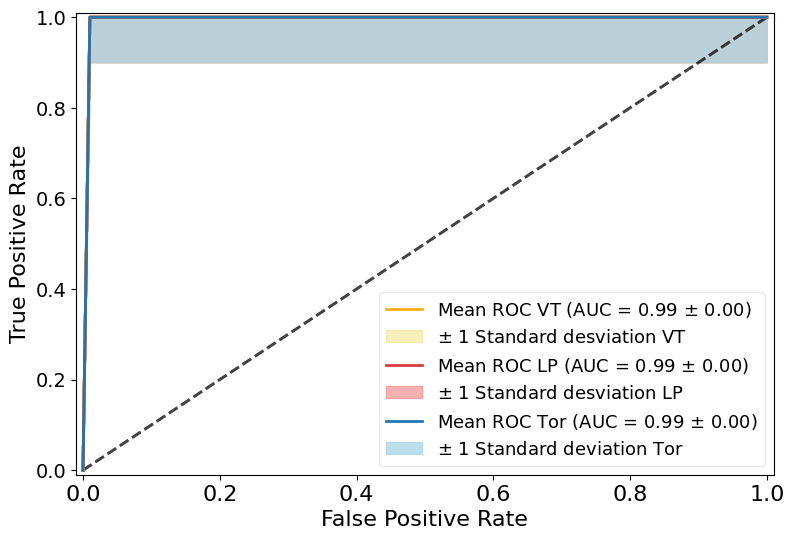

<Figure size 600x600 with 0 Axes>

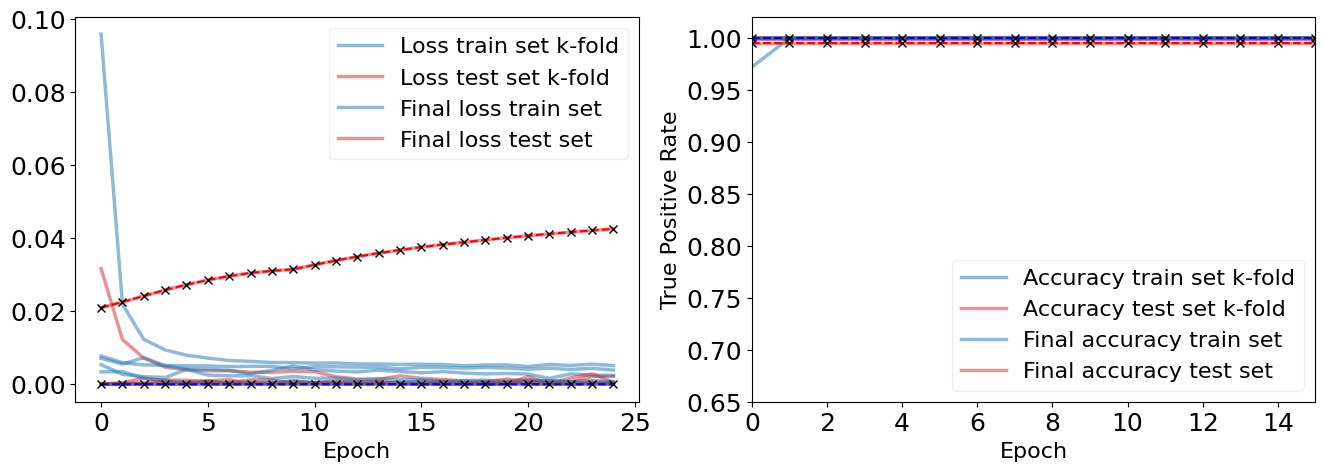

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle

cv = StratifiedShuffleSplit(n_splits=6, random_state=True)
th_0 = []
th_1 = []
th_2 = []

y = np.round(y).astype(int)

print(cv)
StratifiedShuffleSplit(n_splits=6, random_state=True)

fig, ax = plt.subplots(1, figsize = (9, 6))
tprs_mean_0 = []
tprs_mean_1 = []
tprs_mean_2 = []
aucs_0 = []
aucs_1 = []
aucs_2 = []

corte0 = []
corte1 = []
corte2 = []
fold = 1

for train_index, test_index in cv.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # converte rótulos para formato one-hot encoding
  y_train = to_categorical(y_train, num_classes=3)
  y_test = to_categorical(y_test, num_classes=3)

  clasificador = Model(inputs=entrada, outputs=saida)
  clasificador.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', 'AUC'])
  # armazenar o tempo de início do treinamento
  time
  start_time = time.time()
  historia = clasificador.fit(X_train, y_train,
                           epochs=25,
                           batch_size=15,
                           validation_data=(X_test, y_test),
                           shuffle=True)
  # armazenar o tempo de fim do treinamento
  end_time = time.time()

  print("ENTRENAMIENTO EN EL FOLD %0.2f" %(fold))
  y_pred = clasificador.predict(X_test)

  tprs = []
  Corte = []
  thresholds = []

  base_fpr = np.linspace(0, 1, 101)
  mean_fpr = np.linspace(0, 1, 100)


  #Curva ROC para la clase VT

  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 0],  y_pred[:,0])
    auc1 = roc_auc_score(y_test[:, 0], y_pred[:, 0])

    # Elegir el umbral óptimo basado en una métrica (por ejemplo, F1-score)
    f1_scores = 2 * (tpr * (1 - fpr)) / (tpr + (1 - fpr))
    best_threshold = th[np.argmax(f1_scores)]

  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_0.append(auc1)
  th_0.append(best_threshold)  ##################################################################################

  Corte.append(th[np.argmax(tpr - fpr)])
  corte0.append(Corte)  #########################################################################################
  ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="k",
          alpha=0.2)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="orange",
      lw=2,
      alpha=0.9,
  )
  tprs_mean_0.append(mean_tpr)

  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.xlabel('False Positive Rate', fontsize=16)


  #Curva ROC para la clase LP

  tprs = []
  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 1],  y_pred[:, 1])
    auc1 = roc_auc_score(y_test[:, 1], y_pred[:, 1])

    # Elegir el umbral óptimo basado en una métrica (por ejemplo, F1-score)
    f1_scores = 2 * (tpr * (1 - fpr)) / (tpr + (1 - fpr))
    best_threshold = th[np.argmax(f1_scores)]

  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_1.append(auc1)
  th_1.append(best_threshold) ##################################################################################

  Corte.append(th[np.argmax(tpr - fpr)])
  corte1.append(Corte)  ########################################################################################

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="lightcoral",
      lw=2,
      alpha=0.99, # alpha es transparencia
  )
  tprs_mean_1.append(mean_tpr)

  #Curva ROC para la clase Tor

  tprs = []
  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 2],  y_pred[:, 2])
    auc1 = roc_auc_score(y_test[:, 2], y_pred[:, 2])

    # Elegir el umbral óptimo basado en una métrica (por ejemplo, F1-score)
    f1_scores = 2 * (tpr * (1 - fpr)) / (tpr + (1 - fpr))
    best_threshold = th[np.argmax(f1_scores)]

  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_2.append(auc1)
  th_2.append(best_threshold) ##################################################################################

  Corte.append(th[np.argmax(tpr - fpr)])
  corte2.append(Corte)  ########################################################################################

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="lightblue",
      lw=2,
  )

  tprs_mean_2.append(mean_tpr)
  ax.legend(loc="lower right",fontsize = 8)
  plt.xticks(fontsize=16), plt.yticks(fontsize=14)


  import matplotlib.pyplot as plt
  plt.figure(5, figsize=(16,5))
  plt.subplot(1,2,1)
  plt.plot(historia.history["loss"], color = 'tab:blue', alpha = 0.5, lw = 2.5)   #label="Pérdida train (Fold %0.2f)" %(fold)
  plt.plot(historia.history["val_loss"], color = 'tab:red', alpha = 0.5, lw = 2.5)
  plt.subplot(1,2,2)
  plt.plot(historia.history["categorical_accuracy"], color = 'tab:blue', alpha = 0.5, lw = 2.5)
  plt.plot(historia.history["val_categorical_accuracy"], color = 'tab:red', alpha = 0.5, lw = 2.5)

  fold = fold + 1

for train, test in cv.split(X, y):
  print('train -  {}   |   test -  {}'.format(
      np.bincount(y[train]), np.bincount(y[test])))

plt.figure(3, figsize=(6,6))
tpr_0_final = np.mean(tprs_mean_0, axis=0)
std_tpr_0 = np.std(tpr_0_final, axis=0)
tprs_upper_0 = np.minimum(tpr_0_final + std_tpr_0, 1)
tprs_lower_0 = np.maximum(tpr_0_final - std_tpr_0, 0)

tpr_0_final[-1] = 1.0
mean_auc_0 = auc(mean_fpr, tpr_0_final)
std_auc_0 = np.std(aucs_0)
ax.plot(
    mean_fpr,
    tpr_0_final,
    color="orange",
    label=r"Mean ROC VT (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_0, std_auc_0),
    lw=2,
    alpha=0.9,
)
ax.fill_between(
    mean_fpr,
    tprs_lower_0,
    tprs_upper_0,
    color="khaki",
    alpha=0.6,
    label="$\pm$ 1 Standard desviation VT",
)

tpr_1_final = np.mean(tprs_mean_1, axis=0)
std_tpr_1 = np.std(tpr_1_final, axis=0)
tprs_upper_1 = np.minimum(tpr_1_final + std_tpr_1, 1)
tprs_lower_1 = np.maximum(tpr_1_final - std_tpr_1, 0)

tpr_1_final[-1] = 1.0
mean_auc_1 = auc(mean_fpr, tpr_0_final)
std_auc_1 = np.std(aucs_1)
ax.plot(
    mean_fpr,
    tpr_1_final,
    color="tab:red",
    label=r"Mean ROC LP (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_1, std_auc_1),
    lw=2,
    alpha=0.9,
)
ax.fill_between(
    mean_fpr,
    tprs_lower_1,
    tprs_upper_1,
    color="lightcoral",
    alpha=0.6,
    label="$\pm$ 1 Standard desviation LP",
)

tpr_2_final = np.mean(tprs_mean_2, axis=0)
std_tpr_2 = np.std(tpr_2_final, axis=0)
tprs_upper_2 = np.minimum(tpr_2_final + std_tpr_2, 1)
tprs_lower_2 = np.maximum(tpr_2_final - std_tpr_2, 0)

tpr_2_final[-1] = 1.0
mean_auc_2 = auc(mean_fpr, tpr_2_final)
std_auc_2 = np.std(aucs_2)
ax.plot(
    mean_fpr,
    tpr_2_final,
    color="tab:blue",
    label=r"Mean ROC Tor (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_2, std_auc_2),
    lw=2,
    alpha=0.99,
)
ax.fill_between(
    mean_fpr,
    tprs_lower_2,
    tprs_upper_2,
    color="lightblue",
    alpha=0.8,
    label=r"$\pm$ 1 Standard deviation Tor",
)

ax.legend(loc="lower right",fontsize = 13, fancybox=True, framealpha=0.4)

ax.figure.savefig('ROC_PCA3.pdf', dpi=400, format='pdf')


plt.figure(5, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], 'xb--',mec='k', lw=1.5)
plt.plot(historia.history["val_loss"], 'xr--',mec='k', lw=1.5)
plt.xlabel('Epoch', fontsize=16)
plt.xticks(fontsize=18), plt.yticks(fontsize=18)
plt.legend(labels=["Loss train set k-fold",
                   "Loss test set k-fold",
                   "Final loss train set",
                   "Final loss test set"],
           fontsize='16', fancybox=True, framealpha=0.3)
plt.subplot(1,2,2)
plt.plot(historia.history["categorical_accuracy"], 'xb--',mec='k', lw=1.5)
plt.plot(historia.history["val_categorical_accuracy"], 'xr--',mec='k', lw=1.5)
plt.xlim(0, 15)
plt.ylim(0.65, 1.02)
plt.xlabel('Epoch', fontsize=16)
plt.legend(labels=["Accuracy train set k-fold",
                   "Accuracy test set k-fold",
                   "Final accuracy train set",
                   "Final accuracy test set"],
           fontsize='16', fancybox=True, loc='lower right', framealpha=0.3)
plt.xticks(fontsize=18), plt.yticks(fontsize=18)

plt.savefig('CrossVall_PCA.pdf', dpi=400, format='pdf')

Gráfico de umbrales que se generaron durante el cálculo de la curva ROC

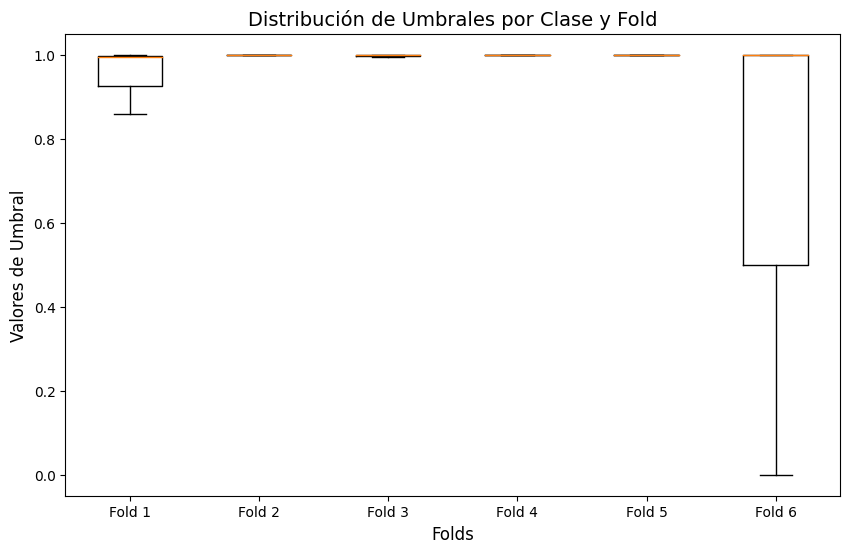

In [ ]:
import seaborn as sns
# Clases y etiquetas para los boxplots
clases = ['Clase VT', 'Clase LP', 'Clase TOR']
etiquetas = [f'Fold {i+1}' for i in range(len(corte0))]
data = np.array(corte0)
# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data.T, labels=etiquetas)
plt.xlabel('Folds', fontsize=12)
plt.ylabel('Valores de Umbral', fontsize=12)
plt.title('Distribución de Umbrales por Clase y Fold', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Gráfica con la tendencia de los umbrales

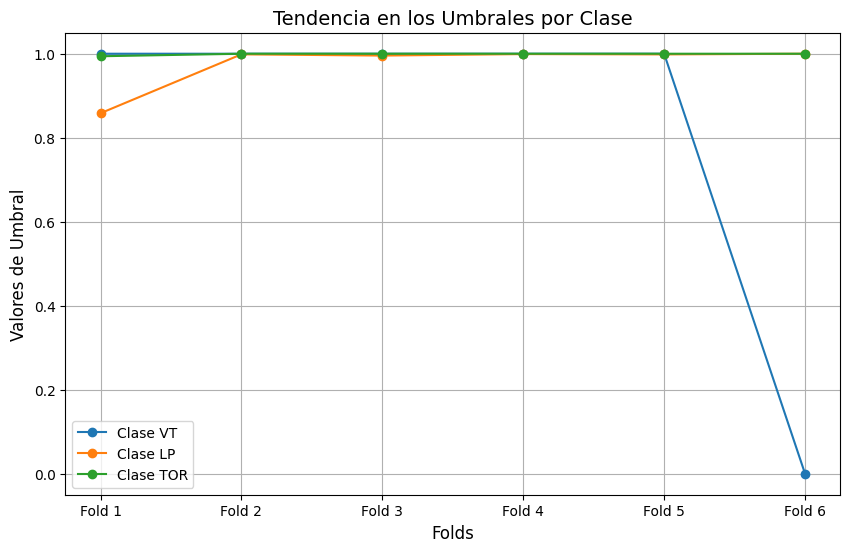

In [ ]:
# Umbrales por clase y fold (como listas de listas)
umbrales_clase_VT = [fila[0] for fila in corte0]
umbrales_clase_LP = [fila[1] for fila in corte0]
umbrales_clase_Tor = [fila[2] for fila in corte0]

# Valores de los folds (etiquetas)
folds = [f'Fold {i+1}' for i in range(len(umbrales_clase_VT))]

# Crear gráfico de líneas para mostrar tendencia
plt.figure(figsize=(10, 6))
plt.plot(folds, umbrales_clase_VT, marker='o', label='Clase VT')
plt.plot(folds, umbrales_clase_LP, marker='o', label='Clase LP')
plt.plot(folds, umbrales_clase_Tor, marker='o', label='Clase TOR')
plt.xlabel('Folds', fontsize=12)
plt.ylabel('Valores de Umbral', fontsize=12)
plt.title('Tendencia en los Umbrales por Clase', fontsize=14)
plt.legend(loc='lower left', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

Gráfico umbrales para *f1-score* por clase, para ver la distribución de los umbrales en los diferentes folds.

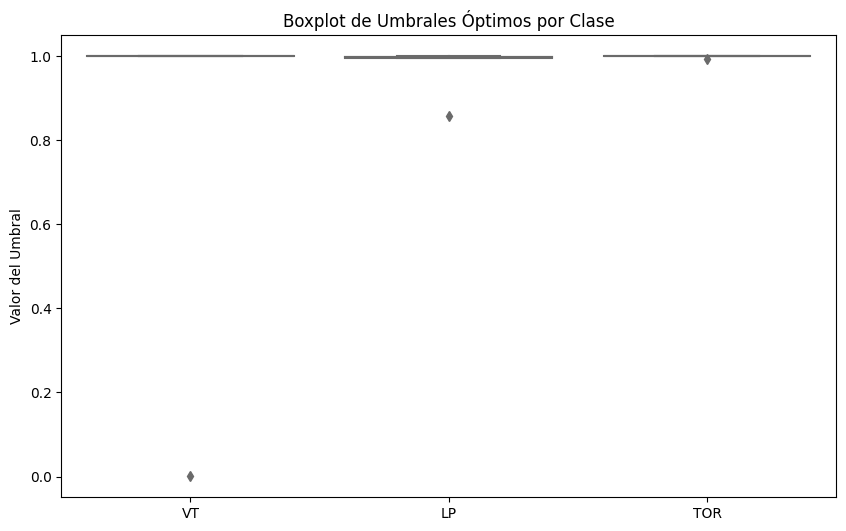

In [ ]:
# Crear un DataFrame de pandas para facilitar la visualización

data = pd.DataFrame({'VT': th_0, 'LP': th_1, 'TOR': th_2})

# Crear el gráfico de boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, palette='Set3')
plt.title('Boxplot de Umbrales Óptimos por Clase')
plt.ylabel('Valor del Umbral')
plt.show()

Resumen gráfico para obtener uma vista global del valor de los umbrales durante los 6 folds.

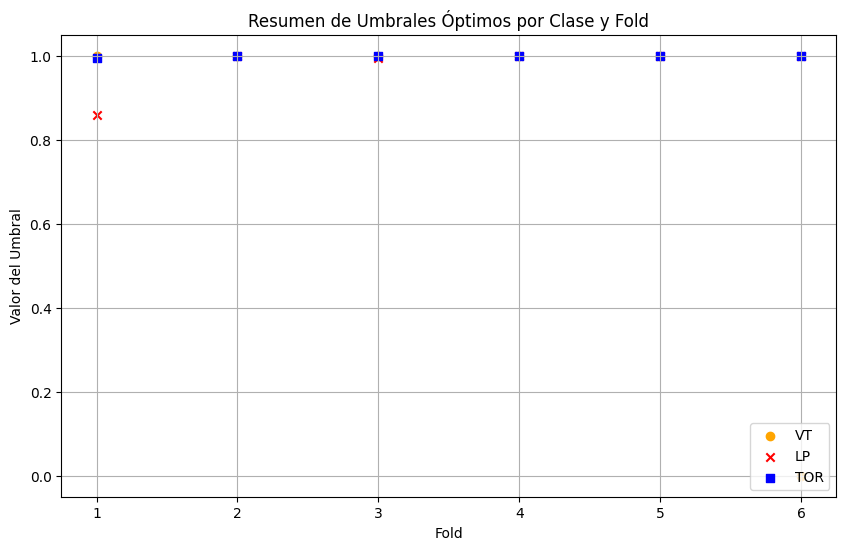

In [ ]:
# Crear una figura para el resumen gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión para cada clase
plt.scatter(range(1, 7), th_0, marker='o', label='VT', color='orange')
plt.scatter(range(1, 7), th_1, marker='x', label='LP', color='red')
plt.scatter(range(1, 7), th_2, marker='s', label='TOR', color='blue')

# Configuración del gráfico
plt.title('Resumen de Umbrales Óptimos por Clase y Fold')
plt.xlabel('Fold')
plt.ylabel('Valor del Umbral')
plt.xticks(range(1, 7))
plt.legend(loc='lower right')
plt.grid(True)

# Mostrar el gráfico
plt.show()

**Matriz de confusión**

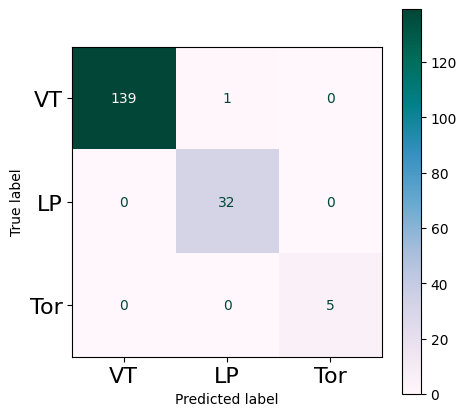

[[[ 37   0]
  [  1 139]]

 [[144   1]
  [  0  32]]

 [[172   0]
  [  0   5]]]
matriz VT  [[ 37   0]
 [  1 139]]
matriz LP  [[144   1]
 [  0  32]]
matriz Tor  [[172   0]
 [  0   5]]


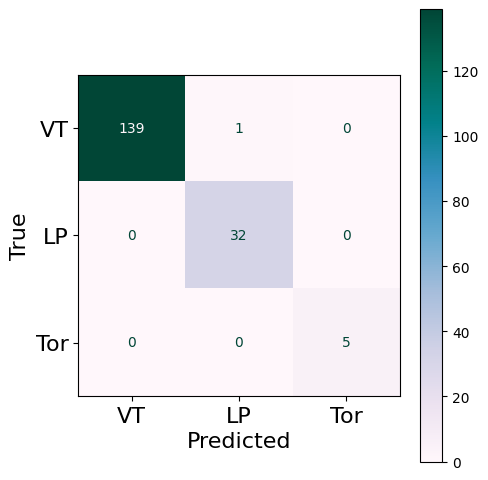

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

y_pred_ = np.rint(y_pred)
y_salida = []
for i in range(len(y_pred)):
  if y_pred_[i,0] > 0:
    y_salida.append('VT')
  if y_pred_[i,1] > 0:
    y_salida.append('LP')
  if y_pred_[i,2] > 0:
    y_salida.append('Tor')


y_true = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_true.append('VT')
  if y_test[i,1] > 0:
    y_true.append('LP')
  if y_test[i,2] > 0:
    y_true.append('Tor')

c = confusion_matrix ( y_true , y_salida , labels = ["VT", "LP", "Tor"] , sample_weight = None)
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["VT", "LP", "Tor"])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlabel('Predicted', fontsize=16)
ax.set_ylabel('True', fontsize=16)
plt.tight_layout()
plt.savefig('confusion_matrix.pdf', dpi=400, format='pdf')


plt.rcParams.update({'font.size': 16})
# plt.rc('font', **font)

cm = multilabel_confusion_matrix(y_true, y_salida, labels=["VT", "LP", "Tor"])
print(cm)
cmVT = cm[0]
cmLP = cm[1]
cmTor = cm[2]
print('matriz VT ', cmVT)
print('matriz LP ', cmLP)
print('matriz Tor ', cmTor)

**Evaluación con Métricas de Desempeño**

In [ ]:
def calcular_sensitividad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FN = CM[1,0]
  sen = 100*(TP/(TP+FN))
  print('Sensitividad ' + clase_sismo + ': {:.1f}%'.format(sen))
  return sen


def calcular_especificidad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TN = CM[0,0]
  FP = CM[0,1]
  esp = 100*(TN/(TN+FP))
  print('Especificidad ' + clase_sismo + ': {:.1f}%'.format(esp))
  return esp


def calcular_precision(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FP = CM[0,1]
  pres = 100*(TP/(TP+FP))
  print('Precisión ' + clase_sismo + ': {:.1f}%'.format(pres))
  return pres


def calcular_f1(sencitividad, precision, clase_sismo):
  f1 = 2*(precision*sencitividad)/(precision+sencitividad)
  print('f1 score ' + clase_sismo + ': {:.1f}%'.format(f1))
  return f1

In [ ]:
# Calculo de Especificidad
esp_1 = calcular_especificidad('VT')
esp_2 = calcular_especificidad('LP')
esp_3 = calcular_especificidad('Tor')
# Cálculo de Sensitividad
sen_1 = calcular_sensitividad('VT')
sen_2 = calcular_sensitividad('LP')
sen_3 = calcular_sensitividad('Tor')
# Cálculo de Precisión
pres_1 = calcular_precision('VT')
pres_2 = calcular_precision('LP')
pres_3 = calcular_precision('Tor')
# Cálculo de f1 score
f1_1 = calcular_f1(sen_1,pres_1,'VT')
f1_2 = calcular_f1(sen_2,pres_2,'LP')
f1_3 = calcular_f1(sen_3,pres_3,'Tor')

Especificidad VT: 100.0%
Especificidad LP: 99.3%
Especificidad Tor: 100.0%
Sensitividad VT: 99.3%
Sensitividad LP: 100.0%
Sensitividad Tor: 100.0%
Precisión VT: 100.0%
Precisión LP: 97.0%
Precisión Tor: 100.0%
f1 score VT: 99.6%
f1 score LP: 98.5%
f1 score Tor: 100.0%


In [ ]:
from sklearn.metrics import classification_report
y_pred_ = np.rint(y_pred)
# y_pred_label, y_test_label
target_names = ['VT', 'LP', 'Tor']
print(classification_report(y_test, y_pred_, target_names=target_names))

              precision    recall  f1-score   support

          VT       1.00      0.99      1.00       140
          LP       0.97      1.00      0.98        32
         Tor       1.00      1.00      1.00         5

   micro avg       0.99      0.99      0.99       177
   macro avg       0.99      1.00      0.99       177
weighted avg       0.99      0.99      0.99       177
 samples avg       0.99      0.99      0.99       177



# **VALIDACIÓN      DEL     MODELO**

Evaluación del modelo con datos de validación

In [ ]:
X_val = rep_val

In [ ]:
class_final = clasificador.predict(X_val)

14/14 [==============================] - 0s 2ms/step


Otorgando pesos a la clase minoritaria

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calcula los pesos de clase basados en la distribución de clases
class_weights = compute_class_weight('balanced', classes=np.unique(y_val), y=y_val)

# Convierte los pesos en un diccionario para su uso en Scikit-learn
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Imprime los pesos de clase
print("Pesos de clase:", class_weight_dict)

Pesos de clase: {0: 0.42432950191570884, 1: 1.823045267489712, 2: 10.547619047619047}


In [ ]:
# Calcula la clase predicha para cada muestra
clase_predicha = np.argmax(class_final, axis=1)
# Reemplaza los 1 por 0 y los 2 por 1
clase_predicha = np.where(clase_predicha == 1, 0, np.where(clase_predicha == 2, 1, clase_predicha))
# clase_predicha ahora contendrá la clase predicha para cada muestra
#print(clase_predicha)

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

num_class = 3
y_final = clase_predicha

# Convertir y_val & y_final a una lista de enteros
y_val = [int(label) for label in y_val]
y_final = [int(label) for label in y_final]

# Cálculo de las Matrices de Confusión para cada clase
matrices = [confusion_matrix([y_true], [y_pred]) for y_true, y_pred in zip(y_val, y_final)]
total_TN = sum(cm.diagonal()[:-1].sum() for cm in matrices)  # Suma de todos los verdaderos negativos
total_FP = sum(cm[-1, :-1].sum() for cm in matrices)        # Suma de todos los falsos positivos
# Cálculo especificidad por cada clase
specif_per_class = []
for cm in matrices:
  TN = cm.diagonal()[:-1].sum()   # Suma de los TN de todas clases, menos la última
  FP = cm[-1, :-1].sum()    # Suma de FP de la última clase
  specif = 0 if (TN + FP) == 0 else TN / (TN + FP)
  specif_per_class.append(specif)

# Cálculo de métricas 'PONDERADAS' a la clase mayoritaria
recall_pond = recall_score(y_val, y_final, average='weighted')
f1_pond = f1_score(y_val, y_final, average='weighted')
esp_pond = sum(specif_per_class[i] * class_weights[i] for i in range(num_class)) / sum(class_weights)
g_mean_pond = (recall_pond * esp_pond) ** 0.5
auc_pond = roc_auc_score(y_val, class_final, average='weighted', multi_class='ovr')

# Cálculo de métricas 'MACRO' donde cada clase tiene igual importancia
recall_macro = recall_score(y_val, y_final, average='macro')
f1_macro = f1_score(y_val, y_final, average='macro')
esp_macro = sum(specif_per_class) / num_class
g_mean_macro = (recall_macro * esp_macro) ** 0.5
auc_macro = roc_auc_score(y_val, class_final, average='macro', multi_class='ovr')

# Cálculo de métricas 'MICRO' para una visión global del rendimiento del modelo
recall_micro = recall_score(y_val, y_final, average='micro')
f1_micro = f1_score(y_val, y_final, average='micro')
esp_micro = total_TN / (total_TN + total_FP)
g_mean_micro = (recall_micro * esp_micro) ** 0.5
auc_micro = roc_auc_score(y_val, class_final, average='micro', multi_class='ovr')

In [ ]:
metrics_dict = {
    'Metrica': ['Recall Ponderado', 'F1 Ponderado', 'Especificidad Ponderada', 'G-Mean Ponderado', 'AUC Ponderado',
                'Recall Macro', 'F1 Macro', 'Especificidad Macro', 'G-Mean Macro', 'AUC Macro',
                'Recall Micro', 'F1 Micro', 'Especificidad Micro', 'G-Mean Micro', 'AUC Micro'],
    'Valor': [recall_pond, f1_pond, esp_pond, g_mean_pond, auc_pond,
              recall_macro, f1_macro, esp_macro, g_mean_macro, auc_macro,
              recall_micro, f1_micro, esp_micro, g_mean_micro, auc_micro]
}
metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df)

                    Metrica     Valor
0          Recall Ponderado  0.796840
1              F1 Ponderado  0.726503
2   Especificidad Ponderada  0.000000
3          G-Mean Ponderado  0.000000
4             AUC Ponderado  0.999876
5              Recall Macro  0.353909
6                  F1 Macro  0.333851
7       Especificidad Macro  0.000000
8              G-Mean Macro  0.000000
9                 AUC Macro  0.999132
10             Recall Micro  0.796840
11                 F1 Micro  0.796840
12      Especificidad Micro  0.000000
13             G-Mean Micro  0.000000
14                AUC Micro  0.998354


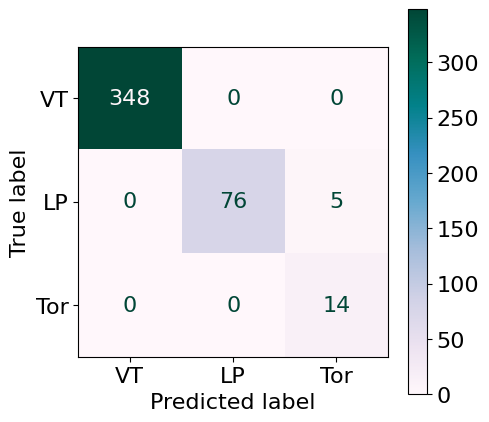

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define tus etiquetas legibles
etiquetas = ["VT", "LP", "Tor"]

# Convierte y_val a etiquetas legibles
y_true = np.array(etiquetas)[y_val]

# Convierte las predicciones en etiquetas legibles
y_salida = np.array(etiquetas)[np.argmax(class_final, axis=1)]

# Calcula la matriz de confusión
c = confusion_matrix(y_true, y_salida, labels=etiquetas)

# Muestra la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=etiquetas)
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax, cmap='PuBuGn', colorbar=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

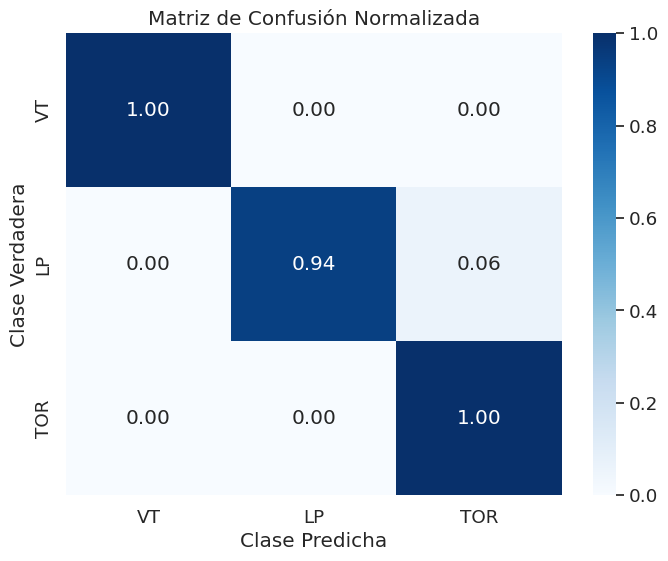

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Supongamos que tienes tu matriz de confusión en 'confusion_matrix'
# Debes reemplazar esto con tus propios valores

# Calcula la matriz de confusión normalizada
row_sums = c.sum(axis=1, keepdims=True)
normalized_c = c / row_sums

# Define las etiquetas de las clases
labels = ["VT", "LP", "TOR"]

# Crea un mapa de calor (heatmap) con seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(normalized_c, annot=True, fmt=".2f",
            cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión Normalizada')
plt.show()

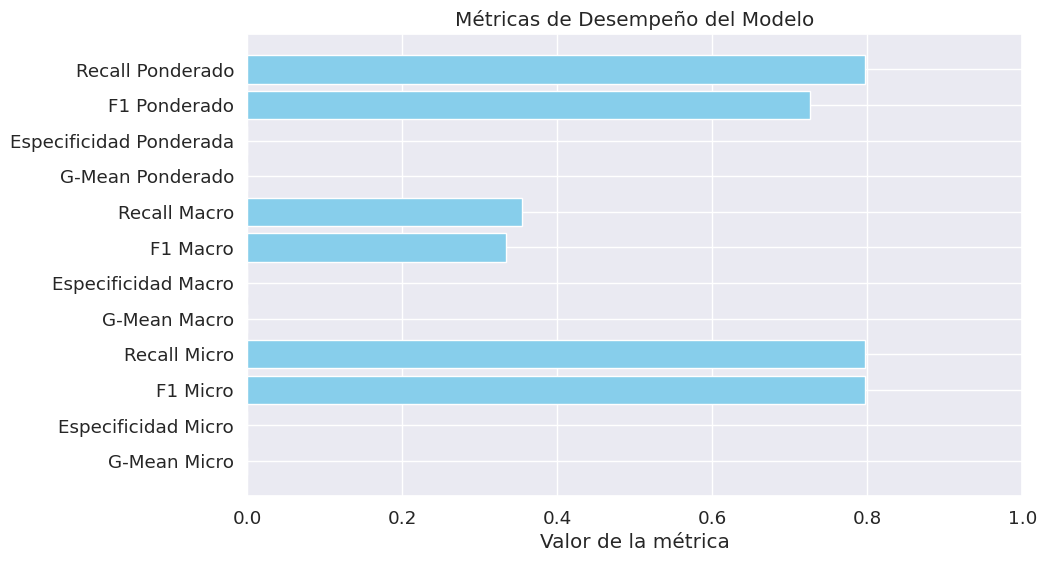

In [ ]:
import matplotlib.pyplot as plt

# Define las métricas y sus valores
metricas = ['Recall Ponderado', 'F1 Ponderado', 'Especificidad Ponderada', 'G-Mean Ponderado',
            'Recall Macro', 'F1 Macro', 'Especificidad Macro', 'G-Mean Macro',
            'Recall Micro', 'F1 Micro', 'Especificidad Micro', 'G-Mean Micro']

valores = [recall_pond, f1_pond, esp_pond, g_mean_pond,
           recall_macro, f1_macro, esp_macro, g_mean_macro,
           recall_micro, f1_micro, esp_micro, g_mean_micro]

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(metricas, valores, color='skyblue')
plt.xlabel('Valor de la métrica')
plt.title('Métricas de Desempeño del Modelo')
plt.xlim(0, 1)  # Ajusta el rango del eje x si es necesario
plt.gca().invert_yaxis()  # Invierte el eje y para que las métricas más altas estén arriba
plt.show()

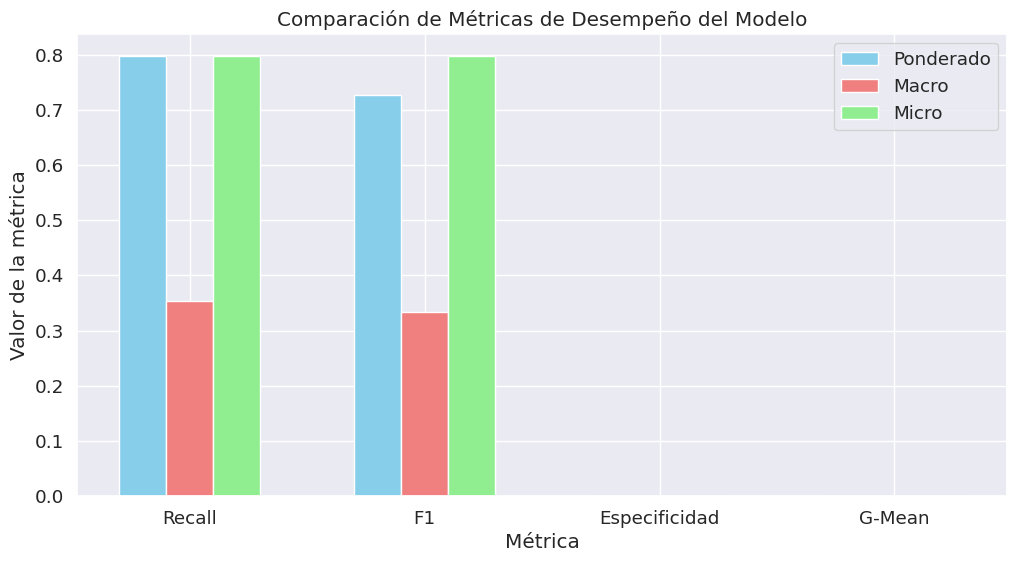

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define las métricas y sus valores
metricas = ['Recall', 'F1', 'Especificidad', 'G-Mean']
etiquetas = ['Ponderado', 'Macro', 'Micro']

# Valores de las métricas para las tres etiquetas
valores = np.array([[recall_pond, f1_pond, esp_pond, g_mean_pond],
                   [recall_macro, f1_macro, esp_macro, g_mean_macro],
                   [recall_micro, f1_micro, esp_micro, g_mean_micro]])

colores = ['skyblue', 'lightcoral', 'lightgreen']

# Crea un gráfico de barras superpuestas
plt.figure(figsize=(12, 6))

# Ancho de cada barra
bar_width = 0.2
index = np.arange(len(metricas))

for i in range(len(etiquetas)):
    plt.bar(index + i * bar_width, valores[i], bar_width, label=etiquetas[i], color=colores[i])

plt.xlabel('Métrica')
plt.ylabel('Valor de la métrica')
plt.title('Comparación de Métricas de Desempeño del Modelo')
plt.xticks(index + bar_width, metricas)
plt.legend()
plt.show()

Cálculo de Métricas ponderadas por clase

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Crea un objeto LabelBinarizer
lb = LabelBinarizer()

# Convierte las etiquetas de clases en una matriz binaria
y_salida_bin = lb.fit_transform(y_salida)

Convertimos el vector con las etiquetas verdaderas para un código one-hot.

In [ ]:
from sklearn.preprocessing import label_binarize

# Codificar las etiquetas verdaderas en un formato binario (one-hot encoding)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])  # Ajusta las clases según tu etiquetado

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Número de clases
num_classes = y_val_bin.shape[1]

# Crea un diccionario para almacenar las métricas por clase
class_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': [],
}

for class_idx in range(num_classes):
    y_true_class = y_val_bin[:, class_idx]
    y_pred_class = y_salida_bin[:, class_idx]

    # Calcula las métricas para la clase actual
    accuracy = accuracy_score(y_true_class, y_pred_class)
    precision = precision_score(y_true_class, y_pred_class)
    recall = recall_score(y_true_class, y_pred_class)
    f1 = f1_score(y_true_class, y_pred_class)
    roc_auc = roc_auc_score(y_true_class, y_pred_class)

    # Almacena las métricas en el diccionario
    class_metrics['Accuracy'].append(accuracy)
    class_metrics['Precision'].append(precision)
    class_metrics['Recall'].append(recall)
    class_metrics['F1-Score'].append(f1)
    class_metrics['ROC AUC'].append(roc_auc)

In [ ]:
df = pd.DataFrame(class_metrics, index=[f'Clase {i}' for i in range(1, num_classes + 1)])  # Personaliza los índices según tus clases

# Muestra el DataFrame como una tabla
print(df)

         Accuracy  Precision    Recall  F1-Score   ROC AUC
Clase 1  0.042889   0.000000  0.000000       0.0  0.100000
Clase 2  0.796840   0.263158  0.061728       0.1  0.511527
Clase 3  0.182844   0.000000  0.000000       0.0  0.094406


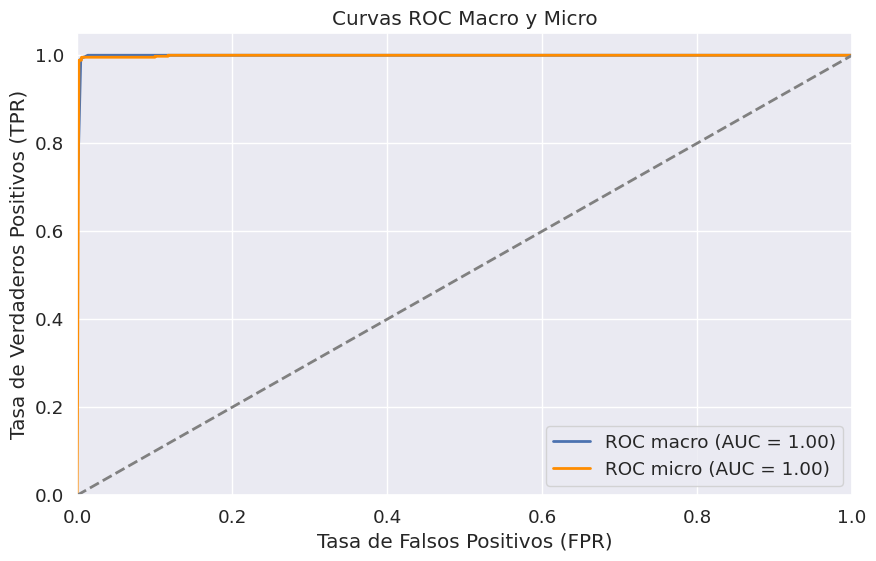

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcula las curvas ROC y los valores AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(etiquetas)):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], class_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcula la curva ROC macro promediando los valores de todas las clases
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(etiquetas))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(etiquetas)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(etiquetas)
roc_auc_macro = auc(all_fpr, mean_tpr)

# Calcula la curva ROC micro agregando todas las predicciones y etiquetas verdaderas
all_y_true = y_val_bin.ravel()
all_y_scores = class_final.ravel()
fpr_micro, tpr_micro, _ = roc_curve(all_y_true, all_y_scores)
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Crea la gráfica de las curvas ROC
plt.figure(figsize=(10, 6))

# Curva ROC macro
plt.plot(all_fpr, mean_tpr, color='b', linestyle='-', lw=2, label='ROC macro (AUC = {:.2f})'.format(roc_auc_macro))

# Curva ROC micro
plt.plot(fpr_micro, tpr_micro, color='darkorange', linestyle='-', lw=2, label='ROC micro (AUC = {:.2f})'.format(roc_auc_micro))

# Línea de referencia (clasificación aleatoria)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Configuración de la gráfica
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC Macro y Micro')
plt.legend(loc='lower right')
plt.grid(True)

# Muestra la gráfica
plt.show()

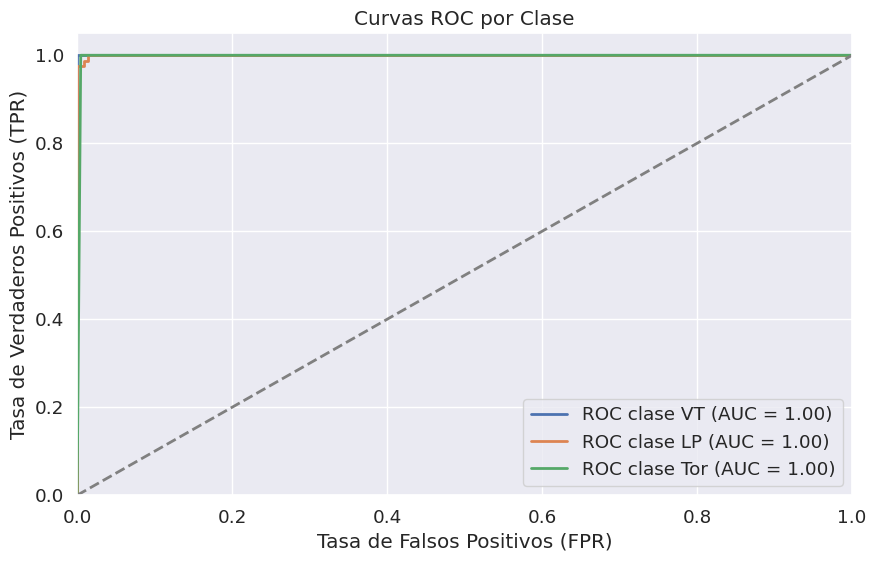

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Define las etiquetas de las clases
etiquetas = ["VT", "LP", "Tor"]

# Calcula las curvas ROC y los valores AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(etiquetas)):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], class_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Crea la gráfica de las curvas ROC en un solo gráfico
plt.figure(figsize=(10, 6))

# Trazar las curvas ROC para cada clase
for i in range(len(etiquetas)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC clase {} (AUC = {:.2f})'.format(etiquetas[i], roc_auc[i]))

# Línea de referencia (clasificación aleatoria)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Configuración de la gráfica
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC por Clase')
plt.legend(loc='lower right')
plt.grid(True)

# Muestra la gráfica
plt.show()

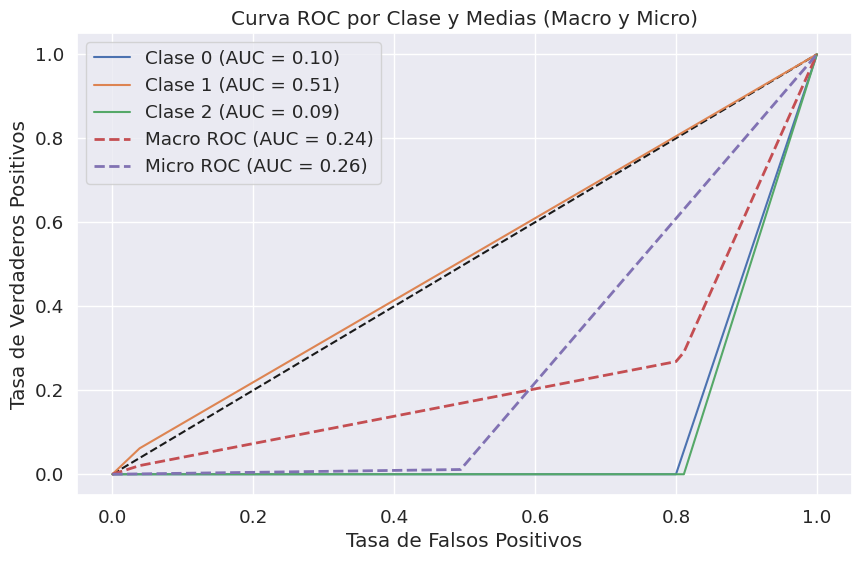

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import numpy as np
import matplotlib.pyplot as plt

# Calcula las curvas ROC y los valores AUC por clase
fpr_class = {}
tpr_class = {}
roc_auc_class = {}
n_classes = num_classes  # Número de clases

for class_idx in range(n_classes):
    fpr_class[class_idx], tpr_class[class_idx], _ = roc_curve(y_val_bin[:, class_idx], y_salida_bin[:, class_idx])
    roc_auc_class[class_idx] = auc(fpr_class[class_idx], tpr_class[class_idx])

# Calcula la curva ROC macro
all_fpr = np.unique(np.concatenate([fpr_class[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr_class[i], tpr_class[i])
mean_tpr /= n_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Calcula la curva ROC micro
fpr_micro, tpr_micro, _ = roc_curve(y_val_bin.ravel(), y_salida_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Gráfico de las curvas ROC por clase
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(n_classes):
    plt.plot(fpr_class[i], tpr_class[i], label=f'Clase {i} (AUC = {roc_auc_class[i]:.2f})')

# Curva ROC macro
plt.plot(fpr_macro, tpr_macro, label=f'Macro ROC (AUC = {roc_auc_macro:.2f})', linestyle='--', linewidth=2)

# Curva ROC micro
plt.plot(fpr_micro, tpr_micro, label=f'Micro ROC (AUC = {roc_auc_micro:.2f})', linestyle='--', linewidth=2)

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase y Medias (Macro y Micro)')
plt.legend(loc='best')
plt.show()

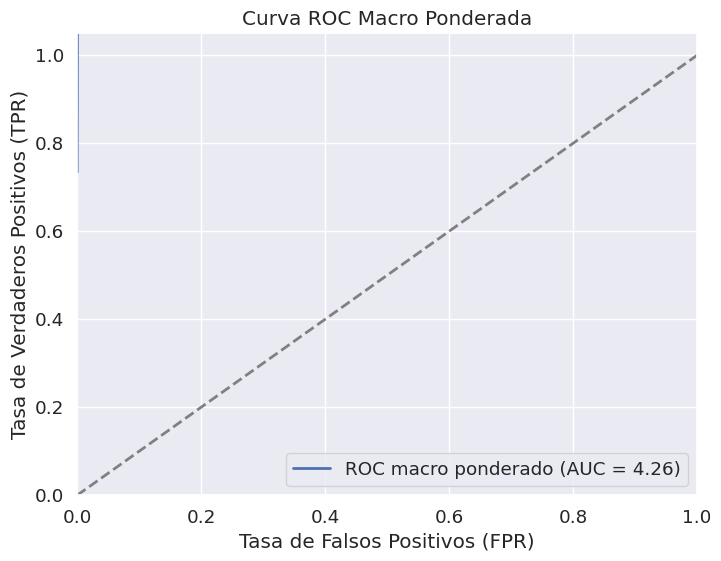

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define las etiquetas de las clases
etiquetas = ["VT", "LP", "Tor"]

# Calcula las curvas ROC y los valores AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(etiquetas)):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], class_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcula la curva ROC macro ponderada promediando los valores de todas las clases
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(etiquetas))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(etiquetas)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]) * class_weight_dict[i]   # Aplicar pesos
mean_tpr /= len(etiquetas)
roc_auc_macro_ponderado = auc(all_fpr, mean_tpr)

# Crea la gráfica de la curva ROC macro ponderada
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='b', linestyle='-', lw=2,
         label='ROC macro ponderado (AUC = {:.2f})'.format(roc_auc_macro_ponderado))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Macro Ponderada')
plt.legend(loc='lower right')
plt.grid(True)

# Muestra la gráfica
plt.show()

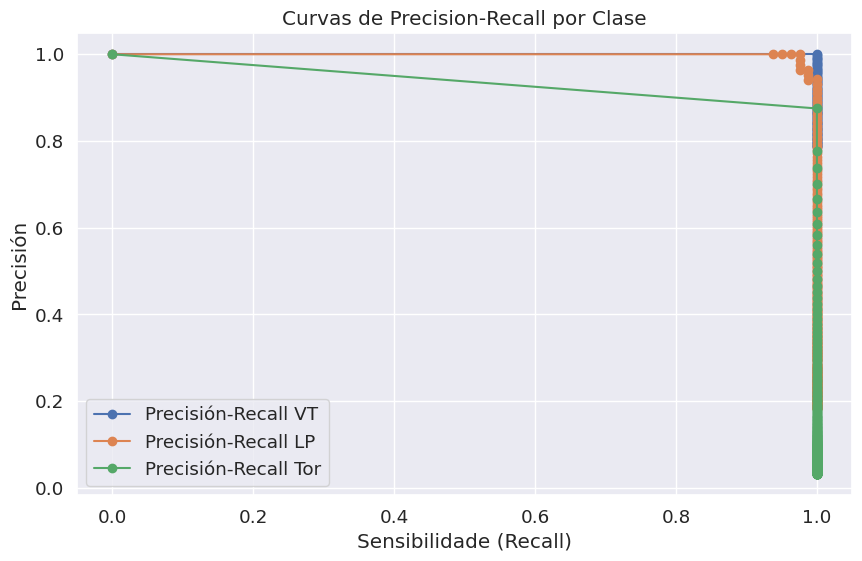

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Supongamos que tienes tus etiquetas verdaderas y las probabilidades de las predicciones
y_true = np.array(y_val)  # Convierte tus etiquetas verdaderas a un arreglo numpy
y_scores = class_final  # Reemplaza esto con las probabilidades de las predicciones

# Define las etiquetas de las clases
etiquetas = ["VT", "LP", "Tor"]
# Mapeo de etiquetas a valores numéricos
mapeo_etiquetas = {"VT": 0, "LP": 1, "Tor": 2}

# Inicializa un diccionario para almacenar las curvas de precisión-recuperación
precision_dict = {}
recall_dict = {}
thresholds_dict = {}

# Calcula y almacena las curvas de precisión-recuperación para cada clase
for etiqueta in etiquetas:
    y_true_class = (y_true == mapeo_etiquetas[etiqueta]).astype(int)
    y_scores_class = y_scores[:, mapeo_etiquetas[etiqueta]]
    precision, recall, thresholds = precision_recall_curve(y_true_class, y_scores_class)
    precision_dict[etiqueta] = precision
    recall_dict[etiqueta] = recall
    thresholds_dict[etiqueta] = thresholds

# Grafica las curvas de precisión-recuperación para cada clase en una sola figura
plt.figure(figsize=(10, 6))
for etiqueta in etiquetas:
    plt.plot(recall_dict[etiqueta], precision_dict[etiqueta], marker='o', linestyle='-', label=f'Precisión-Recall {etiqueta}')

plt.xlabel('Sensibilidade (Recall)')
plt.ylabel('Precisión')
plt.title('Curvas de Precision-Recall por Clase')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Histrograma de probabilidades en el umbral de decisión

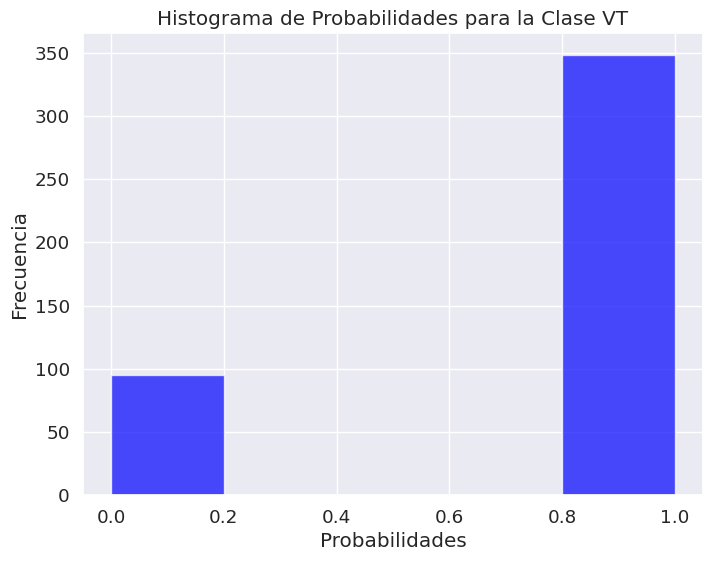

In [ ]:
import matplotlib.pyplot as plt

# Clase de interés (cambia a la que necesites)
clase_interes = "VT"

# Obtén las probabilidades de la clase de interés
probabilidades_clase_interes = class_final[:, etiquetas.index(clase_interes)]

# Crea un histograma
plt.figure(figsize=(8, 6))
plt.hist(probabilidades_clase_interes, bins=5, color='blue', alpha=0.7)
plt.title(f'Histograma de Probabilidades para la Clase {clase_interes}')
plt.xlabel('Probabilidades')
plt.ylabel('Frecuencia')
plt.grid(True)

# Muestra el histograma
plt.show()

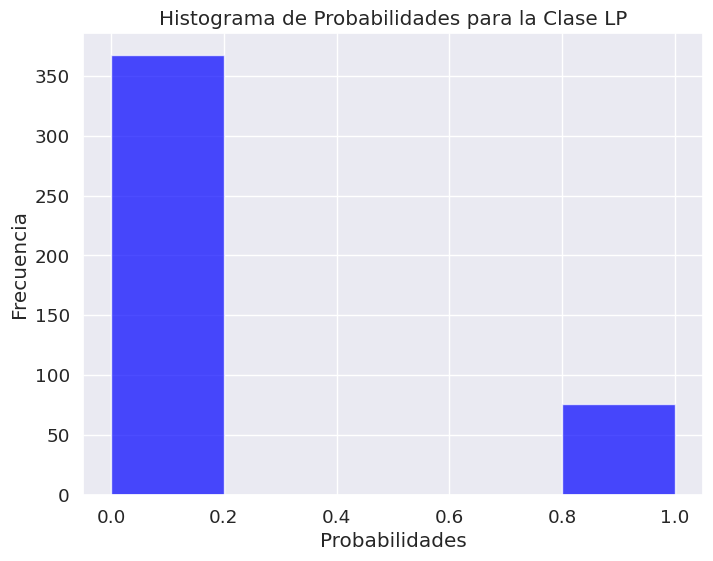

In [ ]:
import matplotlib.pyplot as plt

# Clase de interés (cambia a la que necesites)
clase_interes = "LP"

# Obtén las probabilidades de la clase de interés
probabilidades_clase_interes = class_final[:, etiquetas.index(clase_interes)]

# Crea un histograma
plt.figure(figsize=(8, 6))
plt.hist(probabilidades_clase_interes, bins=5, color='blue', alpha=0.7)
plt.title(f'Histograma de Probabilidades para la Clase {clase_interes}')
plt.xlabel('Probabilidades')
plt.ylabel('Frecuencia')
plt.grid(True)

# Muestra el histograma
plt.show()

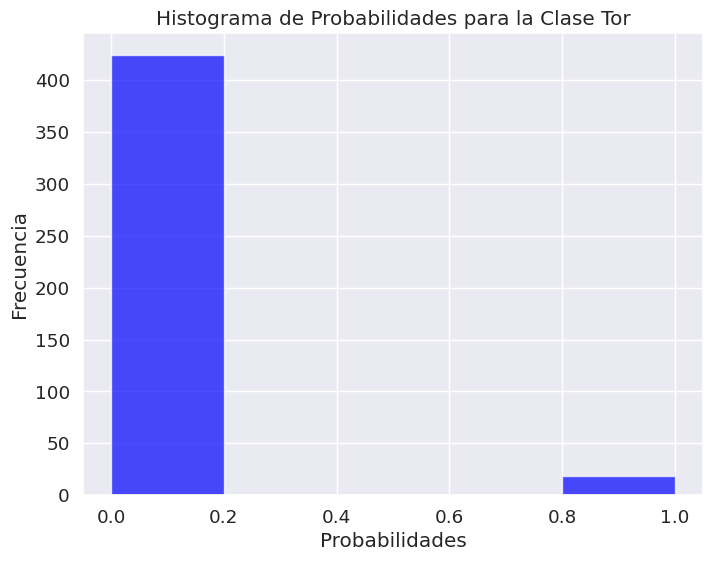

In [ ]:
import matplotlib.pyplot as plt

# Clase de interés (cambia a la que necesites)
clase_interes = "Tor"

# Obtén las probabilidades de la clase de interés
probabilidades_clase_interes = class_final[:, etiquetas.index(clase_interes)]

# Crea un histograma
plt.figure(figsize=(8, 6))
plt.hist(probabilidades_clase_interes, bins=5, color='blue', alpha=0.7)
plt.title(f'Histograma de Probabilidades para la Clase {clase_interes}')
plt.xlabel('Probabilidades')
plt.ylabel('Frecuencia')
plt.grid(True)

# Muestra el histograma
plt.show()